In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [4]:
train_data.isnull().sum()

Unnamed: 0       0
userID           0
title            1
year            55
kind            30
genre           85
vote           773
country        586
language       696
cast           307
director      1633
composer      3149
writer        1469
runtime        928
rating         773
dtype: int64

In [5]:
test_data.isnull().sum()

Unnamed: 0      0
userID          0
title           0
year           15
kind            8
genre           8
vote          104
country        79
language       97
cast           37
director      227
composer      473
writer        187
runtime       128
dtype: int64

In [6]:
train_data.head()

,Unnamed: 0,userID,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating
0,0,0,Dinosaur Planet,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,7.7
1,1,1,Character,2021.0,movie,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0,8.3
2,2,2,Get Up and Dance!,1994.0,video movie,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0,8.1
3,3,3,The Rise and Fall of El Chapo,2016.0,tv movie,['Documentary'],42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0,6.9
4,4,4,Sick - IMDb,NaN,NaN,['Thriller'],NaN,['United States'],NaN,"['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...",['John Hyams'],NaN,"['Katelyn Crabb', 'Kevin Williamson']",NaN,NaN


In [7]:
train_data.shape

(8001, 15)

In [8]:
test_data.shape

(1825, 14)

In [9]:
test_data.head()

,Unnamed: 0,userID,title,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime
0,8001,8001,Steely Dan's Two Against Nature,2000.0,video movie,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],NaN,NaN,NaN
1,8002,8002,Shamus,1973.0,movie,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],['Jerry Goldsmith'],['Barry Beckerman'],106.0
2,8003,8003,Demetrius and the Gladiators,1954.0,movie,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],['Franz Waxman'],"['Philip Dunne', 'Lloyd C. Douglas']",101.0
3,8004,8004,Future War,1997.0,video movie,"['Action', 'Fantasy', 'Sci-Fi', 'Thriller']",4239.0,['United States'],['English'],"['Daniel Bernhardt', ""Robert Z'Dar"", 'Travis B...",['Anthony Doublin'],['Arlan H. Boll'],"['David Huey', 'Dom Magwili', 'Dom Magwili']",90.0
4,8005,8005,Fair Game,2010.0,movie,"['Biography', 'Drama', 'Thriller']",48005.0,"['United States', 'United Arab Emirates']","['English', 'Arabic', 'French']","['Naomi Watts', 'Sonya Davison', 'Vanessa Chon...",['Doug Liman'],['John Powell'],"['Jez Butterworth', 'John-Henry Butterworth', ...",108.0


In [10]:
train_data.columns

Index(['Unnamed: 0', 'userID', 'title', 'year', 'kind', 'genre', 'vote',
       'country', 'language', 'cast', 'director', 'composer', 'writer',
       'runtime', 'rating'],
      dtype='object')

 as user ids are unique they have no contribution in prediction and column unnamed: 0 is duplicate of column userID dropping both of them

In [11]:
len( train_data.dropna())

4369

<AxesSubplot:xlabel='rating', ylabel='Density'>

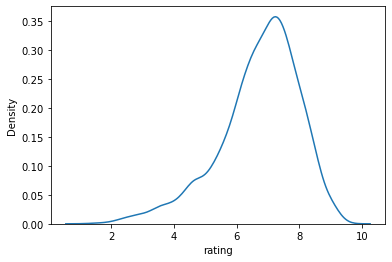

In [12]:
sns.kdeplot(train_data['rating'])

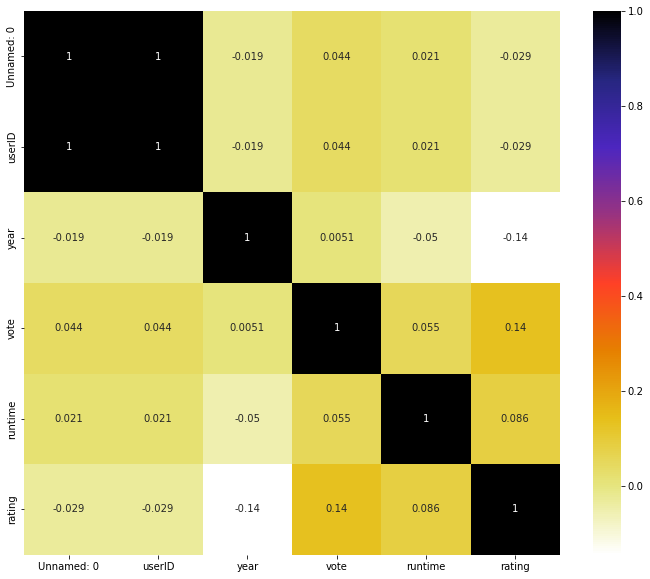

In [13]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_data.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [14]:
tr = test_data.loc[test_data['vote'].notnull()]

## random imputation function

In [15]:
def impute_nan_same(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=train_data[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    df[variable]=df[variable+'_random']
    df.drop(variable+'_random',axis = 1,inplace = True)

In [16]:
train_data.iloc[6087]

Unnamed: 0    6087
userID        6087
title          NaN
year           NaN
kind           NaN
genre          NaN
vote           NaN
country        NaN
language       NaN
cast           NaN
director       NaN
composer       NaN
writer         NaN
runtime        NaN
rating         NaN
Name: 6087, dtype: object

In [17]:
train_data = train_data.drop(6087)

In [18]:
train_data=train_data.loc[train_data['rating'].notnull()]

# title 

In [19]:
l2=(test_data['title'].unique()).tolist()
l1=(train_data['title'].unique()).tolist()
c=0
uni =[]
for i in l2:
    if  i in l1:
        uni.append(i)
        c= c+1
        
print(c)       


98


In [20]:
a=train_data.groupby(['title']).mean()
a=a['rating'].sort_values().to_dict()

In [21]:
fi = {}
for i in uni:
    fi[i]=a[i]

In [22]:
train_data['title_en']=train_data['title'].map(fi)
train_data['title_en'].fillna(0,inplace = True)
test_data['title_en']=test_data['title'].map(fi)
test_data['title_en'].fillna(0,inplace = True)

In [23]:
d=train_data['title'].value_counts().sort_values(ascending=False).to_dict()
li= d.keys()
c=7538
di={}
for i in  li:
    di[i]=c*d[i]
    c=c-1
test_data['title_ten']=test_data['title'].map(di)
train_data['title_ten']=train_data['title'].map(di)  
test_data['title_ten']=test_data['title_ten'].fillna(1)

In [24]:
train_data = train_data.drop('title',axis = 1)
test_data = test_data.drop('title',axis = 1)

In [25]:
train_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating,title_en,title_ten
0,0,0,2003.0,tv mini series,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,7.7,0.0,2991
1,1,1,2021.0,movie,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0,8.3,0.0,4048
2,2,2,1994.0,video movie,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0,8.1,0.0,7311
3,3,3,2016.0,tv movie,['Documentary'],42.0,['United States'],NaN,NaN,NaN,NaN,NaN,85.0,6.9,0.0,7318
5,5,5,1992.0,movie,"['Action', 'Sci-Fi']",93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],['Carole King'],"['Kazumasa Hirai', 'Jirô Kuwata', 'Junko Suzuki']",83.0,5.5,0.0,7310


In [26]:
test_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,title_en,title_ten
0,8001,8001,2000.0,video movie,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],NaN,NaN,NaN,0.0,1.0
1,8002,8002,1973.0,movie,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],['Jerry Goldsmith'],['Barry Beckerman'],106.0,0.0,1.0
2,8003,8003,1954.0,movie,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],['Franz Waxman'],"['Philip Dunne', 'Lloyd C. Douglas']",101.0,0.0,1.0
3,8004,8004,1997.0,video movie,"['Action', 'Fantasy', 'Sci-Fi', 'Thriller']",4239.0,['United States'],['English'],"['Daniel Bernhardt', ""Robert Z'Dar"", 'Travis B...",['Anthony Doublin'],['Arlan H. Boll'],"['David Huey', 'Dom Magwili', 'Dom Magwili']",90.0,0.0,1.0
4,8005,8005,2010.0,movie,"['Biography', 'Drama', 'Thriller']",48005.0,"['United States', 'United Arab Emirates']","['English', 'Arabic', 'French']","['Naomi Watts', 'Sonya Davison', 'Vanessa Chon...",['Doug Liman'],['John Powell'],"['Jez Butterworth', 'John-Henry Butterworth', ...",108.0,0.0,1.0


# year

In [27]:
# random sample imputation function

def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=train_data[variable].dropna().sample(df[variable].isnull().sum(),random_state=0,replace=True)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [28]:
impute_nan_same(train_data,'year')

In [29]:
impute_nan_same(test_data,'year')

# kind

In [30]:
impute_nan_same(train_data,'kind')
impute_nan_same(test_data,'kind')

In [31]:
a=train_data.groupby(['kind']).mean() 
d=train_data.groupby(['kind']).median() 

In [32]:
a=a['rating'].sort_values().to_dict()
d=d['rating'].sort_values().to_dict()


In [33]:
train_data['kind']= train_data['kind'].map(a)
test_data['kind']= test_data['kind'].map(a)

In [34]:
train_data.head(3)

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,rating,title_en,title_ten
0,0,0,2003.0,7.412876,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,NaN,"['Mike Carrol', 'Mike Carroll', 'Georgann Kane']",50.0,7.7,0.0,2991
1,1,1,2021.0,6.577031,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],['Youki Kojima'],"['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...",125.0,8.3,0.0,4048
2,2,2,1994.0,6.573437,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],NaN,NaN,54.0,8.1,0.0,7311


In [35]:
test_data.head(3)

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,composer,writer,runtime,title_en,title_ten
0,8001,8001,2000.0,6.573437,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],NaN,NaN,NaN,0.0,1.0
1,8002,8002,1973.0,6.577031,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],['Jerry Goldsmith'],['Barry Beckerman'],106.0,0.0,1.0
2,8003,8003,1954.0,6.577031,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],['Franz Waxman'],"['Philip Dunne', 'Lloyd C. Douglas']",101.0,0.0,1.0


# genre

In [36]:
y =train_data.loc[train_data['genre'].notnull()]
er = train_data.loc[train_data['genre'].isnull(),'userID']
list = []
l=[]
for i in range(len(y)):
    for j in eval(y.iloc[i,4]):
        l.append(j)
        if j not in list:
            list.append(j)
# print((eval(y['genre'][0])))

In [37]:
x = pd.Series(l)
count = x.value_counts().sort_values(ascending = False).to_dict()
count

{'Drama': 3150,
 'Comedy': 1976,
 'Action': 1297,
 'Romance': 1243,
 'Documentary': 1212,
 'Thriller': 1189,
 'Adventure': 905,
 'Crime': 855,
 'Sci-Fi': 815,
 'Animation': 754,
 'Music': 739,
 'Fantasy': 714,
 'Horror': 703,
 'Family': 678,
 'Mystery': 607,
 'Biography': 401,
 'History': 398,
 'War': 300,
 'Musical': 274,
 'Short': 239,
 'Sport': 220,
 'Western': 126,
 'Reality-TV': 45,
 'Talk-Show': 35,
 'Film-Noir': 15,
 'Game-Show': 12,
 'News': 6}

In [38]:
er = train_data.loc[train_data['genre'].isnull(),'userID']
variable = 'genre'
var_index = 4

target = 'rating'
new_data = train_data[[variable,target]]
# new_data = y[[variable,target]]
lo=[]
y= train_data
for k in list:
    n=[]
    for i in range(len(y)):
        if y.iloc[i,0]  in er :
            n.append(0)
        elif (k in eval(y.iloc[i,var_index])):
            n.append(1)
        else : 
            n.append(0)    
    lo.append(np.array(n)) 
g=0
for k in list:
    new_data[k]=lo[g]
    g=g+1  


In [39]:
new_data

,genre,rating,Documentary,Animation,Family,Crime,Horror,Thriller,Action,Sci-Fi,...,Romance,Short,History,War,Western,Talk-Show,News,Game-Show,Reality-TV,Film-Noir
0,"['Documentary', 'Animation', 'Family']",7.7,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"['Crime', 'Horror', 'Thriller']",8.3,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,['Family'],8.1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,['Documentary'],6.9,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"['Action', 'Sci-Fi']",5.5,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,"['Crime', 'Horror']",1.9,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7996,['Biography'],7.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7997,"['Drama', 'Romance']",8.2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7998,['Family'],7.3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Using Mutual Information for selection of important categories

In [40]:
 new = new_data.dropna()
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(new.drop(['rating','genre'],axis=1),new['rating'])
mutual_info = pd.Series(mutual_info)
mutual_info.index = new.drop(['rating','genre'],axis=1).columns
mutual_info.sort_values(ascending=False).to_dict()


{'Horror': 0.06425864814317217,
 'Documentary': 0.04687894125325176,
 'Music': 0.04113461451268208,
 'Drama': 0.02672465155182202,
 'Thriller': 0.023064158779579902,
 'Family': 0.020631312096780707,
 'Biography': 0.020515086998991183,
 'Western': 0.01827703530571867,
 'History': 0.01581003569225059,
 'Romance': 0.01559768895838376,
 'Action': 0.012980096619795045,
 'Comedy': 0.012496079674561233,
 'Adventure': 0.010608895146924091,
 'Film-Noir': 0.008520615391337305,
 'Game-Show': 0.0077617076221487835,
 'Sci-Fi': 0.0051836093359827196,
 'Mystery': 0.0049965559507541,
 'Fantasy': 0.0040357824377963425,
 'Reality-TV': 0.003928693439160469,
 'Musical': 0.0006872793239329766,
 'Animation': 0.00018935812240616912,
 'Short': 0.0,
 'War': 0.0,
 'Crime': 0.0,
 'Talk-Show': 0.0,
 'News': 0.0,
 'Sport': 0.0}

In [41]:
list = ['Horror',
 'Music',
 'Documentary',
 'Thriller',
 'Drama',
 'History',
 'Romance',
 'Action',
 'Animation']

In [42]:
for variable in list:
    train_data[variable]=new_data[variable]

In [43]:
train_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,title_ten,Horror,Music,Documentary,Thriller,Drama,History,Romance,Action,Animation
0,0,0,2003.0,7.412876,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,...,2991,0,0,1,0,0,0,0,0,1
1,1,1,2021.0,6.577031,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],...,4048,1,0,0,1,0,0,0,0,0
2,2,2,1994.0,6.573437,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],...,7311,0,0,0,0,0,0,0,0,0
3,3,3,2016.0,6.408006,['Documentary'],42.0,['United States'],NaN,NaN,NaN,...,7318,0,0,1,0,0,0,0,0,0
5,5,5,1992.0,6.577031,"['Action', 'Sci-Fi']",93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],...,7310,0,0,0,0,0,0,0,1,0


In [44]:
def list_enco_test(variable,var_index,list):
    er = test_data.loc[test_data[variable].isnull()].index
    lo=[]
    y= test_data
    for k in list:
        n=[]
        for i in range(len(y)):
            if i  in er :
                n.append(0)
            elif (k in eval(y.iloc[i,var_index])):
                n.append(1)
            else : 
                n.append(0)    
        lo.append(np.array(n))
    new_data = test_data[[variable]]    
    g=0
    for k in list:
        new_data[k]=lo[g]
        g=g+1  
    return new_data  

In [45]:
genre_test = list_enco_test('genre',4,list)

In [46]:
for variable in list:
    test_data[variable]=genre_test[variable]

In [47]:
train_data.head(3)

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,title_ten,Horror,Music,Documentary,Thriller,Drama,History,Romance,Action,Animation
0,0,0,2003.0,7.412876,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,...,2991,0,0,1,0,0,0,0,0,1
1,1,1,2021.0,6.577031,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],...,4048,1,0,0,1,0,0,0,0,0
2,2,2,1994.0,6.573437,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],...,7311,0,0,0,0,0,0,0,0,0


In [48]:
test_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,title_ten,Horror,Music,Documentary,Thriller,Drama,History,Romance,Action,Animation
0,8001,8001,2000.0,6.573437,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],...,1.0,0,1,1,0,0,0,0,0,0
1,8002,8002,1973.0,6.577031,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],...,1.0,0,0,0,0,1,0,0,1,0
2,8003,8003,1954.0,6.577031,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],...,1.0,0,0,0,0,1,1,0,1,0
3,8004,8004,1997.0,6.573437,"['Action', 'Fantasy', 'Sci-Fi', 'Thriller']",4239.0,['United States'],['English'],"['Daniel Bernhardt', ""Robert Z'Dar"", 'Travis B...",['Anthony Doublin'],...,1.0,0,0,0,1,0,0,0,1,0
4,8005,8005,2010.0,6.577031,"['Biography', 'Drama', 'Thriller']",48005.0,"['United States', 'United Arab Emirates']","['English', 'Arabic', 'French']","['Naomi Watts', 'Sonya Davison', 'Vanessa Chon...",['Doug Liman'],...,1.0,0,0,0,1,1,0,0,0,0


## similarily list was prepared for remaining columns as their categories count is very large ,their list of important categories was saved to reduce time of processing 

# country

In [49]:
list = ['United States','United Kingdom']
variable = 'country'
var_index = 6
# y =train_data.loc[train_data[variable].notnull()]
er = train_data.loc[train_data[variable].isnull(),'userID']

In [50]:
target = 'rating'
new_data = train_data[[variable,target]]
lo=[]
y= train_data
for k in list:
    n=[]
    for i in range(len(y)):
        if y.iloc[i,0]  in er :
            n.append(0)
        elif (k in eval(y.iloc[i,var_index])):
            n.append(1)
        else : 
            n.append(0)    
    lo.append(np.array(n)) 
g=0
for k in list:
    new_data[k]=lo[g]
    g=g+1  


In [51]:
genre_test = list_enco_test('country',6,list)
for variable in list:
    test_data[variable]=genre_test[variable]
    train_data[variable]=new_data[variable]


In [52]:
test_data.head(3)

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,Music,Documentary,Thriller,Drama,History,Romance,Action,Animation,United States,United Kingdom
0,8001,8001,2000.0,6.573437,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],...,1,1,0,0,0,0,0,0,1,0
1,8002,8002,1973.0,6.577031,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],...,0,0,0,1,0,0,1,0,1,0
2,8003,8003,1954.0,6.577031,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],...,0,0,0,1,1,0,1,0,1,0


In [53]:
train_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,Music,Documentary,Thriller,Drama,History,Romance,Action,Animation,United States,United Kingdom
0,0,0,2003.0,7.412876,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,...,0,1,0,0,0,0,0,1,1,0
1,1,1,2021.0,6.577031,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],...,0,0,1,0,0,0,0,0,0,0
2,2,2,1994.0,6.573437,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],...,0,0,0,0,0,0,0,0,1,0
3,3,3,2016.0,6.408006,['Documentary'],42.0,['United States'],NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
5,5,5,1992.0,6.577031,"['Action', 'Sci-Fi']",93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],...,0,0,0,0,0,0,1,0,0,0


# language

In [54]:
variable = 'language'
var_index = 7
er = train_data.loc[train_data[variable].isnull(),'userID']

In [55]:
list = ['English','Mandarin','Italian','Cantonese']

In [56]:
target = 'rating'
new_data = train_data[[variable,target]]
lo=[]
y= train_data
for k in list:
    n=[]
    for i in range(len(y)):
        if y.iloc[i,0]  in er :
            n.append(0)
        elif (k in eval(y.iloc[i,var_index])):
            n.append(1)
        else : 
            n.append(0)    
    lo.append(np.array(n)) 
g=0
for k in list:
    new_data[k]=lo[g]
    g=g+1  


In [57]:
genre_test = list_enco_test('language',7,list)
for variable in list:
    test_data[variable]=genre_test[variable]
    train_data[variable]=new_data[variable]


In [58]:
test_data.head(3)

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,History,Romance,Action,Animation,United States,United Kingdom,English,Mandarin,Italian,Cantonese
0,8001,8001,2000.0,6.573437,"['Documentary', 'Music']",114.0,['United States'],['English'],"['Walter Becker', 'Donald Fagen']",['Earle Sebastian'],...,0,0,0,0,1,0,1,0,0,0
1,8002,8002,1973.0,6.577031,"['Action', 'Comedy', 'Crime', 'Drama', 'Mystery']",1304.0,['United States'],['English'],"['Burt Reynolds', 'Dyan Cannon', 'John P. Ryan...",['Buzz Kulik'],...,0,0,1,0,1,0,1,0,0,0
2,8003,8003,1954.0,6.577031,"['Action', 'Drama', 'History']",3657.0,['United States'],['English'],"['Victor Mature', 'Susan Hayward', 'Michael Re...",['Delmer Daves'],...,1,0,1,0,1,0,1,0,0,0


In [59]:
train_data.head()

,Unnamed: 0,userID,year,kind,genre,vote,country,language,cast,director,...,History,Romance,Action,Animation,United States,United Kingdom,English,Mandarin,Italian,Cantonese
0,0,0,2003.0,7.412876,"['Documentary', 'Animation', 'Family']",474.0,['United States'],['English'],"['Christian Slater', 'Scott Sampson']",NaN,...,0,0,0,1,1,0,1,0,0,0
1,1,1,2021.0,6.577031,"['Crime', 'Horror', 'Thriller']",46.0,['Japan'],['Japanese'],"['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...",['Akira Nagai'],...,0,0,0,0,0,0,0,0,0,0
2,2,2,1994.0,6.573437,['Family'],18.0,['United States'],['English'],"['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...",['Steve Purcell'],...,0,0,0,0,1,0,1,0,0,0
3,3,3,2016.0,6.408006,['Documentary'],42.0,['United States'],NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
5,5,5,1992.0,6.577031,"['Action', 'Sci-Fi']",93.0,['Japan'],['Japanese'],"['Kai Shishido', 'Etsushi Takahashi', 'Sachiko...",['Yasuhiro Horiuchi'],...,0,0,1,0,0,0,0,0,0,0


# cast ,director , writer and composer has very large number of categories with very less frequency and low mutual info hence not very helpful in predictons

## Based on various trials none of their category affected the cross validation score much hence discarded

# runtime 

In [60]:
impute_nan(train_data,'runtime')
impute_nan(test_data,'runtime')

In [61]:
list=['Unnamed: 0','userID','genre','country','language','cast','director','composer','writer','runtime']

In [62]:
id = test_data.loc[test_data['vote'].notnull(),'userID']

In [63]:
a = np.array(id)

In [64]:
Id = a.tolist()

In [65]:
train_data.columns

Index(['Unnamed: 0', 'userID', 'year', 'kind', 'genre', 'vote', 'country',
       'language', 'cast', 'director', 'composer', 'writer', 'runtime',
       'rating', 'title_en', 'title_ten', 'Horror', 'Music', 'Documentary',
       'Thriller', 'Drama', 'History', 'Romance', 'Action', 'Animation',
       'United States', 'United Kingdom', 'English', 'Mandarin', 'Italian',
       'Cantonese', 'runtime_random'],
      dtype='object')

In [66]:
test_data.shape

(1825, 31)

In [67]:
test = test_data.drop(list,axis=1)
train = train_data.drop(list,axis=1)

In [68]:
test.shape

(1825, 21)

In [69]:
train.shape

(7228, 22)

In [70]:
train.columns

Index(['year', 'kind', 'vote', 'rating', 'title_en', 'title_ten', 'Horror',
       'Music', 'Documentary', 'Thriller', 'Drama', 'History', 'Romance',
       'Action', 'Animation', 'United States', 'United Kingdom', 'English',
       'Mandarin', 'Italian', 'Cantonese', 'runtime_random'],
      dtype='object')

In [71]:
test.isnull().sum()

year                0
kind                0
vote              104
title_en            0
title_ten           0
Horror              0
Music               0
Documentary         0
Thriller            0
Drama               0
History             0
Romance             0
Action              0
Animation           0
United States       0
United Kingdom      0
English             0
Mandarin            0
Italian             0
Cantonese           0
runtime_random      0
dtype: int64

In [72]:
train.isnull().sum()

year              0
kind              0
vote              0
rating            0
title_en          0
title_ten         0
Horror            0
Music             0
Documentary       0
Thriller          0
Drama             0
History           0
Romance           0
Action            0
Animation         0
United States     0
United Kingdom    0
English           0
Mandarin          0
Italian           0
Cantonese         0
runtime_random    0
dtype: int64

In [73]:
 test=test.loc[test['vote'].notnull()]

In [74]:
x_train = train.drop('rating',axis = 1)
y_train = train['rating']
x_test = test
x=np.array(x_train)
y=np.array(y_train)


In [75]:
x_test.columns == x_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# model

## k fold cross validation

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor()

In [77]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10) 
mse=[]
# reg1 =  RandomForestRegressor()                            # fill this
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)        
    X_train, X_test = x[train_index], x[test_index]
    y_train1, y_test1 = y[train_index], y[test_index]
    reg = reg.fit(X_train, y_train1)
    y_pr = reg.predict(X_test)
    
    a=(sum((y_test1-y_pr)**2))/len(y_test1)
#     print(a)
    mse.append(a)
print("mean",((sum(mse))/10)**0.5)

mean 0.8987166557592413


## Hyper tuning CatBoost

In [78]:
!pip install CatBoost

In [79]:
from catboost import CatBoostRegressor

In [80]:
model = CatBoostRegressor()
grid = {'learning_rate': [0.01,0.03,0.05,0.07, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
randomized_search_result = model.randomized_search(grid,
                                                   X=x,
                                                   y=y,
                                                   plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6.3702475	test: 6.4078563	best: 6.4078563 (0)	total: 139ms	remaining: 2m 18s
1:	learn: 5.9431929	test: 5.9790636	best: 5.9790636 (1)	total: 140ms	remaining: 1m 10s
2:	learn: 5.5476683	test: 5.5823294	best: 5.5823294 (2)	total: 142ms	remaining: 47.2s
3:	learn: 5.1802244	test: 5.2127830	best: 5.2127830 (3)	total: 143ms	remaining: 35.7s
4:	learn: 4.8399795	test: 4.8720742	best: 4.8720742 (4)	total: 145ms	remaining: 28.8s
5:	learn: 4.5251584	test: 4.5568169	best: 4.5568169 (5)	total: 146ms	remaining: 24.1s
6:	learn: 4.2327826	test: 4.2629337	best: 4.2629337 (6)	total: 147ms	remaining: 20.8s
7:	learn: 3.9625264	test: 3.9911133	best: 3.9911133 (7)	total: 148ms	remaining: 18.4s
8:	learn: 3.7118976	test: 3.7404268	best: 3.7404268 (8)	total: 150ms	remaining: 16.5s
9:	learn: 3.4820076	test: 3.5096939	best: 3.5096939 (9)	total: 151ms	remaining: 14.9s
10:	learn: 3.2674402	test: 3.2936143	best: 3.2936143 (10)	total: 152ms	remaining: 13.7s
11:	learn: 3.0687148	test: 3.0927628	best: 3.09276

106:	learn: 0.9127293	test: 0.9045284	best: 0.9045284 (106)	total: 313ms	remaining: 2.61s
107:	learn: 0.9118287	test: 0.9037386	best: 0.9037386 (107)	total: 314ms	remaining: 2.6s
108:	learn: 0.9109071	test: 0.9032829	best: 0.9032829 (108)	total: 315ms	remaining: 2.58s
109:	learn: 0.9105522	test: 0.9030964	best: 0.9030964 (109)	total: 317ms	remaining: 2.56s
110:	learn: 0.9099694	test: 0.9027936	best: 0.9027936 (110)	total: 318ms	remaining: 2.54s
111:	learn: 0.9091512	test: 0.9022519	best: 0.9022519 (111)	total: 319ms	remaining: 2.53s
112:	learn: 0.9085202	test: 0.9016890	best: 0.9016890 (112)	total: 320ms	remaining: 2.51s
113:	learn: 0.9077496	test: 0.9008962	best: 0.9008962 (113)	total: 321ms	remaining: 2.5s
114:	learn: 0.9064607	test: 0.8991444	best: 0.8991444 (114)	total: 323ms	remaining: 2.48s
115:	learn: 0.9056714	test: 0.8985702	best: 0.8985702 (115)	total: 324ms	remaining: 2.47s
116:	learn: 0.9051005	test: 0.8981427	best: 0.8981427 (116)	total: 325ms	remaining: 2.46s
117:	learn: 

205:	learn: 0.8543562	test: 0.8623408	best: 0.8623408 (205)	total: 492ms	remaining: 1.9s
206:	learn: 0.8539724	test: 0.8620069	best: 0.8620069 (206)	total: 506ms	remaining: 1.94s
207:	learn: 0.8535455	test: 0.8615760	best: 0.8615760 (207)	total: 507ms	remaining: 1.93s
208:	learn: 0.8531011	test: 0.8616212	best: 0.8615760 (207)	total: 509ms	remaining: 1.93s
209:	learn: 0.8529231	test: 0.8616962	best: 0.8615760 (207)	total: 510ms	remaining: 1.92s
210:	learn: 0.8524695	test: 0.8615871	best: 0.8615760 (207)	total: 512ms	remaining: 1.91s
211:	learn: 0.8520426	test: 0.8616316	best: 0.8615760 (207)	total: 513ms	remaining: 1.91s
212:	learn: 0.8517582	test: 0.8616434	best: 0.8615760 (207)	total: 515ms	remaining: 1.9s
213:	learn: 0.8515516	test: 0.8614513	best: 0.8614513 (213)	total: 516ms	remaining: 1.9s
214:	learn: 0.8513348	test: 0.8612638	best: 0.8612638 (214)	total: 517ms	remaining: 1.89s
215:	learn: 0.8510096	test: 0.8612871	best: 0.8612638 (214)	total: 519ms	remaining: 1.88s
216:	learn: 0

308:	learn: 0.8191552	test: 0.8471627	best: 0.8471627 (308)	total: 671ms	remaining: 1.5s
309:	learn: 0.8188007	test: 0.8472438	best: 0.8471627 (308)	total: 673ms	remaining: 1.5s
310:	learn: 0.8184120	test: 0.8469531	best: 0.8469531 (310)	total: 674ms	remaining: 1.49s
311:	learn: 0.8180269	test: 0.8467608	best: 0.8467608 (311)	total: 676ms	remaining: 1.49s
312:	learn: 0.8177754	test: 0.8468208	best: 0.8467608 (311)	total: 678ms	remaining: 1.49s
313:	learn: 0.8175573	test: 0.8465577	best: 0.8465577 (313)	total: 679ms	remaining: 1.48s
314:	learn: 0.8172505	test: 0.8463886	best: 0.8463886 (314)	total: 680ms	remaining: 1.48s
315:	learn: 0.8170084	test: 0.8459586	best: 0.8459586 (315)	total: 682ms	remaining: 1.48s
316:	learn: 0.8168254	test: 0.8458321	best: 0.8458321 (316)	total: 684ms	remaining: 1.47s
317:	learn: 0.8164963	test: 0.8456913	best: 0.8456913 (317)	total: 685ms	remaining: 1.47s
318:	learn: 0.8162477	test: 0.8455924	best: 0.8455924 (318)	total: 687ms	remaining: 1.47s
319:	learn: 

420:	learn: 0.7931405	test: 0.8400453	best: 0.8399288 (414)	total: 850ms	remaining: 1.17s
421:	learn: 0.7929926	test: 0.8399994	best: 0.8399288 (414)	total: 852ms	remaining: 1.17s
422:	learn: 0.7928250	test: 0.8401421	best: 0.8399288 (414)	total: 853ms	remaining: 1.16s
423:	learn: 0.7926309	test: 0.8400111	best: 0.8399288 (414)	total: 855ms	remaining: 1.16s
424:	learn: 0.7924729	test: 0.8399941	best: 0.8399288 (414)	total: 856ms	remaining: 1.16s
425:	learn: 0.7923218	test: 0.8398881	best: 0.8398881 (425)	total: 858ms	remaining: 1.16s
426:	learn: 0.7920973	test: 0.8397265	best: 0.8397265 (426)	total: 859ms	remaining: 1.15s
427:	learn: 0.7920690	test: 0.8397078	best: 0.8397078 (427)	total: 860ms	remaining: 1.15s
428:	learn: 0.7919439	test: 0.8396009	best: 0.8396009 (428)	total: 862ms	remaining: 1.15s
429:	learn: 0.7917362	test: 0.8393299	best: 0.8393299 (429)	total: 863ms	remaining: 1.14s
430:	learn: 0.7915599	test: 0.8392099	best: 0.8392099 (430)	total: 865ms	remaining: 1.14s
431:	learn

537:	learn: 0.7719487	test: 0.8349317	best: 0.8349317 (537)	total: 1.02s	remaining: 881ms
538:	learn: 0.7717055	test: 0.8348591	best: 0.8348591 (538)	total: 1.03s	remaining: 878ms
539:	learn: 0.7715419	test: 0.8348873	best: 0.8348591 (538)	total: 1.03s	remaining: 876ms
540:	learn: 0.7714100	test: 0.8348750	best: 0.8348591 (538)	total: 1.03s	remaining: 874ms
541:	learn: 0.7712312	test: 0.8348295	best: 0.8348295 (541)	total: 1.03s	remaining: 871ms
542:	learn: 0.7709297	test: 0.8345411	best: 0.8345411 (542)	total: 1.03s	remaining: 869ms
543:	learn: 0.7707688	test: 0.8345110	best: 0.8345110 (543)	total: 1.03s	remaining: 867ms
544:	learn: 0.7706551	test: 0.8344854	best: 0.8344854 (544)	total: 1.03s	remaining: 864ms
545:	learn: 0.7705111	test: 0.8344856	best: 0.8344854 (544)	total: 1.04s	remaining: 862ms
546:	learn: 0.7703619	test: 0.8344587	best: 0.8344587 (546)	total: 1.04s	remaining: 860ms
547:	learn: 0.7701918	test: 0.8344887	best: 0.8344587 (546)	total: 1.04s	remaining: 858ms
548:	learn

633:	learn: 0.7574017	test: 0.8323324	best: 0.8323324 (633)	total: 1.21s	remaining: 696ms
634:	learn: 0.7572930	test: 0.8323288	best: 0.8323288 (634)	total: 1.21s	remaining: 693ms
635:	learn: 0.7569965	test: 0.8320804	best: 0.8320804 (635)	total: 1.21s	remaining: 691ms
636:	learn: 0.7569146	test: 0.8320584	best: 0.8320584 (636)	total: 1.21s	remaining: 689ms
637:	learn: 0.7568622	test: 0.8320218	best: 0.8320218 (637)	total: 1.21s	remaining: 687ms
638:	learn: 0.7567264	test: 0.8319761	best: 0.8319761 (638)	total: 1.21s	remaining: 685ms
639:	learn: 0.7565736	test: 0.8318803	best: 0.8318803 (639)	total: 1.21s	remaining: 683ms
640:	learn: 0.7563604	test: 0.8317961	best: 0.8317961 (640)	total: 1.22s	remaining: 681ms
641:	learn: 0.7563056	test: 0.8318530	best: 0.8317961 (640)	total: 1.22s	remaining: 679ms
642:	learn: 0.7561976	test: 0.8317444	best: 0.8317444 (642)	total: 1.22s	remaining: 677ms
643:	learn: 0.7559409	test: 0.8317361	best: 0.8317361 (643)	total: 1.22s	remaining: 674ms
644:	learn

738:	learn: 0.7421861	test: 0.8302412	best: 0.8301138 (730)	total: 1.38s	remaining: 487ms
739:	learn: 0.7419989	test: 0.8302028	best: 0.8301138 (730)	total: 1.38s	remaining: 485ms
740:	learn: 0.7418422	test: 0.8301026	best: 0.8301026 (740)	total: 1.38s	remaining: 484ms
741:	learn: 0.7417257	test: 0.8300144	best: 0.8300144 (741)	total: 1.38s	remaining: 482ms
742:	learn: 0.7415829	test: 0.8301153	best: 0.8300144 (741)	total: 1.39s	remaining: 480ms
743:	learn: 0.7414418	test: 0.8300751	best: 0.8300144 (741)	total: 1.39s	remaining: 477ms
744:	learn: 0.7413432	test: 0.8297850	best: 0.8297850 (744)	total: 1.39s	remaining: 476ms
745:	learn: 0.7412343	test: 0.8297591	best: 0.8297591 (745)	total: 1.39s	remaining: 474ms
746:	learn: 0.7410688	test: 0.8297624	best: 0.8297591 (745)	total: 1.39s	remaining: 472ms
747:	learn: 0.7409405	test: 0.8297798	best: 0.8297591 (745)	total: 1.39s	remaining: 470ms
748:	learn: 0.7408280	test: 0.8297560	best: 0.8297560 (748)	total: 1.39s	remaining: 467ms
749:	learn

843:	learn: 0.7287960	test: 0.8297193	best: 0.8294615 (827)	total: 1.56s	remaining: 288ms
844:	learn: 0.7287029	test: 0.8297424	best: 0.8294615 (827)	total: 1.56s	remaining: 286ms
845:	learn: 0.7286199	test: 0.8297893	best: 0.8294615 (827)	total: 1.56s	remaining: 284ms
846:	learn: 0.7285523	test: 0.8297664	best: 0.8294615 (827)	total: 1.56s	remaining: 282ms
847:	learn: 0.7282975	test: 0.8297136	best: 0.8294615 (827)	total: 1.56s	remaining: 280ms
848:	learn: 0.7281379	test: 0.8297237	best: 0.8294615 (827)	total: 1.57s	remaining: 279ms
849:	learn: 0.7280375	test: 0.8297286	best: 0.8294615 (827)	total: 1.57s	remaining: 277ms
850:	learn: 0.7279334	test: 0.8297950	best: 0.8294615 (827)	total: 1.57s	remaining: 275ms
851:	learn: 0.7278045	test: 0.8297639	best: 0.8294615 (827)	total: 1.57s	remaining: 273ms
852:	learn: 0.7277025	test: 0.8297586	best: 0.8294615 (827)	total: 1.57s	remaining: 271ms
853:	learn: 0.7275731	test: 0.8297470	best: 0.8294615 (827)	total: 1.57s	remaining: 269ms
854:	learn

942:	learn: 0.7171909	test: 0.8287108	best: 0.8287108 (942)	total: 1.74s	remaining: 105ms
943:	learn: 0.7169891	test: 0.8286303	best: 0.8286303 (943)	total: 1.74s	remaining: 103ms
944:	learn: 0.7168329	test: 0.8286805	best: 0.8286303 (943)	total: 1.74s	remaining: 101ms
945:	learn: 0.7167493	test: 0.8286917	best: 0.8286303 (943)	total: 1.74s	remaining: 99.3ms
946:	learn: 0.7165364	test: 0.8289460	best: 0.8286303 (943)	total: 1.74s	remaining: 97.5ms
947:	learn: 0.7164701	test: 0.8289578	best: 0.8286303 (943)	total: 1.74s	remaining: 95.6ms
948:	learn: 0.7163740	test: 0.8289258	best: 0.8286303 (943)	total: 1.74s	remaining: 93.7ms
949:	learn: 0.7162392	test: 0.8289494	best: 0.8286303 (943)	total: 1.75s	remaining: 91.9ms
950:	learn: 0.7160931	test: 0.8288928	best: 0.8286303 (943)	total: 1.75s	remaining: 90ms
951:	learn: 0.7159874	test: 0.8288181	best: 0.8286303 (943)	total: 1.75s	remaining: 88.1ms
952:	learn: 0.7157486	test: 0.8287116	best: 0.8286303 (943)	total: 1.75s	remaining: 86.3ms
953:

55:	learn: 1.0049526	test: 0.9883919	best: 0.9883919 (55)	total: 85.5ms	remaining: 1.44s
56:	learn: 1.0020549	test: 0.9851418	best: 0.9851418 (56)	total: 87.1ms	remaining: 1.44s
57:	learn: 0.9988419	test: 0.9818879	best: 0.9818879 (57)	total: 103ms	remaining: 1.68s
58:	learn: 0.9960996	test: 0.9792422	best: 0.9792422 (58)	total: 105ms	remaining: 1.68s
59:	learn: 0.9927337	test: 0.9757971	best: 0.9757971 (59)	total: 107ms	remaining: 1.67s
60:	learn: 0.9896067	test: 0.9728634	best: 0.9728634 (60)	total: 109ms	remaining: 1.67s
61:	learn: 0.9862862	test: 0.9702601	best: 0.9702601 (61)	total: 110ms	remaining: 1.67s
62:	learn: 0.9829952	test: 0.9667033	best: 0.9667033 (62)	total: 112ms	remaining: 1.66s
63:	learn: 0.9797021	test: 0.9630074	best: 0.9630074 (63)	total: 118ms	remaining: 1.72s
64:	learn: 0.9771161	test: 0.9606895	best: 0.9606895 (64)	total: 119ms	remaining: 1.71s
65:	learn: 0.9752956	test: 0.9590073	best: 0.9590073 (65)	total: 121ms	remaining: 1.71s
66:	learn: 0.9728421	test: 0.9

154:	learn: 0.8868057	test: 0.8809517	best: 0.8809517 (154)	total: 263ms	remaining: 1.43s
155:	learn: 0.8862248	test: 0.8805172	best: 0.8805172 (155)	total: 264ms	remaining: 1.43s
156:	learn: 0.8858608	test: 0.8799978	best: 0.8799978 (156)	total: 266ms	remaining: 1.43s
157:	learn: 0.8852797	test: 0.8793512	best: 0.8793512 (157)	total: 267ms	remaining: 1.42s
158:	learn: 0.8845377	test: 0.8787906	best: 0.8787906 (158)	total: 269ms	remaining: 1.42s
159:	learn: 0.8842493	test: 0.8787045	best: 0.8787045 (159)	total: 273ms	remaining: 1.43s
160:	learn: 0.8836691	test: 0.8782950	best: 0.8782950 (160)	total: 275ms	remaining: 1.43s
161:	learn: 0.8833420	test: 0.8781968	best: 0.8781968 (161)	total: 277ms	remaining: 1.43s
162:	learn: 0.8830598	test: 0.8781945	best: 0.8781945 (162)	total: 279ms	remaining: 1.43s
163:	learn: 0.8822572	test: 0.8776621	best: 0.8776621 (163)	total: 280ms	remaining: 1.43s
164:	learn: 0.8816232	test: 0.8770021	best: 0.8770021 (164)	total: 282ms	remaining: 1.43s
165:	learn

265:	learn: 0.8431208	test: 0.8535715	best: 0.8535399 (264)	total: 440ms	remaining: 1.21s
266:	learn: 0.8428562	test: 0.8533771	best: 0.8533771 (266)	total: 441ms	remaining: 1.21s
267:	learn: 0.8424120	test: 0.8532166	best: 0.8532166 (267)	total: 443ms	remaining: 1.21s
268:	learn: 0.8420176	test: 0.8530431	best: 0.8530431 (268)	total: 444ms	remaining: 1.21s
269:	learn: 0.8416126	test: 0.8528214	best: 0.8528214 (269)	total: 445ms	remaining: 1.2s
270:	learn: 0.8413715	test: 0.8525081	best: 0.8525081 (270)	total: 451ms	remaining: 1.21s
271:	learn: 0.8410870	test: 0.8522430	best: 0.8522430 (271)	total: 452ms	remaining: 1.21s
272:	learn: 0.8406797	test: 0.8522669	best: 0.8522430 (271)	total: 454ms	remaining: 1.21s
273:	learn: 0.8402882	test: 0.8517040	best: 0.8517040 (273)	total: 455ms	remaining: 1.21s
274:	learn: 0.8399713	test: 0.8517981	best: 0.8517040 (273)	total: 457ms	remaining: 1.2s
275:	learn: 0.8397695	test: 0.8515655	best: 0.8515655 (275)	total: 459ms	remaining: 1.2s
276:	learn: 0

373:	learn: 0.8158098	test: 0.8439178	best: 0.8439178 (373)	total: 616ms	remaining: 1.03s
374:	learn: 0.8155410	test: 0.8438240	best: 0.8438240 (374)	total: 618ms	remaining: 1.03s
375:	learn: 0.8153432	test: 0.8438231	best: 0.8438231 (375)	total: 619ms	remaining: 1.03s
376:	learn: 0.8151078	test: 0.8440404	best: 0.8438231 (375)	total: 620ms	remaining: 1.02s
377:	learn: 0.8148928	test: 0.8440574	best: 0.8438231 (375)	total: 621ms	remaining: 1.02s
378:	learn: 0.8147807	test: 0.8439634	best: 0.8438231 (375)	total: 622ms	remaining: 1.02s
379:	learn: 0.8145810	test: 0.8438767	best: 0.8438231 (375)	total: 624ms	remaining: 1.02s
380:	learn: 0.8143790	test: 0.8436236	best: 0.8436236 (380)	total: 625ms	remaining: 1.01s
381:	learn: 0.8141952	test: 0.8437108	best: 0.8436236 (380)	total: 626ms	remaining: 1.01s
382:	learn: 0.8140636	test: 0.8436765	best: 0.8436236 (380)	total: 627ms	remaining: 1.01s
383:	learn: 0.8139047	test: 0.8436032	best: 0.8436032 (383)	total: 628ms	remaining: 1.01s
384:	learn

495:	learn: 0.7936259	test: 0.8377685	best: 0.8377685 (495)	total: 793ms	remaining: 806ms
496:	learn: 0.7933955	test: 0.8377644	best: 0.8377644 (496)	total: 795ms	remaining: 804ms
497:	learn: 0.7932742	test: 0.8376988	best: 0.8376988 (497)	total: 796ms	remaining: 802ms
498:	learn: 0.7931591	test: 0.8376785	best: 0.8376785 (498)	total: 797ms	remaining: 800ms
499:	learn: 0.7930630	test: 0.8377659	best: 0.8376785 (498)	total: 799ms	remaining: 799ms
500:	learn: 0.7929047	test: 0.8377360	best: 0.8376785 (498)	total: 800ms	remaining: 797ms
501:	learn: 0.7928435	test: 0.8377096	best: 0.8376785 (498)	total: 801ms	remaining: 795ms
502:	learn: 0.7927781	test: 0.8376875	best: 0.8376785 (498)	total: 803ms	remaining: 793ms
503:	learn: 0.7925169	test: 0.8375677	best: 0.8375677 (503)	total: 804ms	remaining: 791ms
504:	learn: 0.7922905	test: 0.8372907	best: 0.8372907 (504)	total: 806ms	remaining: 790ms
505:	learn: 0.7920571	test: 0.8372084	best: 0.8372084 (505)	total: 807ms	remaining: 788ms
506:	learn

619:	learn: 0.7768585	test: 0.8349457	best: 0.8346801 (616)	total: 969ms	remaining: 594ms
620:	learn: 0.7768029	test: 0.8350058	best: 0.8346801 (616)	total: 971ms	remaining: 592ms
621:	learn: 0.7765505	test: 0.8350152	best: 0.8346801 (616)	total: 972ms	remaining: 591ms
622:	learn: 0.7764469	test: 0.8348365	best: 0.8346801 (616)	total: 973ms	remaining: 589ms
623:	learn: 0.7763511	test: 0.8347825	best: 0.8346801 (616)	total: 975ms	remaining: 587ms
624:	learn: 0.7762134	test: 0.8348687	best: 0.8346801 (616)	total: 976ms	remaining: 586ms
625:	learn: 0.7761762	test: 0.8348220	best: 0.8346801 (616)	total: 977ms	remaining: 584ms
626:	learn: 0.7760428	test: 0.8347631	best: 0.8346801 (616)	total: 979ms	remaining: 582ms
627:	learn: 0.7758591	test: 0.8345605	best: 0.8345605 (627)	total: 980ms	remaining: 581ms
628:	learn: 0.7758051	test: 0.8346205	best: 0.8345605 (627)	total: 981ms	remaining: 579ms
629:	learn: 0.7756422	test: 0.8344158	best: 0.8344158 (629)	total: 983ms	remaining: 577ms
630:	learn

744:	learn: 0.7627422	test: 0.8330391	best: 0.8330391 (744)	total: 1.14s	remaining: 392ms
745:	learn: 0.7625845	test: 0.8331225	best: 0.8330391 (744)	total: 1.15s	remaining: 390ms
746:	learn: 0.7623071	test: 0.8330191	best: 0.8330191 (746)	total: 1.15s	remaining: 389ms
747:	learn: 0.7621190	test: 0.8330522	best: 0.8330191 (746)	total: 1.15s	remaining: 387ms
748:	learn: 0.7620312	test: 0.8329596	best: 0.8329596 (748)	total: 1.15s	remaining: 385ms
749:	learn: 0.7619355	test: 0.8330306	best: 0.8329596 (748)	total: 1.15s	remaining: 384ms
750:	learn: 0.7617627	test: 0.8330830	best: 0.8329596 (748)	total: 1.15s	remaining: 382ms
751:	learn: 0.7616100	test: 0.8331569	best: 0.8329596 (748)	total: 1.15s	remaining: 381ms
752:	learn: 0.7614893	test: 0.8330959	best: 0.8329596 (748)	total: 1.16s	remaining: 379ms
753:	learn: 0.7614452	test: 0.8331796	best: 0.8329596 (748)	total: 1.16s	remaining: 378ms
754:	learn: 0.7613248	test: 0.8330946	best: 0.8329596 (748)	total: 1.16s	remaining: 376ms
755:	learn

873:	learn: 0.7487646	test: 0.8316262	best: 0.8312166 (851)	total: 1.32s	remaining: 191ms
874:	learn: 0.7486494	test: 0.8315688	best: 0.8312166 (851)	total: 1.32s	remaining: 189ms
875:	learn: 0.7485789	test: 0.8315457	best: 0.8312166 (851)	total: 1.32s	remaining: 188ms
876:	learn: 0.7485118	test: 0.8315887	best: 0.8312166 (851)	total: 1.32s	remaining: 186ms
877:	learn: 0.7483582	test: 0.8315201	best: 0.8312166 (851)	total: 1.33s	remaining: 184ms
878:	learn: 0.7481730	test: 0.8314767	best: 0.8312166 (851)	total: 1.33s	remaining: 183ms
879:	learn: 0.7480744	test: 0.8314033	best: 0.8312166 (851)	total: 1.33s	remaining: 181ms
880:	learn: 0.7479646	test: 0.8313704	best: 0.8312166 (851)	total: 1.33s	remaining: 180ms
881:	learn: 0.7478887	test: 0.8313174	best: 0.8312166 (851)	total: 1.33s	remaining: 178ms
882:	learn: 0.7478079	test: 0.8313593	best: 0.8312166 (851)	total: 1.33s	remaining: 177ms
883:	learn: 0.7475556	test: 0.8314654	best: 0.8312166 (851)	total: 1.33s	remaining: 175ms
884:	learn

987:	learn: 0.7383286	test: 0.8311057	best: 0.8308662 (952)	total: 1.5s	remaining: 18.2ms
988:	learn: 0.7381611	test: 0.8310374	best: 0.8308662 (952)	total: 1.5s	remaining: 16.7ms
989:	learn: 0.7380483	test: 0.8310268	best: 0.8308662 (952)	total: 1.5s	remaining: 15.2ms
990:	learn: 0.7378842	test: 0.8309316	best: 0.8308662 (952)	total: 1.5s	remaining: 13.7ms
991:	learn: 0.7377017	test: 0.8309483	best: 0.8308662 (952)	total: 1.5s	remaining: 12.1ms
992:	learn: 0.7376293	test: 0.8308787	best: 0.8308662 (952)	total: 1.51s	remaining: 10.6ms
993:	learn: 0.7376147	test: 0.8309202	best: 0.8308662 (952)	total: 1.51s	remaining: 9.11ms
994:	learn: 0.7375767	test: 0.8308958	best: 0.8308662 (952)	total: 1.51s	remaining: 7.59ms
995:	learn: 0.7374975	test: 0.8307956	best: 0.8307956 (995)	total: 1.51s	remaining: 6.07ms
996:	learn: 0.7374333	test: 0.8308556	best: 0.8307956 (995)	total: 1.51s	remaining: 4.55ms
997:	learn: 0.7373194	test: 0.8307940	best: 0.8307940 (997)	total: 1.51s	remaining: 3.04ms
998:

86:	learn: 1.1861947	test: 1.1756674	best: 1.1756674 (86)	total: 153ms	remaining: 1.6s
87:	learn: 1.1779048	test: 1.1667837	best: 1.1667837 (87)	total: 154ms	remaining: 1.6s
88:	learn: 1.1705900	test: 1.1590176	best: 1.1590176 (88)	total: 156ms	remaining: 1.59s
89:	learn: 1.1627735	test: 1.1511018	best: 1.1511018 (89)	total: 157ms	remaining: 1.59s
90:	learn: 1.1557971	test: 1.1437045	best: 1.1437045 (90)	total: 159ms	remaining: 1.58s
91:	learn: 1.1493339	test: 1.1369215	best: 1.1369215 (91)	total: 160ms	remaining: 1.58s
92:	learn: 1.1428894	test: 1.1304677	best: 1.1304677 (92)	total: 162ms	remaining: 1.58s
93:	learn: 1.1367078	test: 1.1239200	best: 1.1239200 (93)	total: 163ms	remaining: 1.57s
94:	learn: 1.1312187	test: 1.1179686	best: 1.1179686 (94)	total: 165ms	remaining: 1.57s
95:	learn: 1.1253660	test: 1.1118206	best: 1.1118206 (95)	total: 166ms	remaining: 1.56s
96:	learn: 1.1194729	test: 1.1057108	best: 1.1057108 (96)	total: 168ms	remaining: 1.56s
97:	learn: 1.1139751	test: 1.09990

184:	learn: 0.9548135	test: 0.9361303	best: 0.9361303 (184)	total: 330ms	remaining: 1.45s
185:	learn: 0.9542131	test: 0.9355568	best: 0.9355568 (185)	total: 331ms	remaining: 1.45s
186:	learn: 0.9535720	test: 0.9349247	best: 0.9349247 (186)	total: 333ms	remaining: 1.45s
187:	learn: 0.9528788	test: 0.9342868	best: 0.9342868 (187)	total: 334ms	remaining: 1.44s
188:	learn: 0.9522487	test: 0.9337136	best: 0.9337136 (188)	total: 336ms	remaining: 1.44s
189:	learn: 0.9519450	test: 0.9334893	best: 0.9334893 (189)	total: 338ms	remaining: 1.44s
190:	learn: 0.9515497	test: 0.9330274	best: 0.9330274 (190)	total: 340ms	remaining: 1.44s
191:	learn: 0.9505095	test: 0.9321532	best: 0.9321532 (191)	total: 341ms	remaining: 1.43s
192:	learn: 0.9497458	test: 0.9313853	best: 0.9313853 (192)	total: 342ms	remaining: 1.43s
193:	learn: 0.9489099	test: 0.9306419	best: 0.9306419 (193)	total: 344ms	remaining: 1.43s
194:	learn: 0.9484959	test: 0.9301877	best: 0.9301877 (194)	total: 346ms	remaining: 1.43s
195:	learn

299:	learn: 0.9069474	test: 0.8952771	best: 0.8952771 (299)	total: 507ms	remaining: 1.18s
300:	learn: 0.9067074	test: 0.8951837	best: 0.8951837 (300)	total: 508ms	remaining: 1.18s
301:	learn: 0.9064909	test: 0.8950261	best: 0.8950261 (301)	total: 510ms	remaining: 1.18s
302:	learn: 0.9061328	test: 0.8946724	best: 0.8946724 (302)	total: 511ms	remaining: 1.18s
303:	learn: 0.9058194	test: 0.8941447	best: 0.8941447 (303)	total: 512ms	remaining: 1.17s
304:	learn: 0.9056626	test: 0.8940340	best: 0.8940340 (304)	total: 514ms	remaining: 1.17s
305:	learn: 0.9055433	test: 0.8939347	best: 0.8939347 (305)	total: 515ms	remaining: 1.17s
306:	learn: 0.9052133	test: 0.8936882	best: 0.8936882 (306)	total: 517ms	remaining: 1.17s
307:	learn: 0.9049088	test: 0.8933579	best: 0.8933579 (307)	total: 518ms	remaining: 1.16s
308:	learn: 0.9045423	test: 0.8931706	best: 0.8931706 (308)	total: 519ms	remaining: 1.16s
309:	learn: 0.9043540	test: 0.8930494	best: 0.8930494 (309)	total: 521ms	remaining: 1.16s
310:	learn

415:	learn: 0.8767882	test: 0.8723346	best: 0.8723346 (415)	total: 684ms	remaining: 961ms
416:	learn: 0.8766897	test: 0.8723008	best: 0.8723008 (416)	total: 686ms	remaining: 959ms
417:	learn: 0.8765216	test: 0.8721047	best: 0.8721047 (417)	total: 687ms	remaining: 957ms
418:	learn: 0.8762742	test: 0.8720068	best: 0.8720068 (418)	total: 689ms	remaining: 955ms
419:	learn: 0.8761117	test: 0.8719587	best: 0.8719587 (419)	total: 690ms	remaining: 953ms
420:	learn: 0.8759345	test: 0.8719091	best: 0.8719091 (420)	total: 691ms	remaining: 951ms
421:	learn: 0.8757561	test: 0.8719416	best: 0.8719091 (420)	total: 693ms	remaining: 949ms
422:	learn: 0.8755069	test: 0.8716628	best: 0.8716628 (422)	total: 694ms	remaining: 947ms
423:	learn: 0.8752882	test: 0.8714741	best: 0.8714741 (423)	total: 696ms	remaining: 945ms
424:	learn: 0.8750749	test: 0.8713399	best: 0.8713399 (424)	total: 697ms	remaining: 943ms
425:	learn: 0.8749159	test: 0.8713537	best: 0.8713399 (424)	total: 698ms	remaining: 941ms
426:	learn

529:	learn: 0.8573401	test: 0.8588394	best: 0.8588394 (529)	total: 862ms	remaining: 765ms
530:	learn: 0.8572173	test: 0.8588238	best: 0.8588238 (530)	total: 864ms	remaining: 764ms
531:	learn: 0.8570810	test: 0.8587532	best: 0.8587532 (531)	total: 866ms	remaining: 762ms
532:	learn: 0.8569536	test: 0.8587115	best: 0.8587115 (532)	total: 868ms	remaining: 760ms
533:	learn: 0.8567936	test: 0.8585677	best: 0.8585677 (533)	total: 870ms	remaining: 759ms
534:	learn: 0.8566945	test: 0.8585325	best: 0.8585325 (534)	total: 872ms	remaining: 758ms
535:	learn: 0.8564807	test: 0.8582735	best: 0.8582735 (535)	total: 873ms	remaining: 756ms
536:	learn: 0.8564070	test: 0.8582052	best: 0.8582052 (536)	total: 875ms	remaining: 754ms
537:	learn: 0.8563128	test: 0.8581749	best: 0.8581749 (537)	total: 877ms	remaining: 753ms
538:	learn: 0.8562418	test: 0.8581023	best: 0.8581023 (538)	total: 878ms	remaining: 751ms
539:	learn: 0.8560645	test: 0.8580394	best: 0.8580394 (539)	total: 880ms	remaining: 749ms
540:	learn

633:	learn: 0.8430670	test: 0.8519988	best: 0.8519268 (632)	total: 1.04s	remaining: 600ms
634:	learn: 0.8429153	test: 0.8518427	best: 0.8518427 (634)	total: 1.04s	remaining: 599ms
635:	learn: 0.8428316	test: 0.8517823	best: 0.8517823 (635)	total: 1.04s	remaining: 597ms
636:	learn: 0.8427910	test: 0.8517903	best: 0.8517823 (635)	total: 1.04s	remaining: 595ms
637:	learn: 0.8426600	test: 0.8517118	best: 0.8517118 (637)	total: 1.04s	remaining: 593ms
638:	learn: 0.8423311	test: 0.8516439	best: 0.8516439 (638)	total: 1.05s	remaining: 591ms
639:	learn: 0.8422278	test: 0.8516899	best: 0.8516439 (638)	total: 1.05s	remaining: 590ms
640:	learn: 0.8420136	test: 0.8516043	best: 0.8516043 (640)	total: 1.05s	remaining: 588ms
641:	learn: 0.8419612	test: 0.8515292	best: 0.8515292 (641)	total: 1.05s	remaining: 586ms
642:	learn: 0.8418476	test: 0.8515110	best: 0.8515110 (642)	total: 1.05s	remaining: 584ms
643:	learn: 0.8417661	test: 0.8514834	best: 0.8514834 (643)	total: 1.05s	remaining: 583ms
644:	learn

750:	learn: 0.8295995	test: 0.8469148	best: 0.8468930 (749)	total: 1.22s	remaining: 403ms
751:	learn: 0.8295078	test: 0.8468389	best: 0.8468389 (751)	total: 1.22s	remaining: 402ms
752:	learn: 0.8294558	test: 0.8468001	best: 0.8468001 (752)	total: 1.22s	remaining: 400ms
753:	learn: 0.8293914	test: 0.8467288	best: 0.8467288 (753)	total: 1.23s	remaining: 400ms
754:	learn: 0.8293298	test: 0.8466873	best: 0.8466873 (754)	total: 1.23s	remaining: 398ms
755:	learn: 0.8292743	test: 0.8466862	best: 0.8466862 (755)	total: 1.23s	remaining: 397ms
756:	learn: 0.8292119	test: 0.8466800	best: 0.8466800 (756)	total: 1.23s	remaining: 395ms
757:	learn: 0.8291058	test: 0.8466275	best: 0.8466275 (757)	total: 1.23s	remaining: 393ms
758:	learn: 0.8290265	test: 0.8466621	best: 0.8466275 (757)	total: 1.23s	remaining: 391ms
759:	learn: 0.8289073	test: 0.8466711	best: 0.8466275 (757)	total: 1.23s	remaining: 390ms
760:	learn: 0.8288511	test: 0.8466399	best: 0.8466275 (757)	total: 1.24s	remaining: 388ms
761:	learn

941:	learn: 0.8126738	test: 0.8406437	best: 0.8406437 (941)	total: 1.57s	remaining: 96.8ms
942:	learn: 0.8125956	test: 0.8406924	best: 0.8406437 (941)	total: 1.57s	remaining: 95.1ms
943:	learn: 0.8125436	test: 0.8407007	best: 0.8406437 (941)	total: 1.57s	remaining: 93.4ms
944:	learn: 0.8124692	test: 0.8407123	best: 0.8406437 (941)	total: 1.58s	remaining: 91.7ms
945:	learn: 0.8124378	test: 0.8406729	best: 0.8406437 (941)	total: 1.58s	remaining: 90ms
946:	learn: 0.8124308	test: 0.8406716	best: 0.8406437 (941)	total: 1.58s	remaining: 88.3ms
947:	learn: 0.8123451	test: 0.8405712	best: 0.8405712 (947)	total: 1.58s	remaining: 86.6ms
948:	learn: 0.8122821	test: 0.8405760	best: 0.8405712 (947)	total: 1.58s	remaining: 84.9ms
949:	learn: 0.8121356	test: 0.8405040	best: 0.8405040 (949)	total: 1.58s	remaining: 83.3ms
950:	learn: 0.8120502	test: 0.8404847	best: 0.8404847 (950)	total: 1.58s	remaining: 81.6ms
951:	learn: 0.8119871	test: 0.8404925	best: 0.8404847 (950)	total: 1.58s	remaining: 79.9ms
9

32:	learn: 5.0058648	test: 5.0419846	best: 5.0419846 (32)	total: 97.9ms	remaining: 2.87s
33:	learn: 4.9597826	test: 4.9960240	best: 4.9960240 (33)	total: 100ms	remaining: 2.85s
34:	learn: 4.9136075	test: 4.9498754	best: 4.9498754 (34)	total: 103ms	remaining: 2.83s
35:	learn: 4.8688798	test: 4.9051452	best: 4.9051452 (35)	total: 105ms	remaining: 2.81s
36:	learn: 4.8239874	test: 4.8601336	best: 4.8601336 (36)	total: 107ms	remaining: 2.79s
37:	learn: 4.7795896	test: 4.8157533	best: 4.8157533 (37)	total: 109ms	remaining: 2.77s
38:	learn: 4.7356918	test: 4.7719027	best: 4.7719027 (38)	total: 112ms	remaining: 2.76s
39:	learn: 4.6919275	test: 4.7282954	best: 4.7282954 (39)	total: 115ms	remaining: 2.75s
40:	learn: 4.6488353	test: 4.6851704	best: 4.6851704 (40)	total: 117ms	remaining: 2.73s
41:	learn: 4.6058882	test: 4.6421175	best: 4.6421175 (41)	total: 119ms	remaining: 2.72s
42:	learn: 4.5637040	test: 4.5998128	best: 4.5998128 (42)	total: 125ms	remaining: 2.77s
43:	learn: 4.5221588	test: 4.55

132:	learn: 2.1516794	test: 2.1741273	best: 2.1741273 (132)	total: 463ms	remaining: 3.02s
133:	learn: 2.1366578	test: 2.1588665	best: 2.1588665 (133)	total: 465ms	remaining: 3s
134:	learn: 2.1211674	test: 2.1431522	best: 2.1431522 (134)	total: 472ms	remaining: 3.03s
135:	learn: 2.1061319	test: 2.1279633	best: 2.1279633 (135)	total: 475ms	remaining: 3.01s
136:	learn: 2.0907685	test: 2.1125069	best: 2.1125069 (136)	total: 477ms	remaining: 3s
137:	learn: 2.0758518	test: 2.0975500	best: 2.0975500 (137)	total: 479ms	remaining: 2.99s
138:	learn: 2.0613078	test: 2.0828613	best: 2.0828613 (138)	total: 482ms	remaining: 2.98s
139:	learn: 2.0471457	test: 2.0684996	best: 2.0684996 (139)	total: 483ms	remaining: 2.97s
140:	learn: 2.0332802	test: 2.0543790	best: 2.0543790 (140)	total: 486ms	remaining: 2.96s
141:	learn: 2.0195513	test: 2.0403913	best: 2.0403913 (141)	total: 503ms	remaining: 3.04s
142:	learn: 2.0057666	test: 2.0264844	best: 2.0264844 (142)	total: 506ms	remaining: 3.03s
143:	learn: 1.99

234:	learn: 1.2508969	test: 1.2548463	best: 1.2548463 (234)	total: 827ms	remaining: 2.69s
235:	learn: 1.2467694	test: 1.2505131	best: 1.2505131 (235)	total: 831ms	remaining: 2.69s
236:	learn: 1.2428325	test: 1.2464133	best: 1.2464133 (236)	total: 833ms	remaining: 2.68s
237:	learn: 1.2387215	test: 1.2421921	best: 1.2421921 (237)	total: 835ms	remaining: 2.67s
238:	learn: 1.2347108	test: 1.2380066	best: 1.2380066 (238)	total: 837ms	remaining: 2.66s
239:	learn: 1.2308707	test: 1.2339706	best: 1.2339706 (239)	total: 839ms	remaining: 2.66s
240:	learn: 1.2267612	test: 1.2297711	best: 1.2297711 (240)	total: 841ms	remaining: 2.65s
241:	learn: 1.2226901	test: 1.2255867	best: 1.2255867 (241)	total: 849ms	remaining: 2.66s
242:	learn: 1.2189711	test: 1.2216760	best: 1.2216760 (242)	total: 851ms	remaining: 2.65s
243:	learn: 1.2154877	test: 1.2179785	best: 1.2179785 (243)	total: 864ms	remaining: 2.68s
244:	learn: 1.2116549	test: 1.2141272	best: 1.2141272 (244)	total: 866ms	remaining: 2.67s
245:	learn

339:	learn: 1.0128611	test: 1.0075163	best: 1.0075163 (339)	total: 1.19s	remaining: 2.31s
340:	learn: 1.0116971	test: 1.0062954	best: 1.0062954 (340)	total: 1.2s	remaining: 2.31s
341:	learn: 1.0106105	test: 1.0051768	best: 1.0051768 (341)	total: 1.2s	remaining: 2.3s
342:	learn: 1.0095801	test: 1.0041380	best: 1.0041380 (342)	total: 1.2s	remaining: 2.3s
343:	learn: 1.0084263	test: 1.0028678	best: 1.0028678 (343)	total: 1.2s	remaining: 2.29s
344:	learn: 1.0074923	test: 1.0018991	best: 1.0018991 (344)	total: 1.2s	remaining: 2.29s
345:	learn: 1.0067404	test: 1.0011008	best: 1.0011008 (345)	total: 1.21s	remaining: 2.28s
346:	learn: 1.0058494	test: 1.0000998	best: 1.0000998 (346)	total: 1.21s	remaining: 2.27s
347:	learn: 1.0047951	test: 0.9990421	best: 0.9990421 (347)	total: 1.21s	remaining: 2.27s
348:	learn: 1.0039603	test: 0.9980962	best: 0.9980962 (348)	total: 1.21s	remaining: 2.26s
349:	learn: 1.0028985	test: 0.9969886	best: 0.9969886 (349)	total: 1.21s	remaining: 2.25s
350:	learn: 1.001

454:	learn: 0.9374260	test: 0.9320305	best: 0.9320305 (454)	total: 1.55s	remaining: 1.86s
455:	learn: 0.9369810	test: 0.9316630	best: 0.9316630 (455)	total: 1.56s	remaining: 1.86s
456:	learn: 0.9366003	test: 0.9313007	best: 0.9313007 (456)	total: 1.56s	remaining: 1.85s
457:	learn: 0.9362429	test: 0.9309799	best: 0.9309799 (457)	total: 1.56s	remaining: 1.85s
458:	learn: 0.9358530	test: 0.9306207	best: 0.9306207 (458)	total: 1.56s	remaining: 1.84s
459:	learn: 0.9353869	test: 0.9302614	best: 0.9302614 (459)	total: 1.57s	remaining: 1.84s
460:	learn: 0.9348686	test: 0.9298173	best: 0.9298173 (460)	total: 1.57s	remaining: 1.83s
461:	learn: 0.9344461	test: 0.9294256	best: 0.9294256 (461)	total: 1.57s	remaining: 1.83s
462:	learn: 0.9341113	test: 0.9290713	best: 0.9290713 (462)	total: 1.57s	remaining: 1.82s
463:	learn: 0.9338518	test: 0.9288238	best: 0.9288238 (463)	total: 1.57s	remaining: 1.82s
464:	learn: 0.9335452	test: 0.9285244	best: 0.9285244 (464)	total: 1.58s	remaining: 1.82s
465:	learn

563:	learn: 0.9058462	test: 0.9027642	best: 0.9027642 (563)	total: 1.92s	remaining: 1.48s
564:	learn: 0.9056866	test: 0.9026145	best: 0.9026145 (564)	total: 1.92s	remaining: 1.48s
565:	learn: 0.9055178	test: 0.9024547	best: 0.9024547 (565)	total: 1.92s	remaining: 1.47s
566:	learn: 0.9053417	test: 0.9021684	best: 0.9021684 (566)	total: 1.93s	remaining: 1.47s
567:	learn: 0.9049913	test: 0.9018883	best: 0.9018883 (567)	total: 1.93s	remaining: 1.47s
568:	learn: 0.9047571	test: 0.9017348	best: 0.9017348 (568)	total: 1.93s	remaining: 1.46s
569:	learn: 0.9046077	test: 0.9015662	best: 0.9015662 (569)	total: 1.93s	remaining: 1.46s
570:	learn: 0.9043241	test: 0.9012958	best: 0.9012958 (570)	total: 1.93s	remaining: 1.45s
571:	learn: 0.9042143	test: 0.9011713	best: 0.9011713 (571)	total: 1.94s	remaining: 1.45s
572:	learn: 0.9041072	test: 0.9010647	best: 0.9010647 (572)	total: 1.94s	remaining: 1.44s
573:	learn: 0.9039350	test: 0.9008778	best: 0.9008778 (573)	total: 1.94s	remaining: 1.44s
574:	learn

706:	learn: 0.8794390	test: 0.8808908	best: 0.8808908 (706)	total: 2.46s	remaining: 1.02s
707:	learn: 0.8791693	test: 0.8807574	best: 0.8807574 (707)	total: 2.47s	remaining: 1.02s
708:	learn: 0.8790113	test: 0.8806575	best: 0.8806575 (708)	total: 2.47s	remaining: 1.01s
709:	learn: 0.8787531	test: 0.8805047	best: 0.8805047 (709)	total: 2.47s	remaining: 1.01s
710:	learn: 0.8787040	test: 0.8804470	best: 0.8804470 (710)	total: 2.47s	remaining: 1s
711:	learn: 0.8785678	test: 0.8803381	best: 0.8803381 (711)	total: 2.48s	remaining: 1s
712:	learn: 0.8784997	test: 0.8802816	best: 0.8802816 (712)	total: 2.49s	remaining: 1s
713:	learn: 0.8783277	test: 0.8801565	best: 0.8801565 (713)	total: 2.49s	remaining: 999ms
714:	learn: 0.8781849	test: 0.8800618	best: 0.8800618 (714)	total: 2.5s	remaining: 996ms
715:	learn: 0.8780422	test: 0.8799564	best: 0.8799564 (715)	total: 2.5s	remaining: 992ms
716:	learn: 0.8779323	test: 0.8798800	best: 0.8798800 (716)	total: 2.5s	remaining: 988ms
717:	learn: 0.8778679	

801:	learn: 0.8667761	test: 0.8709647	best: 0.8709647 (801)	total: 2.84s	remaining: 702ms
802:	learn: 0.8666122	test: 0.8708822	best: 0.8708822 (802)	total: 2.85s	remaining: 699ms
803:	learn: 0.8664451	test: 0.8708358	best: 0.8708358 (803)	total: 2.85s	remaining: 695ms
804:	learn: 0.8662495	test: 0.8707214	best: 0.8707214 (804)	total: 2.85s	remaining: 691ms
805:	learn: 0.8660725	test: 0.8706440	best: 0.8706440 (805)	total: 2.85s	remaining: 687ms
806:	learn: 0.8659279	test: 0.8705484	best: 0.8705484 (806)	total: 2.86s	remaining: 683ms
807:	learn: 0.8657417	test: 0.8704245	best: 0.8704245 (807)	total: 2.86s	remaining: 679ms
808:	learn: 0.8655844	test: 0.8702358	best: 0.8702358 (808)	total: 2.86s	remaining: 675ms
809:	learn: 0.8654476	test: 0.8701509	best: 0.8701509 (809)	total: 2.86s	remaining: 672ms
810:	learn: 0.8653425	test: 0.8700299	best: 0.8700299 (810)	total: 2.86s	remaining: 668ms
811:	learn: 0.8651829	test: 0.8699545	best: 0.8699545 (811)	total: 2.87s	remaining: 664ms
812:	learn

924:	learn: 0.8522417	test: 0.8605423	best: 0.8605423 (924)	total: 3.22s	remaining: 261ms
925:	learn: 0.8521637	test: 0.8605135	best: 0.8605135 (925)	total: 3.22s	remaining: 257ms
926:	learn: 0.8520658	test: 0.8604535	best: 0.8604535 (926)	total: 3.22s	remaining: 254ms
927:	learn: 0.8520270	test: 0.8604301	best: 0.8604301 (927)	total: 3.23s	remaining: 251ms
928:	learn: 0.8518872	test: 0.8603764	best: 0.8603764 (928)	total: 3.23s	remaining: 247ms
929:	learn: 0.8517728	test: 0.8602971	best: 0.8602971 (929)	total: 3.23s	remaining: 244ms
930:	learn: 0.8516009	test: 0.8601190	best: 0.8601190 (930)	total: 3.24s	remaining: 240ms
931:	learn: 0.8514912	test: 0.8600588	best: 0.8600588 (931)	total: 3.24s	remaining: 237ms
932:	learn: 0.8513743	test: 0.8599713	best: 0.8599713 (932)	total: 3.25s	remaining: 233ms
933:	learn: 0.8512452	test: 0.8598320	best: 0.8598320 (933)	total: 3.25s	remaining: 230ms
934:	learn: 0.8511743	test: 0.8597997	best: 0.8597997 (934)	total: 3.25s	remaining: 226ms
935:	learn

25:	learn: 2.1888039	test: 2.2074608	best: 2.2074608 (25)	total: 81.6ms	remaining: 3.06s
26:	learn: 2.1095042	test: 2.1276846	best: 2.1276846 (26)	total: 83.7ms	remaining: 3.01s
27:	learn: 2.0378036	test: 2.0548749	best: 2.0548749 (27)	total: 85.6ms	remaining: 2.97s
28:	learn: 1.9698577	test: 1.9861683	best: 1.9861683 (28)	total: 87.6ms	remaining: 2.93s
29:	learn: 1.9052768	test: 1.9204850	best: 1.9204850 (29)	total: 89.6ms	remaining: 2.9s
30:	learn: 1.8440946	test: 1.8586661	best: 1.8586661 (30)	total: 91.8ms	remaining: 2.87s
31:	learn: 1.7868390	test: 1.8003676	best: 1.8003676 (31)	total: 93.9ms	remaining: 2.84s
32:	learn: 1.7333208	test: 1.7463239	best: 1.7463239 (32)	total: 95.7ms	remaining: 2.81s
33:	learn: 1.6852872	test: 1.6961865	best: 1.6961865 (33)	total: 97.9ms	remaining: 2.78s
34:	learn: 1.6394927	test: 1.6493519	best: 1.6493519 (34)	total: 100ms	remaining: 2.76s
35:	learn: 1.5956999	test: 1.6050117	best: 1.6050117 (35)	total: 102ms	remaining: 2.73s
36:	learn: 1.5547915	tes

136:	learn: 0.8966842	test: 0.8935478	best: 0.8935478 (136)	total: 446ms	remaining: 2.81s
137:	learn: 0.8957933	test: 0.8927861	best: 0.8927861 (137)	total: 449ms	remaining: 2.8s
138:	learn: 0.8952704	test: 0.8922869	best: 0.8922869 (138)	total: 451ms	remaining: 2.79s
139:	learn: 0.8946992	test: 0.8917669	best: 0.8917669 (139)	total: 454ms	remaining: 2.79s
140:	learn: 0.8940400	test: 0.8912730	best: 0.8912730 (140)	total: 456ms	remaining: 2.78s
141:	learn: 0.8934828	test: 0.8907063	best: 0.8907063 (141)	total: 459ms	remaining: 2.77s
142:	learn: 0.8926094	test: 0.8901067	best: 0.8901067 (142)	total: 461ms	remaining: 2.76s
143:	learn: 0.8918579	test: 0.8897731	best: 0.8897731 (143)	total: 464ms	remaining: 2.76s
144:	learn: 0.8907821	test: 0.8889709	best: 0.8889709 (144)	total: 466ms	remaining: 2.75s
145:	learn: 0.8901865	test: 0.8885831	best: 0.8885831 (145)	total: 476ms	remaining: 2.79s
146:	learn: 0.8893687	test: 0.8877803	best: 0.8877803 (146)	total: 480ms	remaining: 2.78s
147:	learn:

246:	learn: 0.8365841	test: 0.8525198	best: 0.8525198 (246)	total: 810ms	remaining: 2.47s
247:	learn: 0.8362274	test: 0.8523730	best: 0.8523730 (247)	total: 823ms	remaining: 2.49s
248:	learn: 0.8353903	test: 0.8520902	best: 0.8520902 (248)	total: 826ms	remaining: 2.49s
249:	learn: 0.8349697	test: 0.8517497	best: 0.8517497 (249)	total: 829ms	remaining: 2.49s
250:	learn: 0.8343405	test: 0.8510684	best: 0.8510684 (250)	total: 831ms	remaining: 2.48s
251:	learn: 0.8338615	test: 0.8508664	best: 0.8508664 (251)	total: 834ms	remaining: 2.47s
252:	learn: 0.8335213	test: 0.8507832	best: 0.8507832 (252)	total: 836ms	remaining: 2.47s
253:	learn: 0.8331291	test: 0.8505875	best: 0.8505875 (253)	total: 838ms	remaining: 2.46s
254:	learn: 0.8328466	test: 0.8505570	best: 0.8505570 (254)	total: 841ms	remaining: 2.46s
255:	learn: 0.8325625	test: 0.8503471	best: 0.8503471 (255)	total: 853ms	remaining: 2.48s
256:	learn: 0.8322103	test: 0.8501950	best: 0.8501950 (256)	total: 856ms	remaining: 2.47s
257:	learn

339:	learn: 0.8040768	test: 0.8387173	best: 0.8386227 (337)	total: 1.17s	remaining: 2.28s
340:	learn: 0.8039632	test: 0.8386458	best: 0.8386227 (337)	total: 1.18s	remaining: 2.27s
341:	learn: 0.8036235	test: 0.8385986	best: 0.8385986 (341)	total: 1.18s	remaining: 2.27s
342:	learn: 0.8031208	test: 0.8384953	best: 0.8384953 (342)	total: 1.18s	remaining: 2.26s
343:	learn: 0.8028251	test: 0.8383801	best: 0.8383801 (343)	total: 1.18s	remaining: 2.26s
344:	learn: 0.8026907	test: 0.8382528	best: 0.8382528 (344)	total: 1.19s	remaining: 2.25s
345:	learn: 0.8023117	test: 0.8381996	best: 0.8381996 (345)	total: 1.19s	remaining: 2.25s
346:	learn: 0.8019445	test: 0.8379350	best: 0.8379350 (346)	total: 1.19s	remaining: 2.24s
347:	learn: 0.8014813	test: 0.8377498	best: 0.8377498 (347)	total: 1.19s	remaining: 2.24s
348:	learn: 0.8011376	test: 0.8376478	best: 0.8376478 (348)	total: 1.2s	remaining: 2.23s
349:	learn: 0.8007922	test: 0.8376500	best: 0.8376478 (348)	total: 1.2s	remaining: 2.23s
350:	learn: 

445:	learn: 0.7767192	test: 0.8305556	best: 0.8305556 (445)	total: 1.55s	remaining: 1.93s
446:	learn: 0.7765195	test: 0.8304295	best: 0.8304295 (446)	total: 1.55s	remaining: 1.92s
447:	learn: 0.7764283	test: 0.8304012	best: 0.8304012 (447)	total: 1.56s	remaining: 1.92s
448:	learn: 0.7761742	test: 0.8302799	best: 0.8302799 (448)	total: 1.56s	remaining: 1.91s
449:	learn: 0.7759086	test: 0.8301861	best: 0.8301861 (449)	total: 1.56s	remaining: 1.91s
450:	learn: 0.7757684	test: 0.8302462	best: 0.8301861 (449)	total: 1.56s	remaining: 1.9s
451:	learn: 0.7756417	test: 0.8301444	best: 0.8301444 (451)	total: 1.57s	remaining: 1.9s
452:	learn: 0.7753279	test: 0.8301714	best: 0.8301444 (451)	total: 1.57s	remaining: 1.89s
453:	learn: 0.7751527	test: 0.8302498	best: 0.8301444 (451)	total: 1.57s	remaining: 1.89s
454:	learn: 0.7748090	test: 0.8301614	best: 0.8301444 (451)	total: 1.57s	remaining: 1.88s
455:	learn: 0.7746609	test: 0.8301151	best: 0.8301151 (455)	total: 1.57s	remaining: 1.88s
456:	learn: 

562:	learn: 0.7539480	test: 0.8268130	best: 0.8268130 (562)	total: 1.92s	remaining: 1.49s
563:	learn: 0.7538954	test: 0.8268291	best: 0.8268130 (562)	total: 1.92s	remaining: 1.48s
564:	learn: 0.7538738	test: 0.8268508	best: 0.8268130 (562)	total: 1.92s	remaining: 1.48s
565:	learn: 0.7538543	test: 0.8268752	best: 0.8268130 (562)	total: 1.92s	remaining: 1.48s
566:	learn: 0.7537274	test: 0.8268437	best: 0.8268130 (562)	total: 1.93s	remaining: 1.47s
567:	learn: 0.7535633	test: 0.8267537	best: 0.8267537 (567)	total: 1.93s	remaining: 1.47s
568:	learn: 0.7532889	test: 0.8267588	best: 0.8267537 (567)	total: 1.94s	remaining: 1.47s
569:	learn: 0.7532110	test: 0.8267237	best: 0.8267237 (569)	total: 1.94s	remaining: 1.46s
570:	learn: 0.7530495	test: 0.8266616	best: 0.8266616 (570)	total: 1.95s	remaining: 1.47s
571:	learn: 0.7528967	test: 0.8265036	best: 0.8265036 (571)	total: 1.95s	remaining: 1.46s
572:	learn: 0.7525814	test: 0.8262805	best: 0.8262805 (572)	total: 1.96s	remaining: 1.46s
573:	learn

679:	learn: 0.7380006	test: 0.8240331	best: 0.8240331 (679)	total: 2.28s	remaining: 1.07s
680:	learn: 0.7376788	test: 0.8239811	best: 0.8239811 (680)	total: 2.28s	remaining: 1.07s
681:	learn: 0.7375095	test: 0.8239632	best: 0.8239632 (681)	total: 2.29s	remaining: 1.06s
682:	learn: 0.7374347	test: 0.8239331	best: 0.8239331 (682)	total: 2.29s	remaining: 1.06s
683:	learn: 0.7373256	test: 0.8239397	best: 0.8239331 (682)	total: 2.3s	remaining: 1.06s
684:	learn: 0.7370792	test: 0.8239582	best: 0.8239331 (682)	total: 2.3s	remaining: 1.06s
685:	learn: 0.7370450	test: 0.8239899	best: 0.8239331 (682)	total: 2.31s	remaining: 1.05s
686:	learn: 0.7368293	test: 0.8239502	best: 0.8239331 (682)	total: 2.31s	remaining: 1.05s
687:	learn: 0.7366684	test: 0.8238755	best: 0.8238755 (687)	total: 2.31s	remaining: 1.05s
688:	learn: 0.7365519	test: 0.8237953	best: 0.8237953 (688)	total: 2.31s	remaining: 1.04s
689:	learn: 0.7364313	test: 0.8237544	best: 0.8237544 (689)	total: 2.31s	remaining: 1.04s
690:	learn: 

797:	learn: 0.7231754	test: 0.8215436	best: 0.8213914 (778)	total: 2.64s	remaining: 668ms
798:	learn: 0.7231086	test: 0.8215172	best: 0.8213914 (778)	total: 2.64s	remaining: 665ms
799:	learn: 0.7229391	test: 0.8214391	best: 0.8213914 (778)	total: 2.64s	remaining: 661ms
800:	learn: 0.7227473	test: 0.8213797	best: 0.8213797 (800)	total: 2.65s	remaining: 657ms
801:	learn: 0.7226136	test: 0.8213652	best: 0.8213652 (801)	total: 2.65s	remaining: 654ms
802:	learn: 0.7223508	test: 0.8212595	best: 0.8212595 (802)	total: 2.65s	remaining: 650ms
803:	learn: 0.7221912	test: 0.8211877	best: 0.8211877 (803)	total: 2.65s	remaining: 647ms
804:	learn: 0.7220952	test: 0.8212277	best: 0.8211877 (803)	total: 2.66s	remaining: 643ms
805:	learn: 0.7219500	test: 0.8211716	best: 0.8211716 (805)	total: 2.66s	remaining: 640ms
806:	learn: 0.7219007	test: 0.8211244	best: 0.8211244 (806)	total: 2.66s	remaining: 636ms
807:	learn: 0.7218180	test: 0.8211481	best: 0.8211244 (806)	total: 2.66s	remaining: 633ms
808:	learn

898:	learn: 0.7117404	test: 0.8204864	best: 0.8204691 (890)	total: 3.01s	remaining: 338ms
899:	learn: 0.7117326	test: 0.8205069	best: 0.8204691 (890)	total: 3.01s	remaining: 335ms
900:	learn: 0.7115498	test: 0.8205459	best: 0.8204691 (890)	total: 3.02s	remaining: 332ms
901:	learn: 0.7112466	test: 0.8204718	best: 0.8204691 (890)	total: 3.02s	remaining: 329ms
902:	learn: 0.7112328	test: 0.8204902	best: 0.8204691 (890)	total: 3.03s	remaining: 325ms
903:	learn: 0.7112062	test: 0.8204761	best: 0.8204691 (890)	total: 3.03s	remaining: 322ms
904:	learn: 0.7110736	test: 0.8204968	best: 0.8204691 (890)	total: 3.03s	remaining: 318ms
905:	learn: 0.7108062	test: 0.8206256	best: 0.8204691 (890)	total: 3.05s	remaining: 317ms
906:	learn: 0.7106181	test: 0.8206161	best: 0.8204691 (890)	total: 3.07s	remaining: 315ms
907:	learn: 0.7104481	test: 0.8206280	best: 0.8204691 (890)	total: 3.07s	remaining: 311ms
908:	learn: 0.7101428	test: 0.8206392	best: 0.8204691 (890)	total: 3.07s	remaining: 308ms
909:	learn

10:	learn: 3.2706522	test: 3.3138578	best: 3.3138578 (10)	total: 97.1ms	remaining: 8.73s
11:	learn: 3.0714111	test: 3.1143880	best: 3.1143880 (11)	total: 108ms	remaining: 8.87s
12:	learn: 2.8865473	test: 2.9300266	best: 2.9300266 (12)	total: 119ms	remaining: 9.04s
13:	learn: 2.7132047	test: 2.7571051	best: 2.7571051 (13)	total: 130ms	remaining: 9.19s
14:	learn: 2.5576518	test: 2.6019692	best: 2.6019692 (14)	total: 141ms	remaining: 9.28s
15:	learn: 2.4097351	test: 2.4540928	best: 2.4540928 (15)	total: 153ms	remaining: 9.41s
16:	learn: 2.2771489	test: 2.3206298	best: 2.3206298 (16)	total: 165ms	remaining: 9.56s
17:	learn: 2.1525214	test: 2.1962544	best: 2.1962544 (17)	total: 179ms	remaining: 9.74s
18:	learn: 2.0381035	test: 2.0820828	best: 2.0820828 (18)	total: 190ms	remaining: 9.78s
19:	learn: 1.9350831	test: 1.9780667	best: 1.9780667 (19)	total: 192ms	remaining: 9.4s
20:	learn: 1.8356548	test: 1.8792529	best: 1.8792529 (20)	total: 203ms	remaining: 9.48s
21:	learn: 1.7467831	test: 1.790

107:	learn: 0.7442411	test: 0.8445965	best: 0.8445965 (107)	total: 1.26s	remaining: 10.4s
108:	learn: 0.7432159	test: 0.8439909	best: 0.8439909 (108)	total: 1.27s	remaining: 10.4s
109:	learn: 0.7426184	test: 0.8438241	best: 0.8438241 (109)	total: 1.29s	remaining: 10.4s
110:	learn: 0.7414534	test: 0.8430766	best: 0.8430766 (110)	total: 1.3s	remaining: 10.4s
111:	learn: 0.7388202	test: 0.8429678	best: 0.8429678 (111)	total: 1.31s	remaining: 10.4s
112:	learn: 0.7374424	test: 0.8424215	best: 0.8424215 (112)	total: 1.32s	remaining: 10.4s
113:	learn: 0.7361305	test: 0.8417724	best: 0.8417724 (113)	total: 1.33s	remaining: 10.4s
114:	learn: 0.7355396	test: 0.8418240	best: 0.8417724 (113)	total: 1.35s	remaining: 10.4s
115:	learn: 0.7348299	test: 0.8417574	best: 0.8417574 (115)	total: 1.36s	remaining: 10.4s
116:	learn: 0.7338750	test: 0.8411586	best: 0.8411586 (116)	total: 1.37s	remaining: 10.4s
117:	learn: 0.7325935	test: 0.8409716	best: 0.8409716 (117)	total: 1.38s	remaining: 10.3s
118:	learn:

207:	learn: 0.6201626	test: 0.8235643	best: 0.8235643 (207)	total: 2.46s	remaining: 9.38s
208:	learn: 0.6185026	test: 0.8234624	best: 0.8234624 (208)	total: 2.47s	remaining: 9.36s
209:	learn: 0.6167563	test: 0.8233223	best: 0.8233223 (209)	total: 2.48s	remaining: 9.35s
210:	learn: 0.6158036	test: 0.8229088	best: 0.8229088 (210)	total: 2.5s	remaining: 9.34s
211:	learn: 0.6145774	test: 0.8226289	best: 0.8226289 (211)	total: 2.51s	remaining: 9.33s
212:	learn: 0.6129958	test: 0.8226140	best: 0.8226140 (212)	total: 2.52s	remaining: 9.33s
213:	learn: 0.6122540	test: 0.8224243	best: 0.8224243 (213)	total: 2.53s	remaining: 9.31s
214:	learn: 0.6109480	test: 0.8224827	best: 0.8224243 (213)	total: 2.55s	remaining: 9.3s
215:	learn: 0.6097839	test: 0.8223535	best: 0.8223535 (215)	total: 2.56s	remaining: 9.29s
216:	learn: 0.6090177	test: 0.8222302	best: 0.8222302 (216)	total: 2.57s	remaining: 9.28s
217:	learn: 0.6079382	test: 0.8221072	best: 0.8221072 (217)	total: 2.58s	remaining: 9.27s
218:	learn: 

300:	learn: 0.5385992	test: 0.8209229	best: 0.8202098 (267)	total: 3.62s	remaining: 8.41s
301:	learn: 0.5377557	test: 0.8208413	best: 0.8202098 (267)	total: 3.63s	remaining: 8.39s
302:	learn: 0.5369709	test: 0.8208941	best: 0.8202098 (267)	total: 3.64s	remaining: 8.38s
303:	learn: 0.5365004	test: 0.8207688	best: 0.8202098 (267)	total: 3.65s	remaining: 8.37s
304:	learn: 0.5359152	test: 0.8207604	best: 0.8202098 (267)	total: 3.67s	remaining: 8.36s
305:	learn: 0.5351751	test: 0.8207705	best: 0.8202098 (267)	total: 3.68s	remaining: 8.35s
306:	learn: 0.5341381	test: 0.8206898	best: 0.8202098 (267)	total: 3.69s	remaining: 8.34s
307:	learn: 0.5330517	test: 0.8206725	best: 0.8202098 (267)	total: 3.71s	remaining: 8.33s
308:	learn: 0.5320781	test: 0.8206535	best: 0.8202098 (267)	total: 3.72s	remaining: 8.31s
309:	learn: 0.5311214	test: 0.8208079	best: 0.8202098 (267)	total: 3.73s	remaining: 8.3s
310:	learn: 0.5305555	test: 0.8207606	best: 0.8202098 (267)	total: 3.74s	remaining: 8.29s
311:	learn:

396:	learn: 0.4772574	test: 0.8212967	best: 0.8195973 (330)	total: 4.76s	remaining: 7.23s
397:	learn: 0.4769627	test: 0.8213140	best: 0.8195973 (330)	total: 4.77s	remaining: 7.22s
398:	learn: 0.4763279	test: 0.8214512	best: 0.8195973 (330)	total: 4.79s	remaining: 7.21s
399:	learn: 0.4756409	test: 0.8212098	best: 0.8195973 (330)	total: 4.8s	remaining: 7.2s
400:	learn: 0.4753456	test: 0.8212882	best: 0.8195973 (330)	total: 4.81s	remaining: 7.18s
401:	learn: 0.4745001	test: 0.8210859	best: 0.8195973 (330)	total: 4.82s	remaining: 7.17s
402:	learn: 0.4737996	test: 0.8209410	best: 0.8195973 (330)	total: 4.83s	remaining: 7.16s
403:	learn: 0.4728960	test: 0.8207459	best: 0.8195973 (330)	total: 4.85s	remaining: 7.15s
404:	learn: 0.4724697	test: 0.8207752	best: 0.8195973 (330)	total: 4.86s	remaining: 7.14s
405:	learn: 0.4722526	test: 0.8207690	best: 0.8195973 (330)	total: 4.87s	remaining: 7.13s
406:	learn: 0.4715739	test: 0.8206868	best: 0.8195973 (330)	total: 4.88s	remaining: 7.12s
407:	learn: 

493:	learn: 0.4230803	test: 0.8214083	best: 0.8195973 (330)	total: 5.94s	remaining: 6.08s
494:	learn: 0.4227025	test: 0.8214135	best: 0.8195973 (330)	total: 5.95s	remaining: 6.07s
495:	learn: 0.4222444	test: 0.8213070	best: 0.8195973 (330)	total: 5.96s	remaining: 6.06s
496:	learn: 0.4218074	test: 0.8213830	best: 0.8195973 (330)	total: 5.98s	remaining: 6.05s
497:	learn: 0.4214801	test: 0.8214809	best: 0.8195973 (330)	total: 5.99s	remaining: 6.04s
498:	learn: 0.4209993	test: 0.8214673	best: 0.8195973 (330)	total: 6s	remaining: 6.03s
499:	learn: 0.4205379	test: 0.8216525	best: 0.8195973 (330)	total: 6.02s	remaining: 6.02s
500:	learn: 0.4201080	test: 0.8216558	best: 0.8195973 (330)	total: 6.03s	remaining: 6.01s
501:	learn: 0.4197044	test: 0.8216098	best: 0.8195973 (330)	total: 6.04s	remaining: 6s
502:	learn: 0.4193623	test: 0.8216084	best: 0.8195973 (330)	total: 6.05s	remaining: 5.98s
503:	learn: 0.4191561	test: 0.8215424	best: 0.8195973 (330)	total: 6.07s	remaining: 5.97s
504:	learn: 0.41

591:	learn: 0.3809068	test: 0.8221839	best: 0.8195973 (330)	total: 7.09s	remaining: 4.89s
592:	learn: 0.3806557	test: 0.8221922	best: 0.8195973 (330)	total: 7.11s	remaining: 4.88s
593:	learn: 0.3800200	test: 0.8223155	best: 0.8195973 (330)	total: 7.12s	remaining: 4.87s
594:	learn: 0.3793120	test: 0.8223354	best: 0.8195973 (330)	total: 7.13s	remaining: 4.85s
595:	learn: 0.3788022	test: 0.8222970	best: 0.8195973 (330)	total: 7.14s	remaining: 4.84s
596:	learn: 0.3784241	test: 0.8222158	best: 0.8195973 (330)	total: 7.15s	remaining: 4.83s
597:	learn: 0.3783228	test: 0.8222116	best: 0.8195973 (330)	total: 7.17s	remaining: 4.82s
598:	learn: 0.3780143	test: 0.8223298	best: 0.8195973 (330)	total: 7.18s	remaining: 4.8s
599:	learn: 0.3775301	test: 0.8221720	best: 0.8195973 (330)	total: 7.19s	remaining: 4.79s
600:	learn: 0.3770541	test: 0.8223054	best: 0.8195973 (330)	total: 7.2s	remaining: 4.78s
601:	learn: 0.3767353	test: 0.8223275	best: 0.8195973 (330)	total: 7.21s	remaining: 4.77s
602:	learn: 

687:	learn: 0.3442534	test: 0.8225137	best: 0.8195973 (330)	total: 8.27s	remaining: 3.75s
688:	learn: 0.3438962	test: 0.8225758	best: 0.8195973 (330)	total: 8.28s	remaining: 3.74s
689:	learn: 0.3436021	test: 0.8225506	best: 0.8195973 (330)	total: 8.3s	remaining: 3.73s
690:	learn: 0.3431318	test: 0.8226183	best: 0.8195973 (330)	total: 8.31s	remaining: 3.72s
691:	learn: 0.3427557	test: 0.8226749	best: 0.8195973 (330)	total: 8.32s	remaining: 3.7s
692:	learn: 0.3425028	test: 0.8225830	best: 0.8195973 (330)	total: 8.33s	remaining: 3.69s
693:	learn: 0.3421780	test: 0.8225655	best: 0.8195973 (330)	total: 8.35s	remaining: 3.68s
694:	learn: 0.3416860	test: 0.8225958	best: 0.8195973 (330)	total: 8.36s	remaining: 3.67s
695:	learn: 0.3412846	test: 0.8226188	best: 0.8195973 (330)	total: 8.37s	remaining: 3.66s
696:	learn: 0.3409866	test: 0.8225981	best: 0.8195973 (330)	total: 8.38s	remaining: 3.64s
697:	learn: 0.3405928	test: 0.8224497	best: 0.8195973 (330)	total: 8.4s	remaining: 3.63s
698:	learn: 0

793:	learn: 0.3119420	test: 0.8228791	best: 0.8195973 (330)	total: 9.67s	remaining: 2.51s
794:	learn: 0.3116123	test: 0.8228093	best: 0.8195973 (330)	total: 9.68s	remaining: 2.5s
795:	learn: 0.3113257	test: 0.8228596	best: 0.8195973 (330)	total: 9.69s	remaining: 2.48s
796:	learn: 0.3110722	test: 0.8228552	best: 0.8195973 (330)	total: 9.7s	remaining: 2.47s
797:	learn: 0.3102979	test: 0.8228899	best: 0.8195973 (330)	total: 9.71s	remaining: 2.46s
798:	learn: 0.3099728	test: 0.8228024	best: 0.8195973 (330)	total: 9.73s	remaining: 2.45s
799:	learn: 0.3096714	test: 0.8228374	best: 0.8195973 (330)	total: 9.74s	remaining: 2.43s
800:	learn: 0.3095129	test: 0.8229014	best: 0.8195973 (330)	total: 9.75s	remaining: 2.42s
801:	learn: 0.3091483	test: 0.8229485	best: 0.8195973 (330)	total: 9.76s	remaining: 2.41s
802:	learn: 0.3088937	test: 0.8230068	best: 0.8195973 (330)	total: 9.77s	remaining: 2.4s
803:	learn: 0.3086233	test: 0.8229731	best: 0.8195973 (330)	total: 9.79s	remaining: 2.38s
804:	learn: 0

885:	learn: 0.2861140	test: 0.8233635	best: 0.8195973 (330)	total: 10.8s	remaining: 1.39s
886:	learn: 0.2858756	test: 0.8233319	best: 0.8195973 (330)	total: 10.9s	remaining: 1.38s
887:	learn: 0.2857145	test: 0.8233729	best: 0.8195973 (330)	total: 10.9s	remaining: 1.37s
888:	learn: 0.2854005	test: 0.8234187	best: 0.8195973 (330)	total: 10.9s	remaining: 1.36s
889:	learn: 0.2850583	test: 0.8235114	best: 0.8195973 (330)	total: 10.9s	remaining: 1.34s
890:	learn: 0.2848369	test: 0.8235939	best: 0.8195973 (330)	total: 10.9s	remaining: 1.33s
891:	learn: 0.2843427	test: 0.8237133	best: 0.8195973 (330)	total: 10.9s	remaining: 1.32s
892:	learn: 0.2840330	test: 0.8237878	best: 0.8195973 (330)	total: 10.9s	remaining: 1.31s
893:	learn: 0.2837675	test: 0.8237959	best: 0.8195973 (330)	total: 10.9s	remaining: 1.3s
894:	learn: 0.2836162	test: 0.8238514	best: 0.8195973 (330)	total: 11s	remaining: 1.28s
895:	learn: 0.2831298	test: 0.8239623	best: 0.8195973 (330)	total: 11s	remaining: 1.27s
896:	learn: 0.2

978:	learn: 0.2632978	test: 0.8251456	best: 0.8195973 (330)	total: 12s	remaining: 258ms
979:	learn: 0.2630034	test: 0.8251523	best: 0.8195973 (330)	total: 12s	remaining: 246ms
980:	learn: 0.2627914	test: 0.8251027	best: 0.8195973 (330)	total: 12.1s	remaining: 234ms
981:	learn: 0.2626504	test: 0.8250822	best: 0.8195973 (330)	total: 12.1s	remaining: 221ms
982:	learn: 0.2622886	test: 0.8251791	best: 0.8195973 (330)	total: 12.1s	remaining: 209ms
983:	learn: 0.2619589	test: 0.8251871	best: 0.8195973 (330)	total: 12.1s	remaining: 197ms
984:	learn: 0.2616473	test: 0.8250917	best: 0.8195973 (330)	total: 12.1s	remaining: 184ms
985:	learn: 0.2614678	test: 0.8250705	best: 0.8195973 (330)	total: 12.1s	remaining: 172ms
986:	learn: 0.2610317	test: 0.8249738	best: 0.8195973 (330)	total: 12.1s	remaining: 160ms
987:	learn: 0.2609739	test: 0.8249718	best: 0.8195973 (330)	total: 12.1s	remaining: 148ms
988:	learn: 0.2607800	test: 0.8249666	best: 0.8195973 (330)	total: 12.2s	remaining: 135ms
989:	learn: 0.

90:	learn: 3.0438668	test: 3.0810018	best: 3.0810018 (90)	total: 882ms	remaining: 8.81s
91:	learn: 3.0187292	test: 3.0559702	best: 3.0559702 (91)	total: 896ms	remaining: 8.85s
92:	learn: 2.9943009	test: 3.0314978	best: 3.0314978 (92)	total: 908ms	remaining: 8.86s
93:	learn: 2.9698339	test: 3.0068981	best: 3.0068981 (93)	total: 920ms	remaining: 8.87s
94:	learn: 2.9461056	test: 2.9830529	best: 2.9830529 (94)	total: 932ms	remaining: 8.88s
95:	learn: 2.9220213	test: 2.9587885	best: 2.9587885 (95)	total: 936ms	remaining: 8.81s
96:	learn: 2.8988417	test: 2.9355818	best: 2.9355818 (96)	total: 947ms	remaining: 8.81s
97:	learn: 2.8750958	test: 2.9120841	best: 2.9120841 (97)	total: 958ms	remaining: 8.82s
98:	learn: 2.8525716	test: 2.8894151	best: 2.8894151 (98)	total: 970ms	remaining: 8.82s
99:	learn: 2.8297780	test: 2.8666304	best: 2.8666304 (99)	total: 981ms	remaining: 8.83s
100:	learn: 2.8065271	test: 2.8432184	best: 2.8432184 (100)	total: 983ms	remaining: 8.75s
101:	learn: 2.7844784	test: 2.

184:	learn: 1.5777240	test: 1.6106429	best: 1.6106429 (184)	total: 1.84s	remaining: 8.12s
185:	learn: 1.5691452	test: 1.6019582	best: 1.6019582 (185)	total: 1.86s	remaining: 8.13s
186:	learn: 1.5606402	test: 1.5934163	best: 1.5934163 (186)	total: 1.87s	remaining: 8.12s
187:	learn: 1.5524384	test: 1.5851385	best: 1.5851385 (187)	total: 1.88s	remaining: 8.12s
188:	learn: 1.5441169	test: 1.5767059	best: 1.5767059 (188)	total: 1.89s	remaining: 8.1s
189:	learn: 1.5357400	test: 1.5681905	best: 1.5681905 (189)	total: 1.9s	remaining: 8.1s
190:	learn: 1.5278939	test: 1.5603924	best: 1.5603924 (190)	total: 1.91s	remaining: 8.1s
191:	learn: 1.5198995	test: 1.5524117	best: 1.5524117 (191)	total: 1.93s	remaining: 8.1s
192:	learn: 1.5122001	test: 1.5448224	best: 1.5448224 (192)	total: 1.94s	remaining: 8.11s
193:	learn: 1.5041727	test: 1.5366437	best: 1.5366437 (193)	total: 1.95s	remaining: 8.11s
194:	learn: 1.4966696	test: 1.5290047	best: 1.5290047 (194)	total: 1.97s	remaining: 8.11s
195:	learn: 1.4

285:	learn: 1.0821634	test: 1.1113769	best: 1.1113769 (285)	total: 3.01s	remaining: 7.51s
286:	learn: 1.0800335	test: 1.1090981	best: 1.1090981 (286)	total: 3.01s	remaining: 7.47s
287:	learn: 1.0773672	test: 1.1065193	best: 1.1065193 (287)	total: 3.02s	remaining: 7.47s
288:	learn: 1.0748232	test: 1.1039482	best: 1.1039482 (288)	total: 3.03s	remaining: 7.46s
289:	learn: 1.0724761	test: 1.1015179	best: 1.1015179 (289)	total: 3.05s	remaining: 7.46s
290:	learn: 1.0701072	test: 1.0992409	best: 1.0992409 (290)	total: 3.06s	remaining: 7.45s
291:	learn: 1.0679911	test: 1.0971938	best: 1.0971938 (291)	total: 3.07s	remaining: 7.44s
292:	learn: 1.0656683	test: 1.0948945	best: 1.0948945 (292)	total: 3.08s	remaining: 7.43s
293:	learn: 1.0632811	test: 1.0926846	best: 1.0926846 (293)	total: 3.09s	remaining: 7.42s
294:	learn: 1.0610994	test: 1.0904928	best: 1.0904928 (294)	total: 3.1s	remaining: 7.41s
295:	learn: 1.0587718	test: 1.0882770	best: 1.0882770 (295)	total: 3.12s	remaining: 7.41s
296:	learn:

390:	learn: 0.9329989	test: 0.9640738	best: 0.9640738 (390)	total: 4.18s	remaining: 6.51s
391:	learn: 0.9320890	test: 0.9631914	best: 0.9631914 (391)	total: 4.19s	remaining: 6.5s
392:	learn: 0.9312594	test: 0.9624417	best: 0.9624417 (392)	total: 4.2s	remaining: 6.49s
393:	learn: 0.9305065	test: 0.9617109	best: 0.9617109 (393)	total: 4.22s	remaining: 6.49s
394:	learn: 0.9296738	test: 0.9609519	best: 0.9609519 (394)	total: 4.23s	remaining: 6.48s
395:	learn: 0.9288346	test: 0.9601798	best: 0.9601798 (395)	total: 4.24s	remaining: 6.47s
396:	learn: 0.9281511	test: 0.9595734	best: 0.9595734 (396)	total: 4.25s	remaining: 6.46s
397:	learn: 0.9273367	test: 0.9588007	best: 0.9588007 (397)	total: 4.26s	remaining: 6.45s
398:	learn: 0.9266390	test: 0.9580580	best: 0.9580580 (398)	total: 4.28s	remaining: 6.44s
399:	learn: 0.9257020	test: 0.9572370	best: 0.9572370 (399)	total: 4.29s	remaining: 6.43s
400:	learn: 0.9250473	test: 0.9566811	best: 0.9566811 (400)	total: 4.3s	remaining: 6.42s
401:	learn: 0

487:	learn: 0.8785203	test: 0.9142316	best: 0.9142316 (487)	total: 5.34s	remaining: 5.6s
488:	learn: 0.8781176	test: 0.9139384	best: 0.9139384 (488)	total: 5.35s	remaining: 5.59s
489:	learn: 0.8777969	test: 0.9137105	best: 0.9137105 (489)	total: 5.36s	remaining: 5.58s
490:	learn: 0.8773101	test: 0.9133382	best: 0.9133382 (490)	total: 5.37s	remaining: 5.57s
491:	learn: 0.8770107	test: 0.9130328	best: 0.9130328 (491)	total: 5.38s	remaining: 5.56s
492:	learn: 0.8766065	test: 0.9126929	best: 0.9126929 (492)	total: 5.39s	remaining: 5.55s
493:	learn: 0.8763001	test: 0.9123550	best: 0.9123550 (493)	total: 5.41s	remaining: 5.54s
494:	learn: 0.8758251	test: 0.9118683	best: 0.9118683 (494)	total: 5.42s	remaining: 5.53s
495:	learn: 0.8754789	test: 0.9115331	best: 0.9115331 (495)	total: 5.43s	remaining: 5.52s
496:	learn: 0.8750351	test: 0.9111596	best: 0.9111596 (496)	total: 5.44s	remaining: 5.5s
497:	learn: 0.8746290	test: 0.9107880	best: 0.9107880 (497)	total: 5.45s	remaining: 5.5s
498:	learn: 0

588:	learn: 0.8456576	test: 0.8870371	best: 0.8870371 (588)	total: 6.5s	remaining: 4.54s
589:	learn: 0.8453836	test: 0.8868223	best: 0.8868223 (589)	total: 6.51s	remaining: 4.53s
590:	learn: 0.8450631	test: 0.8866561	best: 0.8866561 (590)	total: 6.53s	remaining: 4.51s
591:	learn: 0.8448489	test: 0.8864917	best: 0.8864917 (591)	total: 6.54s	remaining: 4.51s
592:	learn: 0.8446538	test: 0.8863298	best: 0.8863298 (592)	total: 6.56s	remaining: 4.5s
593:	learn: 0.8444706	test: 0.8861610	best: 0.8861610 (593)	total: 6.58s	remaining: 4.5s
594:	learn: 0.8440690	test: 0.8859211	best: 0.8859211 (594)	total: 6.6s	remaining: 4.49s
595:	learn: 0.8439576	test: 0.8857924	best: 0.8857924 (595)	total: 6.62s	remaining: 4.49s
596:	learn: 0.8436805	test: 0.8855345	best: 0.8855345 (596)	total: 6.63s	remaining: 4.48s
597:	learn: 0.8433435	test: 0.8853153	best: 0.8853153 (597)	total: 6.65s	remaining: 4.47s
598:	learn: 0.8430997	test: 0.8851496	best: 0.8851496 (598)	total: 6.66s	remaining: 4.46s
599:	learn: 0.

689:	learn: 0.8223900	test: 0.8710165	best: 0.8710165 (689)	total: 7.89s	remaining: 3.54s
690:	learn: 0.8221732	test: 0.8708852	best: 0.8708852 (690)	total: 7.9s	remaining: 3.53s
691:	learn: 0.8219114	test: 0.8706913	best: 0.8706913 (691)	total: 7.92s	remaining: 3.52s
692:	learn: 0.8216447	test: 0.8705337	best: 0.8705337 (692)	total: 7.93s	remaining: 3.51s
693:	learn: 0.8213751	test: 0.8703357	best: 0.8703357 (693)	total: 7.94s	remaining: 3.5s
694:	learn: 0.8211462	test: 0.8701568	best: 0.8701568 (694)	total: 7.95s	remaining: 3.49s
695:	learn: 0.8209745	test: 0.8700855	best: 0.8700855 (695)	total: 7.96s	remaining: 3.48s
696:	learn: 0.8207275	test: 0.8699004	best: 0.8699004 (696)	total: 7.97s	remaining: 3.47s
697:	learn: 0.8205701	test: 0.8698029	best: 0.8698029 (697)	total: 7.99s	remaining: 3.46s
698:	learn: 0.8204500	test: 0.8697620	best: 0.8697620 (698)	total: 8s	remaining: 3.44s
699:	learn: 0.8201657	test: 0.8696291	best: 0.8696291 (699)	total: 8.01s	remaining: 3.43s
700:	learn: 0.8

790:	learn: 0.8034318	test: 0.8593958	best: 0.8593958 (790)	total: 9.32s	remaining: 2.46s
791:	learn: 0.8032031	test: 0.8592693	best: 0.8592693 (791)	total: 9.33s	remaining: 2.45s
792:	learn: 0.8030033	test: 0.8591654	best: 0.8591654 (792)	total: 9.35s	remaining: 2.44s
793:	learn: 0.8028185	test: 0.8590576	best: 0.8590576 (793)	total: 9.36s	remaining: 2.43s
794:	learn: 0.8027108	test: 0.8589582	best: 0.8589582 (794)	total: 9.38s	remaining: 2.42s
795:	learn: 0.8024764	test: 0.8588791	best: 0.8588791 (795)	total: 9.39s	remaining: 2.41s
796:	learn: 0.8021973	test: 0.8588000	best: 0.8588000 (796)	total: 9.41s	remaining: 2.4s
797:	learn: 0.8021108	test: 0.8586675	best: 0.8586675 (797)	total: 9.42s	remaining: 2.38s
798:	learn: 0.8019393	test: 0.8585570	best: 0.8585570 (798)	total: 9.43s	remaining: 2.37s
799:	learn: 0.8017792	test: 0.8584761	best: 0.8584761 (799)	total: 9.45s	remaining: 2.36s
800:	learn: 0.8016046	test: 0.8584360	best: 0.8584360 (800)	total: 9.46s	remaining: 2.35s
801:	learn:

893:	learn: 0.7854307	test: 0.8502890	best: 0.8502890 (893)	total: 10.7s	remaining: 1.27s
894:	learn: 0.7852981	test: 0.8502520	best: 0.8502520 (894)	total: 10.7s	remaining: 1.26s
895:	learn: 0.7851178	test: 0.8502276	best: 0.8502276 (895)	total: 10.7s	remaining: 1.25s
896:	learn: 0.7849541	test: 0.8501656	best: 0.8501656 (896)	total: 10.8s	remaining: 1.24s
897:	learn: 0.7847866	test: 0.8500772	best: 0.8500772 (897)	total: 10.8s	remaining: 1.22s
898:	learn: 0.7845790	test: 0.8500718	best: 0.8500718 (898)	total: 10.8s	remaining: 1.21s
899:	learn: 0.7844690	test: 0.8499691	best: 0.8499691 (899)	total: 10.8s	remaining: 1.2s
900:	learn: 0.7842651	test: 0.8498633	best: 0.8498633 (900)	total: 10.8s	remaining: 1.19s
901:	learn: 0.7840863	test: 0.8498616	best: 0.8498616 (901)	total: 10.8s	remaining: 1.18s
902:	learn: 0.7838123	test: 0.8497878	best: 0.8497878 (902)	total: 10.9s	remaining: 1.17s
903:	learn: 0.7836395	test: 0.8497405	best: 0.8497405 (903)	total: 10.9s	remaining: 1.15s
904:	learn:

985:	learn: 0.7696698	test: 0.8443034	best: 0.8443034 (985)	total: 11.9s	remaining: 169ms
986:	learn: 0.7695046	test: 0.8442226	best: 0.8442226 (986)	total: 11.9s	remaining: 157ms
987:	learn: 0.7693761	test: 0.8441255	best: 0.8441255 (987)	total: 12s	remaining: 145ms
988:	learn: 0.7692919	test: 0.8440817	best: 0.8440817 (988)	total: 12s	remaining: 133ms
989:	learn: 0.7692016	test: 0.8440635	best: 0.8440635 (989)	total: 12s	remaining: 121ms
990:	learn: 0.7690792	test: 0.8439759	best: 0.8439759 (990)	total: 12s	remaining: 109ms
991:	learn: 0.7689286	test: 0.8438943	best: 0.8438943 (991)	total: 12s	remaining: 96.8ms
992:	learn: 0.7687325	test: 0.8438034	best: 0.8438034 (992)	total: 12s	remaining: 84.7ms
993:	learn: 0.7685907	test: 0.8437297	best: 0.8437297 (993)	total: 12s	remaining: 72.6ms
994:	learn: 0.7684936	test: 0.8436597	best: 0.8436597 (994)	total: 12s	remaining: 60.5ms
995:	learn: 0.7683766	test: 0.8436529	best: 0.8436529 (995)	total: 12s	remaining: 48.4ms
996:	learn: 0.7682335	t

77:	learn: 0.8021508	test: 0.8634816	best: 0.8634816 (77)	total: 986ms	remaining: 11.7s
78:	learn: 0.7998352	test: 0.8615799	best: 0.8615799 (78)	total: 999ms	remaining: 11.7s
79:	learn: 0.7979353	test: 0.8608008	best: 0.8608008 (79)	total: 1.01s	remaining: 11.6s
80:	learn: 0.7971733	test: 0.8602434	best: 0.8602434 (80)	total: 1.02s	remaining: 11.6s
81:	learn: 0.7955952	test: 0.8598054	best: 0.8598054 (81)	total: 1.03s	remaining: 11.6s
82:	learn: 0.7938257	test: 0.8591999	best: 0.8591999 (82)	total: 1.04s	remaining: 11.5s
83:	learn: 0.7914171	test: 0.8574955	best: 0.8574955 (83)	total: 1.06s	remaining: 11.5s
84:	learn: 0.7904231	test: 0.8566041	best: 0.8566041 (84)	total: 1.07s	remaining: 11.5s
85:	learn: 0.7894382	test: 0.8557468	best: 0.8557468 (85)	total: 1.08s	remaining: 11.5s
86:	learn: 0.7878246	test: 0.8549934	best: 0.8549934 (86)	total: 1.09s	remaining: 11.4s
87:	learn: 0.7861462	test: 0.8540670	best: 0.8540670 (87)	total: 1.1s	remaining: 11.4s
88:	learn: 0.7842895	test: 0.8535

178:	learn: 0.6711508	test: 0.8239236	best: 0.8238973 (177)	total: 2.38s	remaining: 10.9s
179:	learn: 0.6704581	test: 0.8237844	best: 0.8237844 (179)	total: 2.4s	remaining: 10.9s
180:	learn: 0.6694017	test: 0.8238650	best: 0.8237844 (179)	total: 2.42s	remaining: 10.9s
181:	learn: 0.6675859	test: 0.8235475	best: 0.8235475 (181)	total: 2.43s	remaining: 10.9s
182:	learn: 0.6670734	test: 0.8235067	best: 0.8235067 (182)	total: 2.45s	remaining: 10.9s
183:	learn: 0.6662699	test: 0.8233985	best: 0.8233985 (183)	total: 2.46s	remaining: 10.9s
184:	learn: 0.6654715	test: 0.8236047	best: 0.8233985 (183)	total: 2.48s	remaining: 10.9s
185:	learn: 0.6645014	test: 0.8234081	best: 0.8233985 (183)	total: 2.5s	remaining: 10.9s
186:	learn: 0.6633930	test: 0.8232177	best: 0.8232177 (186)	total: 2.51s	remaining: 10.9s
187:	learn: 0.6628538	test: 0.8231430	best: 0.8231430 (187)	total: 2.53s	remaining: 10.9s
188:	learn: 0.6615341	test: 0.8229541	best: 0.8229541 (188)	total: 2.55s	remaining: 10.9s
189:	learn: 

270:	learn: 0.5961111	test: 0.8161311	best: 0.8158232 (263)	total: 3.58s	remaining: 9.62s
271:	learn: 0.5955922	test: 0.8157511	best: 0.8157511 (271)	total: 3.59s	remaining: 9.61s
272:	learn: 0.5940626	test: 0.8157702	best: 0.8157511 (271)	total: 3.6s	remaining: 9.6s
273:	learn: 0.5933508	test: 0.8157600	best: 0.8157511 (271)	total: 3.62s	remaining: 9.59s
274:	learn: 0.5922490	test: 0.8157551	best: 0.8157511 (271)	total: 3.64s	remaining: 9.59s
275:	learn: 0.5919782	test: 0.8157638	best: 0.8157511 (271)	total: 3.65s	remaining: 9.58s
276:	learn: 0.5908214	test: 0.8155725	best: 0.8155725 (276)	total: 3.67s	remaining: 9.57s
277:	learn: 0.5895782	test: 0.8156026	best: 0.8155725 (276)	total: 3.68s	remaining: 9.56s
278:	learn: 0.5886946	test: 0.8155806	best: 0.8155725 (276)	total: 3.7s	remaining: 9.56s
279:	learn: 0.5877832	test: 0.8155811	best: 0.8155725 (276)	total: 3.71s	remaining: 9.55s
280:	learn: 0.5876590	test: 0.8155560	best: 0.8155560 (280)	total: 3.73s	remaining: 9.54s
281:	learn: 0

364:	learn: 0.5350720	test: 0.8159814	best: 0.8148228 (318)	total: 4.98s	remaining: 8.67s
365:	learn: 0.5341427	test: 0.8160154	best: 0.8148228 (318)	total: 5s	remaining: 8.66s
366:	learn: 0.5331567	test: 0.8161221	best: 0.8148228 (318)	total: 5.02s	remaining: 8.65s
367:	learn: 0.5319639	test: 0.8159016	best: 0.8148228 (318)	total: 5.03s	remaining: 8.64s
368:	learn: 0.5316224	test: 0.8159072	best: 0.8148228 (318)	total: 5.04s	remaining: 8.63s
369:	learn: 0.5309818	test: 0.8160878	best: 0.8148228 (318)	total: 5.06s	remaining: 8.62s
370:	learn: 0.5303730	test: 0.8157900	best: 0.8148228 (318)	total: 5.08s	remaining: 8.61s
371:	learn: 0.5298757	test: 0.8158118	best: 0.8148228 (318)	total: 5.1s	remaining: 8.6s
372:	learn: 0.5287669	test: 0.8156349	best: 0.8148228 (318)	total: 5.11s	remaining: 8.6s
373:	learn: 0.5281455	test: 0.8157821	best: 0.8148228 (318)	total: 5.13s	remaining: 8.58s
374:	learn: 0.5274912	test: 0.8160337	best: 0.8148228 (318)	total: 5.14s	remaining: 8.57s
375:	learn: 0.52

463:	learn: 0.4792241	test: 0.8168721	best: 0.8148228 (318)	total: 6.37s	remaining: 7.36s
464:	learn: 0.4787714	test: 0.8169282	best: 0.8148228 (318)	total: 6.38s	remaining: 7.35s
465:	learn: 0.4785041	test: 0.8169361	best: 0.8148228 (318)	total: 6.4s	remaining: 7.33s
466:	learn: 0.4781759	test: 0.8171619	best: 0.8148228 (318)	total: 6.41s	remaining: 7.32s
467:	learn: 0.4774412	test: 0.8171440	best: 0.8148228 (318)	total: 6.43s	remaining: 7.31s
468:	learn: 0.4771935	test: 0.8169741	best: 0.8148228 (318)	total: 6.44s	remaining: 7.3s
469:	learn: 0.4771081	test: 0.8169767	best: 0.8148228 (318)	total: 6.46s	remaining: 7.29s
470:	learn: 0.4765513	test: 0.8168997	best: 0.8148228 (318)	total: 6.47s	remaining: 7.27s
471:	learn: 0.4761529	test: 0.8169213	best: 0.8148228 (318)	total: 6.49s	remaining: 7.26s
472:	learn: 0.4758058	test: 0.8169877	best: 0.8148228 (318)	total: 6.51s	remaining: 7.25s
473:	learn: 0.4751081	test: 0.8170790	best: 0.8148228 (318)	total: 6.52s	remaining: 7.24s
474:	learn: 

557:	learn: 0.4387738	test: 0.8181995	best: 0.8148228 (318)	total: 7.78s	remaining: 6.16s
558:	learn: 0.4384079	test: 0.8181392	best: 0.8148228 (318)	total: 7.8s	remaining: 6.15s
559:	learn: 0.4377016	test: 0.8182391	best: 0.8148228 (318)	total: 7.81s	remaining: 6.14s
560:	learn: 0.4373033	test: 0.8181241	best: 0.8148228 (318)	total: 7.82s	remaining: 6.12s
561:	learn: 0.4368365	test: 0.8180056	best: 0.8148228 (318)	total: 7.84s	remaining: 6.11s
562:	learn: 0.4365339	test: 0.8180331	best: 0.8148228 (318)	total: 7.85s	remaining: 6.09s
563:	learn: 0.4359406	test: 0.8180962	best: 0.8148228 (318)	total: 7.86s	remaining: 6.08s
564:	learn: 0.4354386	test: 0.8180854	best: 0.8148228 (318)	total: 7.87s	remaining: 6.06s
565:	learn: 0.4348988	test: 0.8180460	best: 0.8148228 (318)	total: 7.88s	remaining: 6.05s
566:	learn: 0.4341284	test: 0.8180158	best: 0.8148228 (318)	total: 7.9s	remaining: 6.03s
567:	learn: 0.4337912	test: 0.8180863	best: 0.8148228 (318)	total: 7.91s	remaining: 6.02s
568:	learn: 

650:	learn: 0.4007139	test: 0.8193701	best: 0.8148228 (318)	total: 8.96s	remaining: 4.8s
651:	learn: 0.4005731	test: 0.8193173	best: 0.8148228 (318)	total: 8.97s	remaining: 4.79s
652:	learn: 0.4003981	test: 0.8192693	best: 0.8148228 (318)	total: 8.98s	remaining: 4.77s
653:	learn: 0.4000733	test: 0.8193563	best: 0.8148228 (318)	total: 9s	remaining: 4.76s
654:	learn: 0.3995783	test: 0.8193792	best: 0.8148228 (318)	total: 9.01s	remaining: 4.74s
655:	learn: 0.3992034	test: 0.8194888	best: 0.8148228 (318)	total: 9.02s	remaining: 4.73s
656:	learn: 0.3992001	test: 0.8194998	best: 0.8148228 (318)	total: 9.02s	remaining: 4.71s
657:	learn: 0.3988900	test: 0.8195260	best: 0.8148228 (318)	total: 9.03s	remaining: 4.7s
658:	learn: 0.3987298	test: 0.8194468	best: 0.8148228 (318)	total: 9.04s	remaining: 4.68s
659:	learn: 0.3983744	test: 0.8195085	best: 0.8148228 (318)	total: 9.06s	remaining: 4.67s
660:	learn: 0.3981392	test: 0.8195137	best: 0.8148228 (318)	total: 9.07s	remaining: 4.65s
661:	learn: 0.3

751:	learn: 0.3689492	test: 0.8210095	best: 0.8148228 (318)	total: 10.2s	remaining: 3.35s
752:	learn: 0.3688426	test: 0.8210367	best: 0.8148228 (318)	total: 10.2s	remaining: 3.34s
753:	learn: 0.3685909	test: 0.8210609	best: 0.8148228 (318)	total: 10.2s	remaining: 3.33s
754:	learn: 0.3683822	test: 0.8210147	best: 0.8148228 (318)	total: 10.2s	remaining: 3.31s
755:	learn: 0.3681908	test: 0.8210100	best: 0.8148228 (318)	total: 10.2s	remaining: 3.3s
756:	learn: 0.3677061	test: 0.8209859	best: 0.8148228 (318)	total: 10.2s	remaining: 3.29s
757:	learn: 0.3674049	test: 0.8210225	best: 0.8148228 (318)	total: 10.3s	remaining: 3.27s
758:	learn: 0.3672307	test: 0.8210883	best: 0.8148228 (318)	total: 10.3s	remaining: 3.26s
759:	learn: 0.3669188	test: 0.8211248	best: 0.8148228 (318)	total: 10.3s	remaining: 3.25s
760:	learn: 0.3667335	test: 0.8210861	best: 0.8148228 (318)	total: 10.3s	remaining: 3.23s
761:	learn: 0.3666674	test: 0.8210386	best: 0.8148228 (318)	total: 10.3s	remaining: 3.22s
762:	learn:

845:	learn: 0.3420534	test: 0.8220407	best: 0.8148228 (318)	total: 11.4s	remaining: 2.07s
846:	learn: 0.3417913	test: 0.8219492	best: 0.8148228 (318)	total: 11.4s	remaining: 2.05s
847:	learn: 0.3417155	test: 0.8219537	best: 0.8148228 (318)	total: 11.4s	remaining: 2.04s
848:	learn: 0.3415281	test: 0.8219515	best: 0.8148228 (318)	total: 11.4s	remaining: 2.03s
849:	learn: 0.3411838	test: 0.8220708	best: 0.8148228 (318)	total: 11.4s	remaining: 2.01s
850:	learn: 0.3408203	test: 0.8219975	best: 0.8148228 (318)	total: 11.4s	remaining: 2s
851:	learn: 0.3405772	test: 0.8219793	best: 0.8148228 (318)	total: 11.4s	remaining: 1.99s
852:	learn: 0.3402701	test: 0.8219705	best: 0.8148228 (318)	total: 11.4s	remaining: 1.97s
853:	learn: 0.3400433	test: 0.8220331	best: 0.8148228 (318)	total: 11.5s	remaining: 1.96s
854:	learn: 0.3396907	test: 0.8221030	best: 0.8148228 (318)	total: 11.5s	remaining: 1.95s
855:	learn: 0.3395306	test: 0.8222246	best: 0.8148228 (318)	total: 11.5s	remaining: 1.93s
856:	learn: 0

941:	learn: 0.3161740	test: 0.8228116	best: 0.8148228 (318)	total: 12.6s	remaining: 775ms
942:	learn: 0.3158657	test: 0.8229228	best: 0.8148228 (318)	total: 12.6s	remaining: 761ms
943:	learn: 0.3156295	test: 0.8229328	best: 0.8148228 (318)	total: 12.6s	remaining: 748ms
944:	learn: 0.3154714	test: 0.8229953	best: 0.8148228 (318)	total: 12.6s	remaining: 735ms
945:	learn: 0.3151933	test: 0.8229925	best: 0.8148228 (318)	total: 12.6s	remaining: 721ms
946:	learn: 0.3150194	test: 0.8230035	best: 0.8148228 (318)	total: 12.6s	remaining: 708ms
947:	learn: 0.3148634	test: 0.8230060	best: 0.8148228 (318)	total: 12.7s	remaining: 694ms
948:	learn: 0.3146946	test: 0.8230187	best: 0.8148228 (318)	total: 12.7s	remaining: 681ms
949:	learn: 0.3144593	test: 0.8230019	best: 0.8148228 (318)	total: 12.7s	remaining: 668ms
950:	learn: 0.3138678	test: 0.8230026	best: 0.8148228 (318)	total: 12.7s	remaining: 654ms
951:	learn: 0.3135638	test: 0.8230401	best: 0.8148228 (318)	total: 12.7s	remaining: 641ms
952:	learn

46:	learn: 1.2707283	test: 1.2935823	best: 1.2935823 (46)	total: 464ms	remaining: 9.41s
47:	learn: 1.2476703	test: 1.2716244	best: 1.2716244 (47)	total: 483ms	remaining: 9.58s
48:	learn: 1.2272303	test: 1.2506920	best: 1.2506920 (48)	total: 495ms	remaining: 9.61s
49:	learn: 1.2081686	test: 1.2319660	best: 1.2319660 (49)	total: 508ms	remaining: 9.65s
50:	learn: 1.1902811	test: 1.2145590	best: 1.2145590 (50)	total: 519ms	remaining: 9.67s
51:	learn: 1.1733689	test: 1.1978462	best: 1.1978462 (51)	total: 531ms	remaining: 9.68s
52:	learn: 1.1567824	test: 1.1810614	best: 1.1810614 (52)	total: 544ms	remaining: 9.71s
53:	learn: 1.1424891	test: 1.1661072	best: 1.1661072 (53)	total: 557ms	remaining: 9.76s
54:	learn: 1.1278339	test: 1.1506294	best: 1.1506294 (54)	total: 571ms	remaining: 9.81s
55:	learn: 1.1145675	test: 1.1373817	best: 1.1373817 (55)	total: 585ms	remaining: 9.87s
56:	learn: 1.1014360	test: 1.1249595	best: 1.1249595 (56)	total: 599ms	remaining: 9.9s
57:	learn: 1.0894132	test: 1.1131

140:	learn: 0.8371021	test: 0.8788582	best: 0.8788582 (140)	total: 1.67s	remaining: 10.1s
141:	learn: 0.8362085	test: 0.8782960	best: 0.8782960 (141)	total: 1.68s	remaining: 10.1s
142:	learn: 0.8356659	test: 0.8777964	best: 0.8777964 (142)	total: 1.69s	remaining: 10.1s
143:	learn: 0.8344826	test: 0.8771125	best: 0.8771125 (143)	total: 1.71s	remaining: 10.1s
144:	learn: 0.8334139	test: 0.8765211	best: 0.8765211 (144)	total: 1.72s	remaining: 10.1s
145:	learn: 0.8326159	test: 0.8759923	best: 0.8759923 (145)	total: 1.73s	remaining: 10.1s
146:	learn: 0.8320882	test: 0.8754810	best: 0.8754810 (146)	total: 1.74s	remaining: 10.1s
147:	learn: 0.8312005	test: 0.8745032	best: 0.8745032 (147)	total: 1.75s	remaining: 10.1s
148:	learn: 0.8304306	test: 0.8741205	best: 0.8741205 (148)	total: 1.76s	remaining: 10.1s
149:	learn: 0.8298506	test: 0.8739235	best: 0.8739235 (149)	total: 1.78s	remaining: 10.1s
150:	learn: 0.8287155	test: 0.8731224	best: 0.8731224 (150)	total: 1.79s	remaining: 10s
151:	learn: 

233:	learn: 0.7636496	test: 0.8418740	best: 0.8418740 (233)	total: 2.85s	remaining: 9.34s
234:	learn: 0.7630135	test: 0.8416067	best: 0.8416067 (234)	total: 2.87s	remaining: 9.34s
235:	learn: 0.7625674	test: 0.8414890	best: 0.8414890 (235)	total: 2.88s	remaining: 9.34s
236:	learn: 0.7619547	test: 0.8409743	best: 0.8409743 (236)	total: 2.9s	remaining: 9.32s
237:	learn: 0.7612723	test: 0.8405009	best: 0.8405009 (237)	total: 2.91s	remaining: 9.32s
238:	learn: 0.7605671	test: 0.8401620	best: 0.8401620 (238)	total: 2.92s	remaining: 9.31s
239:	learn: 0.7600952	test: 0.8398762	best: 0.8398762 (239)	total: 2.94s	remaining: 9.31s
240:	learn: 0.7591602	test: 0.8397541	best: 0.8397541 (240)	total: 2.95s	remaining: 9.3s
241:	learn: 0.7584591	test: 0.8396097	best: 0.8396097 (241)	total: 2.97s	remaining: 9.29s
242:	learn: 0.7578984	test: 0.8393503	best: 0.8393503 (242)	total: 2.98s	remaining: 9.29s
243:	learn: 0.7574405	test: 0.8392195	best: 0.8392195 (243)	total: 3s	remaining: 9.29s
244:	learn: 0.7

325:	learn: 0.7112090	test: 0.8286670	best: 0.8286670 (325)	total: 4.06s	remaining: 8.4s
326:	learn: 0.7104781	test: 0.8285152	best: 0.8285152 (326)	total: 4.08s	remaining: 8.39s
327:	learn: 0.7097342	test: 0.8281955	best: 0.8281955 (327)	total: 4.09s	remaining: 8.37s
328:	learn: 0.7086346	test: 0.8280490	best: 0.8280490 (328)	total: 4.1s	remaining: 8.36s
329:	learn: 0.7082353	test: 0.8280389	best: 0.8280389 (329)	total: 4.11s	remaining: 8.35s
330:	learn: 0.7079365	test: 0.8279994	best: 0.8279994 (330)	total: 4.12s	remaining: 8.34s
331:	learn: 0.7070279	test: 0.8278825	best: 0.8278825 (331)	total: 4.13s	remaining: 8.32s
332:	learn: 0.7067773	test: 0.8278740	best: 0.8278740 (332)	total: 4.15s	remaining: 8.31s
333:	learn: 0.7059513	test: 0.8278570	best: 0.8278570 (333)	total: 4.16s	remaining: 8.29s
334:	learn: 0.7055691	test: 0.8278329	best: 0.8278329 (334)	total: 4.17s	remaining: 8.28s
335:	learn: 0.7047811	test: 0.8275689	best: 0.8275689 (335)	total: 4.18s	remaining: 8.26s
336:	learn: 

417:	learn: 0.6664150	test: 0.8216164	best: 0.8216164 (417)	total: 5.25s	remaining: 7.31s
418:	learn: 0.6658355	test: 0.8215944	best: 0.8215944 (418)	total: 5.26s	remaining: 7.3s
419:	learn: 0.6650483	test: 0.8215625	best: 0.8215625 (419)	total: 5.27s	remaining: 7.28s
420:	learn: 0.6646545	test: 0.8213201	best: 0.8213201 (420)	total: 5.29s	remaining: 7.27s
421:	learn: 0.6644077	test: 0.8212404	best: 0.8212404 (421)	total: 5.3s	remaining: 7.26s
422:	learn: 0.6637631	test: 0.8210264	best: 0.8210264 (422)	total: 5.32s	remaining: 7.25s
423:	learn: 0.6633269	test: 0.8211214	best: 0.8210264 (422)	total: 5.33s	remaining: 7.24s
424:	learn: 0.6625070	test: 0.8208879	best: 0.8208879 (424)	total: 5.34s	remaining: 7.23s
425:	learn: 0.6621518	test: 0.8206522	best: 0.8206522 (425)	total: 5.36s	remaining: 7.21s
426:	learn: 0.6616077	test: 0.8205460	best: 0.8205460 (426)	total: 5.37s	remaining: 7.2s
427:	learn: 0.6610786	test: 0.8204016	best: 0.8204016 (427)	total: 5.38s	remaining: 7.19s
428:	learn: 0

513:	learn: 0.6270258	test: 0.8170136	best: 0.8170049 (512)	total: 6.43s	remaining: 6.08s
514:	learn: 0.6270007	test: 0.8170209	best: 0.8170049 (512)	total: 6.45s	remaining: 6.07s
515:	learn: 0.6267913	test: 0.8171141	best: 0.8170049 (512)	total: 6.46s	remaining: 6.06s
516:	learn: 0.6262446	test: 0.8171480	best: 0.8170049 (512)	total: 6.47s	remaining: 6.05s
517:	learn: 0.6258995	test: 0.8170437	best: 0.8170049 (512)	total: 6.49s	remaining: 6.04s
518:	learn: 0.6255118	test: 0.8171061	best: 0.8170049 (512)	total: 6.5s	remaining: 6.02s
519:	learn: 0.6251738	test: 0.8171897	best: 0.8170049 (512)	total: 6.51s	remaining: 6.01s
520:	learn: 0.6249575	test: 0.8171959	best: 0.8170049 (512)	total: 6.52s	remaining: 6s
521:	learn: 0.6245596	test: 0.8172166	best: 0.8170049 (512)	total: 6.53s	remaining: 5.98s
522:	learn: 0.6240339	test: 0.8171871	best: 0.8170049 (512)	total: 6.55s	remaining: 5.97s
523:	learn: 0.6235789	test: 0.8170698	best: 0.8170049 (512)	total: 6.56s	remaining: 5.96s
524:	learn: 0.

608:	learn: 0.5970529	test: 0.8152390	best: 0.8152390 (608)	total: 7.64s	remaining: 4.91s
609:	learn: 0.5967173	test: 0.8152282	best: 0.8152282 (609)	total: 7.66s	remaining: 4.9s
610:	learn: 0.5963462	test: 0.8151694	best: 0.8151694 (610)	total: 7.68s	remaining: 4.89s
611:	learn: 0.5960016	test: 0.8151548	best: 0.8151548 (611)	total: 7.69s	remaining: 4.88s
612:	learn: 0.5957014	test: 0.8150692	best: 0.8150692 (612)	total: 7.71s	remaining: 4.87s
613:	learn: 0.5955064	test: 0.8150706	best: 0.8150692 (612)	total: 7.72s	remaining: 4.86s
614:	learn: 0.5952852	test: 0.8151047	best: 0.8150692 (612)	total: 7.74s	remaining: 4.85s
615:	learn: 0.5949961	test: 0.8150687	best: 0.8150687 (615)	total: 7.76s	remaining: 4.83s
616:	learn: 0.5949696	test: 0.8150703	best: 0.8150687 (615)	total: 7.77s	remaining: 4.82s
617:	learn: 0.5947705	test: 0.8149856	best: 0.8149856 (617)	total: 7.79s	remaining: 4.81s
618:	learn: 0.5943371	test: 0.8149742	best: 0.8149742 (618)	total: 7.8s	remaining: 4.8s
619:	learn: 0

707:	learn: 0.5685801	test: 0.8131410	best: 0.8130802 (700)	total: 9s	remaining: 3.71s
708:	learn: 0.5683088	test: 0.8130911	best: 0.8130802 (700)	total: 9.02s	remaining: 3.7s
709:	learn: 0.5680975	test: 0.8130487	best: 0.8130487 (709)	total: 9.03s	remaining: 3.69s
710:	learn: 0.5677254	test: 0.8129808	best: 0.8129808 (710)	total: 9.05s	remaining: 3.68s
711:	learn: 0.5672027	test: 0.8128816	best: 0.8128816 (711)	total: 9.06s	remaining: 3.67s
712:	learn: 0.5669241	test: 0.8128891	best: 0.8128816 (711)	total: 9.07s	remaining: 3.65s
713:	learn: 0.5665888	test: 0.8129705	best: 0.8128816 (711)	total: 9.09s	remaining: 3.64s
714:	learn: 0.5663691	test: 0.8130501	best: 0.8128816 (711)	total: 9.1s	remaining: 3.63s
715:	learn: 0.5659920	test: 0.8130089	best: 0.8128816 (711)	total: 9.11s	remaining: 3.61s
716:	learn: 0.5655928	test: 0.8130818	best: 0.8128816 (711)	total: 9.13s	remaining: 3.6s
717:	learn: 0.5652238	test: 0.8129464	best: 0.8128816 (711)	total: 9.14s	remaining: 3.59s
718:	learn: 0.56

810:	learn: 0.5423719	test: 0.8129760	best: 0.8124785 (738)	total: 10.4s	remaining: 2.42s
811:	learn: 0.5422546	test: 0.8129450	best: 0.8124785 (738)	total: 10.4s	remaining: 2.41s
812:	learn: 0.5420911	test: 0.8129160	best: 0.8124785 (738)	total: 10.4s	remaining: 2.4s
813:	learn: 0.5415665	test: 0.8129548	best: 0.8124785 (738)	total: 10.4s	remaining: 2.38s
814:	learn: 0.5410648	test: 0.8129992	best: 0.8124785 (738)	total: 10.4s	remaining: 2.37s
815:	learn: 0.5409879	test: 0.8129827	best: 0.8124785 (738)	total: 10.5s	remaining: 2.36s
816:	learn: 0.5409718	test: 0.8129734	best: 0.8124785 (738)	total: 10.5s	remaining: 2.35s
817:	learn: 0.5407562	test: 0.8130044	best: 0.8124785 (738)	total: 10.5s	remaining: 2.33s
818:	learn: 0.5404870	test: 0.8129595	best: 0.8124785 (738)	total: 10.5s	remaining: 2.32s
819:	learn: 0.5402776	test: 0.8129494	best: 0.8124785 (738)	total: 10.5s	remaining: 2.31s
820:	learn: 0.5400626	test: 0.8129161	best: 0.8124785 (738)	total: 10.5s	remaining: 2.3s
821:	learn: 

916:	learn: 0.5168987	test: 0.8127642	best: 0.8124785 (738)	total: 11.8s	remaining: 1.07s
917:	learn: 0.5167972	test: 0.8128023	best: 0.8124785 (738)	total: 11.8s	remaining: 1.05s
918:	learn: 0.5167246	test: 0.8127955	best: 0.8124785 (738)	total: 11.8s	remaining: 1.04s
919:	learn: 0.5163812	test: 0.8127396	best: 0.8124785 (738)	total: 11.8s	remaining: 1.03s
920:	learn: 0.5163089	test: 0.8127814	best: 0.8124785 (738)	total: 11.8s	remaining: 1.01s
921:	learn: 0.5159520	test: 0.8127678	best: 0.8124785 (738)	total: 11.8s	remaining: 1s
922:	learn: 0.5157672	test: 0.8127245	best: 0.8124785 (738)	total: 11.9s	remaining: 989ms
923:	learn: 0.5153896	test: 0.8127622	best: 0.8124785 (738)	total: 11.9s	remaining: 976ms
924:	learn: 0.5151292	test: 0.8128373	best: 0.8124785 (738)	total: 11.9s	remaining: 964ms
925:	learn: 0.5148285	test: 0.8129207	best: 0.8124785 (738)	total: 11.9s	remaining: 951ms
926:	learn: 0.5145687	test: 0.8129092	best: 0.8124785 (738)	total: 11.9s	remaining: 938ms
927:	learn: 0

15:	learn: 1.7765108	test: 1.8071038	best: 1.8071038 (15)	total: 152ms	remaining: 9.38s
16:	learn: 1.6746517	test: 1.7043985	best: 1.7043985 (16)	total: 166ms	remaining: 9.58s
17:	learn: 1.5833442	test: 1.6119866	best: 1.6119866 (17)	total: 177ms	remaining: 9.68s
18:	learn: 1.4997598	test: 1.5288505	best: 1.5288505 (18)	total: 191ms	remaining: 9.84s
19:	learn: 1.4292366	test: 1.4570475	best: 1.4570475 (19)	total: 203ms	remaining: 9.93s
20:	learn: 1.3662816	test: 1.3949212	best: 1.3949212 (20)	total: 215ms	remaining: 10s
21:	learn: 1.3131568	test: 1.3399642	best: 1.3399642 (21)	total: 218ms	remaining: 9.68s
22:	learn: 1.2629588	test: 1.2901342	best: 1.2901342 (22)	total: 229ms	remaining: 9.73s
23:	learn: 1.2212949	test: 1.2478665	best: 1.2478665 (23)	total: 242ms	remaining: 9.83s
24:	learn: 1.1833135	test: 1.2092755	best: 1.2092755 (24)	total: 256ms	remaining: 10s
25:	learn: 1.1498592	test: 1.1762330	best: 1.1762330 (25)	total: 272ms	remaining: 10.2s
26:	learn: 1.1226792	test: 1.1475568

110:	learn: 0.7734351	test: 0.8568090	best: 0.8568090 (110)	total: 1.34s	remaining: 10.7s
111:	learn: 0.7720377	test: 0.8558242	best: 0.8558242 (111)	total: 1.36s	remaining: 10.8s
112:	learn: 0.7694247	test: 0.8547615	best: 0.8547615 (112)	total: 1.37s	remaining: 10.8s
113:	learn: 0.7677810	test: 0.8540874	best: 0.8540874 (113)	total: 1.39s	remaining: 10.8s
114:	learn: 0.7662780	test: 0.8532799	best: 0.8532799 (114)	total: 1.4s	remaining: 10.8s
115:	learn: 0.7650236	test: 0.8525197	best: 0.8525197 (115)	total: 1.42s	remaining: 10.8s
116:	learn: 0.7636136	test: 0.8518761	best: 0.8518761 (116)	total: 1.43s	remaining: 10.8s
117:	learn: 0.7618714	test: 0.8501401	best: 0.8501401 (117)	total: 1.44s	remaining: 10.8s
118:	learn: 0.7608612	test: 0.8498493	best: 0.8498493 (118)	total: 1.45s	remaining: 10.8s
119:	learn: 0.7597755	test: 0.8497306	best: 0.8497306 (119)	total: 1.47s	remaining: 10.8s
120:	learn: 0.7578616	test: 0.8492691	best: 0.8492691 (120)	total: 1.48s	remaining: 10.8s
121:	learn:

216:	learn: 0.6621626	test: 0.8296219	best: 0.8292736 (212)	total: 2.74s	remaining: 9.9s
217:	learn: 0.6613923	test: 0.8294579	best: 0.8292736 (212)	total: 2.76s	remaining: 9.9s
218:	learn: 0.6603741	test: 0.8292515	best: 0.8292515 (218)	total: 2.77s	remaining: 9.88s
219:	learn: 0.6600954	test: 0.8292798	best: 0.8292515 (218)	total: 2.78s	remaining: 9.87s
220:	learn: 0.6593092	test: 0.8294818	best: 0.8292515 (218)	total: 2.79s	remaining: 9.85s
221:	learn: 0.6578788	test: 0.8295989	best: 0.8292515 (218)	total: 2.81s	remaining: 9.84s
222:	learn: 0.6566983	test: 0.8294538	best: 0.8292515 (218)	total: 2.82s	remaining: 9.82s
223:	learn: 0.6561213	test: 0.8294173	best: 0.8292515 (218)	total: 2.83s	remaining: 9.81s
224:	learn: 0.6552515	test: 0.8295848	best: 0.8292515 (218)	total: 2.84s	remaining: 9.8s
225:	learn: 0.6542878	test: 0.8296654	best: 0.8292515 (218)	total: 2.86s	remaining: 9.78s
226:	learn: 0.6530924	test: 0.8297115	best: 0.8292515 (218)	total: 2.87s	remaining: 9.77s
227:	learn: 0

311:	learn: 0.5947717	test: 0.8253828	best: 0.8251197 (294)	total: 3.94s	remaining: 8.69s
312:	learn: 0.5938830	test: 0.8253601	best: 0.8251197 (294)	total: 3.96s	remaining: 8.69s
313:	learn: 0.5930704	test: 0.8250970	best: 0.8250970 (313)	total: 3.97s	remaining: 8.68s
314:	learn: 0.5923457	test: 0.8250419	best: 0.8250419 (314)	total: 3.99s	remaining: 8.67s
315:	learn: 0.5920443	test: 0.8248683	best: 0.8248683 (315)	total: 4s	remaining: 8.66s
316:	learn: 0.5913197	test: 0.8246556	best: 0.8246556 (316)	total: 4.01s	remaining: 8.65s
317:	learn: 0.5907450	test: 0.8246735	best: 0.8246556 (316)	total: 4.03s	remaining: 8.64s
318:	learn: 0.5896877	test: 0.8248476	best: 0.8246556 (316)	total: 4.04s	remaining: 8.63s
319:	learn: 0.5893337	test: 0.8249369	best: 0.8246556 (316)	total: 4.05s	remaining: 8.62s
320:	learn: 0.5882647	test: 0.8248007	best: 0.8246556 (316)	total: 4.07s	remaining: 8.6s
321:	learn: 0.5877239	test: 0.8246685	best: 0.8246556 (316)	total: 4.08s	remaining: 8.59s
322:	learn: 0.

405:	learn: 0.5407048	test: 0.8235327	best: 0.8234628 (396)	total: 5.14s	remaining: 7.52s
406:	learn: 0.5404289	test: 0.8234933	best: 0.8234628 (396)	total: 5.15s	remaining: 7.51s
407:	learn: 0.5403981	test: 0.8235136	best: 0.8234628 (396)	total: 5.16s	remaining: 7.49s
408:	learn: 0.5400416	test: 0.8233747	best: 0.8233747 (408)	total: 5.17s	remaining: 7.48s
409:	learn: 0.5392602	test: 0.8231621	best: 0.8231621 (409)	total: 5.19s	remaining: 7.46s
410:	learn: 0.5388014	test: 0.8233177	best: 0.8231621 (409)	total: 5.2s	remaining: 7.45s
411:	learn: 0.5382642	test: 0.8232437	best: 0.8231621 (409)	total: 5.21s	remaining: 7.43s
412:	learn: 0.5375217	test: 0.8232404	best: 0.8231621 (409)	total: 5.22s	remaining: 7.42s
413:	learn: 0.5371000	test: 0.8230670	best: 0.8230670 (413)	total: 5.23s	remaining: 7.41s
414:	learn: 0.5363770	test: 0.8227949	best: 0.8227949 (414)	total: 5.25s	remaining: 7.39s
415:	learn: 0.5360365	test: 0.8227194	best: 0.8227194 (415)	total: 5.26s	remaining: 7.38s
416:	learn:

499:	learn: 0.4965430	test: 0.8243485	best: 0.8223574 (422)	total: 6.32s	remaining: 6.32s
500:	learn: 0.4961873	test: 0.8244097	best: 0.8223574 (422)	total: 6.33s	remaining: 6.31s
501:	learn: 0.4952966	test: 0.8243448	best: 0.8223574 (422)	total: 6.35s	remaining: 6.3s
502:	learn: 0.4949318	test: 0.8243738	best: 0.8223574 (422)	total: 6.36s	remaining: 6.28s
503:	learn: 0.4947597	test: 0.8244150	best: 0.8223574 (422)	total: 6.37s	remaining: 6.27s
504:	learn: 0.4946888	test: 0.8243675	best: 0.8223574 (422)	total: 6.38s	remaining: 6.25s
505:	learn: 0.4943279	test: 0.8243734	best: 0.8223574 (422)	total: 6.39s	remaining: 6.24s
506:	learn: 0.4938954	test: 0.8243291	best: 0.8223574 (422)	total: 6.41s	remaining: 6.23s
507:	learn: 0.4934049	test: 0.8241774	best: 0.8223574 (422)	total: 6.42s	remaining: 6.22s
508:	learn: 0.4930156	test: 0.8240016	best: 0.8223574 (422)	total: 6.43s	remaining: 6.21s
509:	learn: 0.4926201	test: 0.8240850	best: 0.8223574 (422)	total: 6.45s	remaining: 6.2s
510:	learn: 

593:	learn: 0.4588486	test: 0.8257466	best: 0.8223574 (422)	total: 7.52s	remaining: 5.14s
594:	learn: 0.4586272	test: 0.8257339	best: 0.8223574 (422)	total: 7.54s	remaining: 5.13s
595:	learn: 0.4584445	test: 0.8257695	best: 0.8223574 (422)	total: 7.55s	remaining: 5.12s
596:	learn: 0.4579437	test: 0.8254105	best: 0.8223574 (422)	total: 7.57s	remaining: 5.11s
597:	learn: 0.4577268	test: 0.8254455	best: 0.8223574 (422)	total: 7.58s	remaining: 5.1s
598:	learn: 0.4569531	test: 0.8256248	best: 0.8223574 (422)	total: 7.6s	remaining: 5.08s
599:	learn: 0.4564228	test: 0.8255951	best: 0.8223574 (422)	total: 7.61s	remaining: 5.07s
600:	learn: 0.4558898	test: 0.8257294	best: 0.8223574 (422)	total: 7.62s	remaining: 5.06s
601:	learn: 0.4556093	test: 0.8257031	best: 0.8223574 (422)	total: 7.64s	remaining: 5.05s
602:	learn: 0.4554495	test: 0.8257894	best: 0.8223574 (422)	total: 7.65s	remaining: 5.04s
603:	learn: 0.4552606	test: 0.8257759	best: 0.8223574 (422)	total: 7.66s	remaining: 5.02s
604:	learn: 

694:	learn: 0.4223371	test: 0.8271108	best: 0.8223574 (422)	total: 8.91s	remaining: 3.91s
695:	learn: 0.4222655	test: 0.8271148	best: 0.8223574 (422)	total: 8.92s	remaining: 3.9s
696:	learn: 0.4219874	test: 0.8270478	best: 0.8223574 (422)	total: 8.94s	remaining: 3.88s
697:	learn: 0.4216553	test: 0.8271278	best: 0.8223574 (422)	total: 8.95s	remaining: 3.87s
698:	learn: 0.4211522	test: 0.8271867	best: 0.8223574 (422)	total: 8.96s	remaining: 3.86s
699:	learn: 0.4207519	test: 0.8273463	best: 0.8223574 (422)	total: 8.97s	remaining: 3.85s
700:	learn: 0.4203155	test: 0.8274581	best: 0.8223574 (422)	total: 8.99s	remaining: 3.83s
701:	learn: 0.4200327	test: 0.8272868	best: 0.8223574 (422)	total: 9s	remaining: 3.82s
702:	learn: 0.4197526	test: 0.8272557	best: 0.8223574 (422)	total: 9.01s	remaining: 3.81s
703:	learn: 0.4195949	test: 0.8272078	best: 0.8223574 (422)	total: 9.03s	remaining: 3.79s
704:	learn: 0.4194246	test: 0.8272735	best: 0.8223574 (422)	total: 9.04s	remaining: 3.78s
705:	learn: 0.

797:	learn: 0.3908656	test: 0.8288150	best: 0.8223574 (422)	total: 10.6s	remaining: 2.67s
798:	learn: 0.3904859	test: 0.8289457	best: 0.8223574 (422)	total: 10.6s	remaining: 2.66s
799:	learn: 0.3901421	test: 0.8290807	best: 0.8223574 (422)	total: 10.6s	remaining: 2.65s
800:	learn: 0.3898428	test: 0.8291777	best: 0.8223574 (422)	total: 10.6s	remaining: 2.64s
801:	learn: 0.3896324	test: 0.8291750	best: 0.8223574 (422)	total: 10.6s	remaining: 2.63s
802:	learn: 0.3894196	test: 0.8291063	best: 0.8223574 (422)	total: 10.7s	remaining: 2.61s
803:	learn: 0.3889151	test: 0.8292113	best: 0.8223574 (422)	total: 10.7s	remaining: 2.6s
804:	learn: 0.3885242	test: 0.8293768	best: 0.8223574 (422)	total: 10.7s	remaining: 2.59s
805:	learn: 0.3885118	test: 0.8293484	best: 0.8223574 (422)	total: 10.7s	remaining: 2.58s
806:	learn: 0.3883014	test: 0.8294208	best: 0.8223574 (422)	total: 10.7s	remaining: 2.57s
807:	learn: 0.3880171	test: 0.8295576	best: 0.8223574 (422)	total: 10.7s	remaining: 2.55s
808:	learn:

889:	learn: 0.3651096	test: 0.8305028	best: 0.8223574 (422)	total: 12.2s	remaining: 1.51s
890:	learn: 0.3647772	test: 0.8303496	best: 0.8223574 (422)	total: 12.2s	remaining: 1.49s
891:	learn: 0.3642884	test: 0.8305584	best: 0.8223574 (422)	total: 12.2s	remaining: 1.48s
892:	learn: 0.3638603	test: 0.8307464	best: 0.8223574 (422)	total: 12.2s	remaining: 1.47s
893:	learn: 0.3638090	test: 0.8307248	best: 0.8223574 (422)	total: 12.3s	remaining: 1.45s
894:	learn: 0.3636891	test: 0.8306990	best: 0.8223574 (422)	total: 12.3s	remaining: 1.44s
895:	learn: 0.3633705	test: 0.8307382	best: 0.8223574 (422)	total: 12.3s	remaining: 1.43s
896:	learn: 0.3630602	test: 0.8308222	best: 0.8223574 (422)	total: 12.3s	remaining: 1.41s
897:	learn: 0.3629255	test: 0.8308563	best: 0.8223574 (422)	total: 12.3s	remaining: 1.4s
898:	learn: 0.3624673	test: 0.8309271	best: 0.8223574 (422)	total: 12.3s	remaining: 1.38s
899:	learn: 0.3621677	test: 0.8307946	best: 0.8223574 (422)	total: 12.3s	remaining: 1.37s
900:	learn:

985:	learn: 0.3411954	test: 0.8318574	best: 0.8223574 (422)	total: 13.6s	remaining: 193ms
986:	learn: 0.3408843	test: 0.8319041	best: 0.8223574 (422)	total: 13.6s	remaining: 179ms
987:	learn: 0.3408549	test: 0.8318863	best: 0.8223574 (422)	total: 13.6s	remaining: 165ms
988:	learn: 0.3406321	test: 0.8318562	best: 0.8223574 (422)	total: 13.6s	remaining: 152ms
989:	learn: 0.3406235	test: 0.8318603	best: 0.8223574 (422)	total: 13.6s	remaining: 138ms
990:	learn: 0.3401138	test: 0.8318580	best: 0.8223574 (422)	total: 13.6s	remaining: 124ms
991:	learn: 0.3397036	test: 0.8318393	best: 0.8223574 (422)	total: 13.7s	remaining: 110ms
992:	learn: 0.3396558	test: 0.8318343	best: 0.8223574 (422)	total: 13.7s	remaining: 96.4ms
993:	learn: 0.3393467	test: 0.8318690	best: 0.8223574 (422)	total: 13.7s	remaining: 82.6ms
994:	learn: 0.3390977	test: 0.8320123	best: 0.8223574 (422)	total: 13.7s	remaining: 68.8ms
995:	learn: 0.3387844	test: 0.8320073	best: 0.8223574 (422)	total: 13.7s	remaining: 55ms
996:	lea

91:	learn: 0.9089662	test: 0.9903886	best: 0.9903886 (91)	total: 1.18s	remaining: 11.7s
92:	learn: 0.9067426	test: 0.9887313	best: 0.9887313 (92)	total: 1.2s	remaining: 11.7s
93:	learn: 0.9041113	test: 0.9870590	best: 0.9870590 (93)	total: 1.22s	remaining: 11.7s
94:	learn: 0.9007878	test: 0.9847907	best: 0.9847907 (94)	total: 1.23s	remaining: 11.7s
95:	learn: 0.8985987	test: 0.9831115	best: 0.9831115 (95)	total: 1.24s	remaining: 11.7s
96:	learn: 0.8965954	test: 0.9812194	best: 0.9812194 (96)	total: 1.25s	remaining: 11.6s
97:	learn: 0.8947261	test: 0.9798439	best: 0.9798439 (97)	total: 1.26s	remaining: 11.6s
98:	learn: 0.8920324	test: 0.9777784	best: 0.9777784 (98)	total: 1.27s	remaining: 11.6s
99:	learn: 0.8897347	test: 0.9762580	best: 0.9762580 (99)	total: 1.29s	remaining: 11.6s
100:	learn: 0.8875960	test: 0.9750026	best: 0.9750026 (100)	total: 1.3s	remaining: 11.6s
101:	learn: 0.8862848	test: 0.9739360	best: 0.9739360 (101)	total: 1.31s	remaining: 11.6s
102:	learn: 0.8842079	test: 0.

189:	learn: 0.7823237	test: 0.9142277	best: 0.9142277 (189)	total: 2.82s	remaining: 12s
190:	learn: 0.7815938	test: 0.9139729	best: 0.9139729 (190)	total: 2.83s	remaining: 12s
191:	learn: 0.7806734	test: 0.9136228	best: 0.9136228 (191)	total: 2.84s	remaining: 12s
192:	learn: 0.7797866	test: 0.9133312	best: 0.9133312 (192)	total: 2.86s	remaining: 12s
193:	learn: 0.7788325	test: 0.9128218	best: 0.9128218 (193)	total: 2.87s	remaining: 11.9s
194:	learn: 0.7780447	test: 0.9127033	best: 0.9127033 (194)	total: 2.88s	remaining: 11.9s
195:	learn: 0.7770545	test: 0.9125655	best: 0.9125655 (195)	total: 2.9s	remaining: 11.9s
196:	learn: 0.7760851	test: 0.9123779	best: 0.9123779 (196)	total: 2.91s	remaining: 11.9s
197:	learn: 0.7744319	test: 0.9122203	best: 0.9122203 (197)	total: 2.92s	remaining: 11.8s
198:	learn: 0.7737146	test: 0.9119883	best: 0.9119883 (198)	total: 2.94s	remaining: 11.8s
199:	learn: 0.7726608	test: 0.9116454	best: 0.9116454 (199)	total: 2.95s	remaining: 11.8s
200:	learn: 0.77161

288:	learn: 0.7120334	test: 0.8965814	best: 0.8965814 (288)	total: 4.23s	remaining: 10.4s
289:	learn: 0.7115022	test: 0.8964788	best: 0.8964788 (289)	total: 4.25s	remaining: 10.4s
290:	learn: 0.7109758	test: 0.8962648	best: 0.8962648 (290)	total: 4.26s	remaining: 10.4s
291:	learn: 0.7104904	test: 0.8961111	best: 0.8961111 (291)	total: 4.28s	remaining: 10.4s
292:	learn: 0.7098819	test: 0.8959612	best: 0.8959612 (292)	total: 4.3s	remaining: 10.4s
293:	learn: 0.7094614	test: 0.8958133	best: 0.8958133 (293)	total: 4.32s	remaining: 10.4s
294:	learn: 0.7090667	test: 0.8957657	best: 0.8957657 (294)	total: 4.34s	remaining: 10.4s
295:	learn: 0.7077092	test: 0.8958668	best: 0.8957657 (294)	total: 4.36s	remaining: 10.4s
296:	learn: 0.7070938	test: 0.8957095	best: 0.8957095 (296)	total: 4.38s	remaining: 10.4s
297:	learn: 0.7066864	test: 0.8957242	best: 0.8957095 (296)	total: 4.4s	remaining: 10.4s
298:	learn: 0.7061241	test: 0.8956222	best: 0.8956222 (298)	total: 4.41s	remaining: 10.3s
299:	learn: 

391:	learn: 0.6511140	test: 0.8889662	best: 0.8889662 (391)	total: 5.81s	remaining: 9.01s
392:	learn: 0.6504885	test: 0.8889669	best: 0.8889662 (391)	total: 5.82s	remaining: 8.99s
393:	learn: 0.6495111	test: 0.8890736	best: 0.8889662 (391)	total: 5.84s	remaining: 8.98s
394:	learn: 0.6493488	test: 0.8889237	best: 0.8889237 (394)	total: 5.85s	remaining: 8.96s
395:	learn: 0.6489087	test: 0.8888736	best: 0.8888736 (395)	total: 5.86s	remaining: 8.94s
396:	learn: 0.6482907	test: 0.8886658	best: 0.8886658 (396)	total: 5.88s	remaining: 8.92s
397:	learn: 0.6475491	test: 0.8887658	best: 0.8886658 (396)	total: 5.89s	remaining: 8.91s
398:	learn: 0.6469440	test: 0.8886501	best: 0.8886501 (398)	total: 5.9s	remaining: 8.89s
399:	learn: 0.6466049	test: 0.8885883	best: 0.8885883 (399)	total: 5.91s	remaining: 8.87s
400:	learn: 0.6463477	test: 0.8885103	best: 0.8885103 (400)	total: 5.93s	remaining: 8.86s
401:	learn: 0.6461519	test: 0.8884385	best: 0.8884385 (401)	total: 5.94s	remaining: 8.84s
402:	learn:

495:	learn: 0.6009324	test: 0.8878379	best: 0.8870245 (453)	total: 7.22s	remaining: 7.33s
496:	learn: 0.6006635	test: 0.8878015	best: 0.8870245 (453)	total: 7.23s	remaining: 7.32s
497:	learn: 0.5999412	test: 0.8877792	best: 0.8870245 (453)	total: 7.24s	remaining: 7.3s
498:	learn: 0.5996359	test: 0.8877078	best: 0.8870245 (453)	total: 7.25s	remaining: 7.29s
499:	learn: 0.5991313	test: 0.8877803	best: 0.8870245 (453)	total: 7.27s	remaining: 7.27s
500:	learn: 0.5984066	test: 0.8877685	best: 0.8870245 (453)	total: 7.28s	remaining: 7.25s
501:	learn: 0.5979824	test: 0.8878610	best: 0.8870245 (453)	total: 7.29s	remaining: 7.24s
502:	learn: 0.5974774	test: 0.8878717	best: 0.8870245 (453)	total: 7.31s	remaining: 7.22s
503:	learn: 0.5971857	test: 0.8878075	best: 0.8870245 (453)	total: 7.32s	remaining: 7.2s
504:	learn: 0.5967264	test: 0.8879335	best: 0.8870245 (453)	total: 7.33s	remaining: 7.19s
505:	learn: 0.5963721	test: 0.8878764	best: 0.8870245 (453)	total: 7.35s	remaining: 7.17s
506:	learn: 

591:	learn: 0.5626810	test: 0.8875695	best: 0.8870245 (453)	total: 8.63s	remaining: 5.95s
592:	learn: 0.5619516	test: 0.8875901	best: 0.8870245 (453)	total: 8.65s	remaining: 5.93s
593:	learn: 0.5615151	test: 0.8876394	best: 0.8870245 (453)	total: 8.66s	remaining: 5.92s
594:	learn: 0.5608538	test: 0.8874632	best: 0.8870245 (453)	total: 8.69s	remaining: 5.91s
595:	learn: 0.5604301	test: 0.8875301	best: 0.8870245 (453)	total: 8.7s	remaining: 5.9s
596:	learn: 0.5602551	test: 0.8874994	best: 0.8870245 (453)	total: 8.72s	remaining: 5.89s
597:	learn: 0.5600972	test: 0.8875017	best: 0.8870245 (453)	total: 8.74s	remaining: 5.88s
598:	learn: 0.5595317	test: 0.8875104	best: 0.8870245 (453)	total: 8.76s	remaining: 5.86s
599:	learn: 0.5593148	test: 0.8875350	best: 0.8870245 (453)	total: 8.77s	remaining: 5.85s
600:	learn: 0.5590989	test: 0.8875110	best: 0.8870245 (453)	total: 8.79s	remaining: 5.83s
601:	learn: 0.5587100	test: 0.8875287	best: 0.8870245 (453)	total: 8.8s	remaining: 5.82s
602:	learn: 0

691:	learn: 0.5288041	test: 0.8882374	best: 0.8870245 (453)	total: 10s	remaining: 4.46s
692:	learn: 0.5283960	test: 0.8882123	best: 0.8870245 (453)	total: 10s	remaining: 4.44s
693:	learn: 0.5281961	test: 0.8882164	best: 0.8870245 (453)	total: 10s	remaining: 4.43s
694:	learn: 0.5277621	test: 0.8882661	best: 0.8870245 (453)	total: 10.1s	remaining: 4.41s
695:	learn: 0.5276171	test: 0.8883458	best: 0.8870245 (453)	total: 10.1s	remaining: 4.4s
696:	learn: 0.5273190	test: 0.8883382	best: 0.8870245 (453)	total: 10.1s	remaining: 4.38s
697:	learn: 0.5269042	test: 0.8884053	best: 0.8870245 (453)	total: 10.1s	remaining: 4.37s
698:	learn: 0.5267539	test: 0.8883264	best: 0.8870245 (453)	total: 10.1s	remaining: 4.36s
699:	learn: 0.5265432	test: 0.8882445	best: 0.8870245 (453)	total: 10.1s	remaining: 4.34s
700:	learn: 0.5261958	test: 0.8882851	best: 0.8870245 (453)	total: 10.1s	remaining: 4.32s
701:	learn: 0.5259190	test: 0.8883326	best: 0.8870245 (453)	total: 10.2s	remaining: 4.31s
702:	learn: 0.525

789:	learn: 0.5028369	test: 0.8886808	best: 0.8870245 (453)	total: 11.4s	remaining: 3.03s
790:	learn: 0.5026927	test: 0.8887050	best: 0.8870245 (453)	total: 11.4s	remaining: 3.02s
791:	learn: 0.5022810	test: 0.8887294	best: 0.8870245 (453)	total: 11.4s	remaining: 3.01s
792:	learn: 0.5020788	test: 0.8887549	best: 0.8870245 (453)	total: 11.5s	remaining: 2.99s
793:	learn: 0.5018114	test: 0.8887323	best: 0.8870245 (453)	total: 11.5s	remaining: 2.98s
794:	learn: 0.5016204	test: 0.8888100	best: 0.8870245 (453)	total: 11.5s	remaining: 2.96s
795:	learn: 0.5015293	test: 0.8888136	best: 0.8870245 (453)	total: 11.5s	remaining: 2.95s
796:	learn: 0.5013080	test: 0.8887523	best: 0.8870245 (453)	total: 11.5s	remaining: 2.93s
797:	learn: 0.5011996	test: 0.8887396	best: 0.8870245 (453)	total: 11.5s	remaining: 2.92s
798:	learn: 0.5007127	test: 0.8889160	best: 0.8870245 (453)	total: 11.5s	remaining: 2.9s
799:	learn: 0.5004723	test: 0.8888932	best: 0.8870245 (453)	total: 11.6s	remaining: 2.89s
800:	learn:

889:	learn: 0.4795386	test: 0.8892136	best: 0.8870245 (453)	total: 12.8s	remaining: 1.58s
890:	learn: 0.4793814	test: 0.8892495	best: 0.8870245 (453)	total: 12.8s	remaining: 1.57s
891:	learn: 0.4790734	test: 0.8892650	best: 0.8870245 (453)	total: 12.8s	remaining: 1.55s
892:	learn: 0.4787843	test: 0.8892867	best: 0.8870245 (453)	total: 12.8s	remaining: 1.54s
893:	learn: 0.4785423	test: 0.8892974	best: 0.8870245 (453)	total: 12.9s	remaining: 1.52s
894:	learn: 0.4781721	test: 0.8892814	best: 0.8870245 (453)	total: 12.9s	remaining: 1.51s
895:	learn: 0.4779475	test: 0.8893071	best: 0.8870245 (453)	total: 12.9s	remaining: 1.49s
896:	learn: 0.4775871	test: 0.8894126	best: 0.8870245 (453)	total: 12.9s	remaining: 1.48s
897:	learn: 0.4772854	test: 0.8894339	best: 0.8870245 (453)	total: 12.9s	remaining: 1.47s
898:	learn: 0.4771966	test: 0.8894757	best: 0.8870245 (453)	total: 12.9s	remaining: 1.45s
899:	learn: 0.4769163	test: 0.8894786	best: 0.8870245 (453)	total: 12.9s	remaining: 1.44s
900:	learn

988:	learn: 0.4583476	test: 0.8904734	best: 0.8870245 (453)	total: 14.2s	remaining: 158ms
989:	learn: 0.4582410	test: 0.8904914	best: 0.8870245 (453)	total: 14.2s	remaining: 143ms
990:	learn: 0.4580292	test: 0.8905637	best: 0.8870245 (453)	total: 14.2s	remaining: 129ms
991:	learn: 0.4573501	test: 0.8906399	best: 0.8870245 (453)	total: 14.2s	remaining: 115ms
992:	learn: 0.4573062	test: 0.8906312	best: 0.8870245 (453)	total: 14.2s	remaining: 100ms
993:	learn: 0.4569579	test: 0.8906174	best: 0.8870245 (453)	total: 14.3s	remaining: 86ms
994:	learn: 0.4565631	test: 0.8906454	best: 0.8870245 (453)	total: 14.3s	remaining: 71.7ms
995:	learn: 0.4563017	test: 0.8906284	best: 0.8870245 (453)	total: 14.3s	remaining: 57.4ms
996:	learn: 0.4559635	test: 0.8906414	best: 0.8870245 (453)	total: 14.3s	remaining: 43ms
997:	learn: 0.4555969	test: 0.8906848	best: 0.8870245 (453)	total: 14.3s	remaining: 28.7ms
998:	learn: 0.4553667	test: 0.8906469	best: 0.8870245 (453)	total: 14.3s	remaining: 14.3ms
999:	lea

83:	learn: 0.9342369	test: 1.0030235	best: 1.0030235 (83)	total: 1.03s	remaining: 11.2s
84:	learn: 0.9312222	test: 1.0000436	best: 1.0000436 (84)	total: 1.04s	remaining: 11.2s
85:	learn: 0.9287792	test: 0.9978639	best: 0.9978639 (85)	total: 1.05s	remaining: 11.2s
86:	learn: 0.9257684	test: 0.9952960	best: 0.9952960 (86)	total: 1.07s	remaining: 11.2s
87:	learn: 0.9237747	test: 0.9932627	best: 0.9932627 (87)	total: 1.08s	remaining: 11.2s
88:	learn: 0.9215569	test: 0.9906145	best: 0.9906145 (88)	total: 1.08s	remaining: 11.1s
89:	learn: 0.9193749	test: 0.9880089	best: 0.9880089 (89)	total: 1.09s	remaining: 11.1s
90:	learn: 0.9163753	test: 0.9846610	best: 0.9846610 (90)	total: 1.11s	remaining: 11.1s
91:	learn: 0.9143581	test: 0.9825243	best: 0.9825243 (91)	total: 1.12s	remaining: 11.1s
92:	learn: 0.9118778	test: 0.9803623	best: 0.9803623 (92)	total: 1.14s	remaining: 11.1s
93:	learn: 0.9096976	test: 0.9778670	best: 0.9778670 (93)	total: 1.15s	remaining: 11.1s
94:	learn: 0.9070201	test: 0.975

179:	learn: 0.8035289	test: 0.8901334	best: 0.8901334 (179)	total: 2.23s	remaining: 10.2s
180:	learn: 0.8025380	test: 0.8892269	best: 0.8892269 (180)	total: 2.24s	remaining: 10.2s
181:	learn: 0.8018618	test: 0.8887977	best: 0.8887977 (181)	total: 2.26s	remaining: 10.1s
182:	learn: 0.8009692	test: 0.8879715	best: 0.8879715 (182)	total: 2.27s	remaining: 10.1s
183:	learn: 0.8005948	test: 0.8877235	best: 0.8877235 (183)	total: 2.28s	remaining: 10.1s
184:	learn: 0.8002048	test: 0.8874627	best: 0.8874627 (184)	total: 2.29s	remaining: 10.1s
185:	learn: 0.7996592	test: 0.8874030	best: 0.8874030 (185)	total: 2.3s	remaining: 10.1s
186:	learn: 0.7987458	test: 0.8868663	best: 0.8868663 (186)	total: 2.31s	remaining: 10.1s
187:	learn: 0.7982799	test: 0.8864763	best: 0.8864763 (187)	total: 2.33s	remaining: 10.1s
188:	learn: 0.7977056	test: 0.8862468	best: 0.8862468 (188)	total: 2.34s	remaining: 10s
189:	learn: 0.7973088	test: 0.8858824	best: 0.8858824 (189)	total: 2.35s	remaining: 10s
190:	learn: 0.7

283:	learn: 0.7294917	test: 0.8635312	best: 0.8635312 (283)	total: 3.65s	remaining: 9.19s
284:	learn: 0.7289721	test: 0.8635274	best: 0.8635274 (284)	total: 3.66s	remaining: 9.19s
285:	learn: 0.7281075	test: 0.8634136	best: 0.8634136 (285)	total: 3.67s	remaining: 9.17s
286:	learn: 0.7275451	test: 0.8633719	best: 0.8633719 (286)	total: 3.69s	remaining: 9.16s
287:	learn: 0.7272797	test: 0.8632441	best: 0.8632441 (287)	total: 3.7s	remaining: 9.14s
288:	learn: 0.7263757	test: 0.8631078	best: 0.8631078 (288)	total: 3.71s	remaining: 9.13s
289:	learn: 0.7255395	test: 0.8629428	best: 0.8629428 (289)	total: 3.73s	remaining: 9.12s
290:	learn: 0.7249100	test: 0.8628916	best: 0.8628916 (290)	total: 3.74s	remaining: 9.11s
291:	learn: 0.7243463	test: 0.8629562	best: 0.8628916 (290)	total: 3.75s	remaining: 9.1s
292:	learn: 0.7234276	test: 0.8627936	best: 0.8627936 (292)	total: 3.77s	remaining: 9.09s
293:	learn: 0.7230697	test: 0.8628536	best: 0.8627936 (292)	total: 3.78s	remaining: 9.08s
294:	learn: 

375:	learn: 0.6799923	test: 0.8558556	best: 0.8558556 (375)	total: 4.83s	remaining: 8.02s
376:	learn: 0.6797016	test: 0.8558359	best: 0.8558359 (376)	total: 4.85s	remaining: 8.01s
377:	learn: 0.6792364	test: 0.8556585	best: 0.8556585 (377)	total: 4.86s	remaining: 8s
378:	learn: 0.6789829	test: 0.8556834	best: 0.8556585 (377)	total: 4.87s	remaining: 7.98s
379:	learn: 0.6786891	test: 0.8555794	best: 0.8555794 (379)	total: 4.89s	remaining: 7.97s
380:	learn: 0.6783764	test: 0.8555221	best: 0.8555221 (380)	total: 4.9s	remaining: 7.96s
381:	learn: 0.6775105	test: 0.8552985	best: 0.8552985 (381)	total: 4.91s	remaining: 7.95s
382:	learn: 0.6766699	test: 0.8554220	best: 0.8552985 (381)	total: 4.92s	remaining: 7.93s
383:	learn: 0.6759185	test: 0.8552901	best: 0.8552901 (383)	total: 4.93s	remaining: 7.92s
384:	learn: 0.6752461	test: 0.8550012	best: 0.8550012 (384)	total: 4.95s	remaining: 7.9s
385:	learn: 0.6750942	test: 0.8550367	best: 0.8550012 (384)	total: 4.96s	remaining: 7.89s
386:	learn: 0.6

470:	learn: 0.6366010	test: 0.8522682	best: 0.8522682 (470)	total: 6.04s	remaining: 6.78s
471:	learn: 0.6361932	test: 0.8523779	best: 0.8522682 (470)	total: 6.05s	remaining: 6.77s
472:	learn: 0.6357410	test: 0.8524042	best: 0.8522682 (470)	total: 6.06s	remaining: 6.76s
473:	learn: 0.6353818	test: 0.8522404	best: 0.8522404 (473)	total: 6.08s	remaining: 6.74s
474:	learn: 0.6349657	test: 0.8521932	best: 0.8521932 (474)	total: 6.09s	remaining: 6.73s
475:	learn: 0.6346725	test: 0.8521434	best: 0.8521434 (475)	total: 6.1s	remaining: 6.72s
476:	learn: 0.6341485	test: 0.8520757	best: 0.8520757 (476)	total: 6.12s	remaining: 6.71s
477:	learn: 0.6340684	test: 0.8520049	best: 0.8520049 (477)	total: 6.13s	remaining: 6.69s
478:	learn: 0.6338297	test: 0.8518802	best: 0.8518802 (478)	total: 6.14s	remaining: 6.68s
479:	learn: 0.6331397	test: 0.8518689	best: 0.8518689 (479)	total: 6.15s	remaining: 6.67s
480:	learn: 0.6327712	test: 0.8519335	best: 0.8518689 (479)	total: 6.17s	remaining: 6.65s
481:	learn:

568:	learn: 0.5962681	test: 0.8505637	best: 0.8503376 (563)	total: 7.24s	remaining: 5.48s
569:	learn: 0.5960077	test: 0.8505503	best: 0.8503376 (563)	total: 7.25s	remaining: 5.47s
570:	learn: 0.5956380	test: 0.8506088	best: 0.8503376 (563)	total: 7.27s	remaining: 5.46s
571:	learn: 0.5951683	test: 0.8506239	best: 0.8503376 (563)	total: 7.28s	remaining: 5.45s
572:	learn: 0.5947569	test: 0.8505664	best: 0.8503376 (563)	total: 7.29s	remaining: 5.43s
573:	learn: 0.5942278	test: 0.8504980	best: 0.8503376 (563)	total: 7.3s	remaining: 5.42s
574:	learn: 0.5939700	test: 0.8505615	best: 0.8503376 (563)	total: 7.32s	remaining: 5.41s
575:	learn: 0.5934007	test: 0.8505873	best: 0.8503376 (563)	total: 7.33s	remaining: 5.39s
576:	learn: 0.5926711	test: 0.8506009	best: 0.8503376 (563)	total: 7.34s	remaining: 5.38s
577:	learn: 0.5923844	test: 0.8504491	best: 0.8503376 (563)	total: 7.35s	remaining: 5.37s
578:	learn: 0.5921307	test: 0.8504143	best: 0.8503376 (563)	total: 7.36s	remaining: 5.35s
579:	learn:

666:	learn: 0.5583605	test: 0.8501851	best: 0.8498422 (658)	total: 8.44s	remaining: 4.21s
667:	learn: 0.5577266	test: 0.8501999	best: 0.8498422 (658)	total: 8.46s	remaining: 4.2s
668:	learn: 0.5574181	test: 0.8501455	best: 0.8498422 (658)	total: 8.47s	remaining: 4.19s
669:	learn: 0.5571762	test: 0.8501321	best: 0.8498422 (658)	total: 8.49s	remaining: 4.18s
670:	learn: 0.5571258	test: 0.8501086	best: 0.8498422 (658)	total: 8.51s	remaining: 4.17s
671:	learn: 0.5568485	test: 0.8501659	best: 0.8498422 (658)	total: 8.53s	remaining: 4.16s
672:	learn: 0.5565187	test: 0.8502372	best: 0.8498422 (658)	total: 8.54s	remaining: 4.15s
673:	learn: 0.5561433	test: 0.8503255	best: 0.8498422 (658)	total: 8.56s	remaining: 4.14s
674:	learn: 0.5559320	test: 0.8503232	best: 0.8498422 (658)	total: 8.57s	remaining: 4.13s
675:	learn: 0.5554729	test: 0.8503221	best: 0.8498422 (658)	total: 8.59s	remaining: 4.11s
676:	learn: 0.5553613	test: 0.8503674	best: 0.8498422 (658)	total: 8.6s	remaining: 4.1s
677:	learn: 0

773:	learn: 0.5246052	test: 0.8503538	best: 0.8493139 (699)	total: 9.8s	remaining: 2.86s
774:	learn: 0.5242778	test: 0.8502825	best: 0.8493139 (699)	total: 9.82s	remaining: 2.85s
775:	learn: 0.5239492	test: 0.8502338	best: 0.8493139 (699)	total: 9.83s	remaining: 2.84s
776:	learn: 0.5237003	test: 0.8502753	best: 0.8493139 (699)	total: 9.84s	remaining: 2.82s
777:	learn: 0.5234125	test: 0.8502423	best: 0.8493139 (699)	total: 9.85s	remaining: 2.81s
778:	learn: 0.5227739	test: 0.8501338	best: 0.8493139 (699)	total: 9.86s	remaining: 2.8s
779:	learn: 0.5225832	test: 0.8501398	best: 0.8493139 (699)	total: 9.87s	remaining: 2.79s
780:	learn: 0.5223572	test: 0.8502025	best: 0.8493139 (699)	total: 9.88s	remaining: 2.77s
781:	learn: 0.5221714	test: 0.8501730	best: 0.8493139 (699)	total: 9.9s	remaining: 2.76s
782:	learn: 0.5219149	test: 0.8502001	best: 0.8493139 (699)	total: 9.91s	remaining: 2.75s
783:	learn: 0.5217081	test: 0.8502134	best: 0.8493139 (699)	total: 9.92s	remaining: 2.73s
784:	learn: 0

870:	learn: 0.4969267	test: 0.8508504	best: 0.8493139 (699)	total: 11s	remaining: 1.63s
871:	learn: 0.4966814	test: 0.8509424	best: 0.8493139 (699)	total: 11s	remaining: 1.61s
872:	learn: 0.4963149	test: 0.8510268	best: 0.8493139 (699)	total: 11s	remaining: 1.6s
873:	learn: 0.4961394	test: 0.8510662	best: 0.8493139 (699)	total: 11s	remaining: 1.59s
874:	learn: 0.4959819	test: 0.8510880	best: 0.8493139 (699)	total: 11s	remaining: 1.58s
875:	learn: 0.4955920	test: 0.8510835	best: 0.8493139 (699)	total: 11.1s	remaining: 1.56s
876:	learn: 0.4953098	test: 0.8510769	best: 0.8493139 (699)	total: 11.1s	remaining: 1.55s
877:	learn: 0.4948743	test: 0.8510997	best: 0.8493139 (699)	total: 11.1s	remaining: 1.54s
878:	learn: 0.4948456	test: 0.8510916	best: 0.8493139 (699)	total: 11.1s	remaining: 1.53s
879:	learn: 0.4944508	test: 0.8510519	best: 0.8493139 (699)	total: 11.1s	remaining: 1.51s
880:	learn: 0.4942838	test: 0.8510665	best: 0.8493139 (699)	total: 11.1s	remaining: 1.5s
881:	learn: 0.4938441	

962:	learn: 0.4728519	test: 0.8509039	best: 0.8493139 (699)	total: 12.2s	remaining: 468ms
963:	learn: 0.4726961	test: 0.8509011	best: 0.8493139 (699)	total: 12.2s	remaining: 456ms
964:	learn: 0.4724937	test: 0.8509516	best: 0.8493139 (699)	total: 12.2s	remaining: 443ms
965:	learn: 0.4721274	test: 0.8510085	best: 0.8493139 (699)	total: 12.2s	remaining: 430ms
966:	learn: 0.4721021	test: 0.8509934	best: 0.8493139 (699)	total: 12.2s	remaining: 418ms
967:	learn: 0.4718438	test: 0.8509614	best: 0.8493139 (699)	total: 12.3s	remaining: 405ms
968:	learn: 0.4718193	test: 0.8509500	best: 0.8493139 (699)	total: 12.3s	remaining: 393ms
969:	learn: 0.4715151	test: 0.8509191	best: 0.8493139 (699)	total: 12.3s	remaining: 380ms
970:	learn: 0.4714041	test: 0.8509614	best: 0.8493139 (699)	total: 12.3s	remaining: 367ms
971:	learn: 0.4711731	test: 0.8509886	best: 0.8493139 (699)	total: 12.3s	remaining: 354ms
972:	learn: 0.4708760	test: 0.8510211	best: 0.8493139 (699)	total: 12.3s	remaining: 342ms
973:	learn

60:	learn: 1.0658151	test: 1.1036588	best: 1.1036588 (60)	total: 690ms	remaining: 10.6s
61:	learn: 1.0567546	test: 1.0950722	best: 1.0950722 (61)	total: 704ms	remaining: 10.7s
62:	learn: 1.0466425	test: 1.0862007	best: 1.0862007 (62)	total: 719ms	remaining: 10.7s
63:	learn: 1.0375040	test: 1.0779270	best: 1.0779270 (63)	total: 733ms	remaining: 10.7s
64:	learn: 1.0292471	test: 1.0707794	best: 1.0707794 (64)	total: 746ms	remaining: 10.7s
65:	learn: 1.0216666	test: 1.0635418	best: 1.0635418 (65)	total: 760ms	remaining: 10.8s
66:	learn: 1.0144240	test: 1.0571846	best: 1.0571846 (66)	total: 773ms	remaining: 10.8s
67:	learn: 1.0076968	test: 1.0516673	best: 1.0516673 (67)	total: 785ms	remaining: 10.8s
68:	learn: 1.0007422	test: 1.0454789	best: 1.0454789 (68)	total: 800ms	remaining: 10.8s
69:	learn: 0.9938056	test: 1.0396792	best: 1.0396792 (69)	total: 814ms	remaining: 10.8s
70:	learn: 0.9875358	test: 1.0342243	best: 1.0342243 (70)	total: 832ms	remaining: 10.9s
71:	learn: 0.9824433	test: 1.029

154:	learn: 0.8142017	test: 0.9060541	best: 0.9060541 (154)	total: 1.87s	remaining: 10.2s
155:	learn: 0.8129830	test: 0.9054302	best: 0.9054302 (155)	total: 1.88s	remaining: 10.2s
156:	learn: 0.8121938	test: 0.9049182	best: 0.9049182 (156)	total: 1.9s	remaining: 10.2s
157:	learn: 0.8114904	test: 0.9045728	best: 0.9045728 (157)	total: 1.91s	remaining: 10.2s
158:	learn: 0.8105678	test: 0.9041683	best: 0.9041683 (158)	total: 1.93s	remaining: 10.2s
159:	learn: 0.8094412	test: 0.9037689	best: 0.9037689 (159)	total: 1.94s	remaining: 10.2s
160:	learn: 0.8084957	test: 0.9032359	best: 0.9032359 (160)	total: 1.95s	remaining: 10.2s
161:	learn: 0.8076707	test: 0.9030026	best: 0.9030026 (161)	total: 1.96s	remaining: 10.1s
162:	learn: 0.8070856	test: 0.9024741	best: 0.9024741 (162)	total: 1.97s	remaining: 10.1s
163:	learn: 0.8059031	test: 0.9021964	best: 0.9021964 (163)	total: 1.99s	remaining: 10.1s
164:	learn: 0.8049606	test: 0.9019706	best: 0.9019706 (164)	total: 2s	remaining: 10.1s
165:	learn: 0.

250:	learn: 0.7429760	test: 0.8752740	best: 0.8752740 (250)	total: 3.08s	remaining: 9.21s
251:	learn: 0.7422252	test: 0.8751446	best: 0.8751446 (251)	total: 3.1s	remaining: 9.21s
252:	learn: 0.7417943	test: 0.8750076	best: 0.8750076 (252)	total: 3.12s	remaining: 9.2s
253:	learn: 0.7408064	test: 0.8746701	best: 0.8746701 (253)	total: 3.13s	remaining: 9.18s
254:	learn: 0.7401177	test: 0.8743571	best: 0.8743571 (254)	total: 3.14s	remaining: 9.18s
255:	learn: 0.7398113	test: 0.8743270	best: 0.8743270 (255)	total: 3.15s	remaining: 9.16s
256:	learn: 0.7394462	test: 0.8740333	best: 0.8740333 (256)	total: 3.16s	remaining: 9.15s
257:	learn: 0.7389004	test: 0.8740222	best: 0.8740222 (257)	total: 3.17s	remaining: 9.13s
258:	learn: 0.7384147	test: 0.8737050	best: 0.8737050 (258)	total: 3.19s	remaining: 9.12s
259:	learn: 0.7381144	test: 0.8736260	best: 0.8736260 (259)	total: 3.2s	remaining: 9.11s
260:	learn: 0.7378781	test: 0.8735236	best: 0.8735236 (260)	total: 3.21s	remaining: 9.1s
261:	learn: 0.

346:	learn: 0.6889138	test: 0.8633482	best: 0.8633482 (346)	total: 4.28s	remaining: 8.06s
347:	learn: 0.6882730	test: 0.8631982	best: 0.8631982 (347)	total: 4.3s	remaining: 8.05s
348:	learn: 0.6877296	test: 0.8631709	best: 0.8631709 (348)	total: 4.31s	remaining: 8.04s
349:	learn: 0.6870966	test: 0.8630494	best: 0.8630494 (349)	total: 4.32s	remaining: 8.03s
350:	learn: 0.6864304	test: 0.8628046	best: 0.8628046 (350)	total: 4.33s	remaining: 8.01s
351:	learn: 0.6861218	test: 0.8628176	best: 0.8628046 (350)	total: 4.34s	remaining: 8s
352:	learn: 0.6857728	test: 0.8627522	best: 0.8627522 (352)	total: 4.36s	remaining: 7.99s
353:	learn: 0.6853450	test: 0.8627761	best: 0.8627522 (352)	total: 4.37s	remaining: 7.97s
354:	learn: 0.6849621	test: 0.8627014	best: 0.8627014 (354)	total: 4.38s	remaining: 7.96s
355:	learn: 0.6845861	test: 0.8625837	best: 0.8625837 (355)	total: 4.39s	remaining: 7.95s
356:	learn: 0.6839570	test: 0.8623718	best: 0.8623718 (356)	total: 4.41s	remaining: 7.94s
357:	learn: 0.

438:	learn: 0.6497371	test: 0.8575890	best: 0.8575890 (438)	total: 5.47s	remaining: 6.99s
439:	learn: 0.6496679	test: 0.8576013	best: 0.8575890 (438)	total: 5.49s	remaining: 6.98s
440:	learn: 0.6490294	test: 0.8574505	best: 0.8574505 (440)	total: 5.5s	remaining: 6.97s
441:	learn: 0.6490004	test: 0.8574310	best: 0.8574310 (441)	total: 5.51s	remaining: 6.96s
442:	learn: 0.6483317	test: 0.8571878	best: 0.8571878 (442)	total: 5.52s	remaining: 6.94s
443:	learn: 0.6478595	test: 0.8571203	best: 0.8571203 (443)	total: 5.53s	remaining: 6.93s
444:	learn: 0.6475750	test: 0.8570306	best: 0.8570306 (444)	total: 5.54s	remaining: 6.91s
445:	learn: 0.6472854	test: 0.8569801	best: 0.8569801 (445)	total: 5.55s	remaining: 6.9s
446:	learn: 0.6465208	test: 0.8571759	best: 0.8569801 (445)	total: 5.57s	remaining: 6.88s
447:	learn: 0.6461463	test: 0.8570948	best: 0.8569801 (445)	total: 5.58s	remaining: 6.87s
448:	learn: 0.6458054	test: 0.8569684	best: 0.8569684 (448)	total: 5.59s	remaining: 6.86s
449:	learn: 

538:	learn: 0.6096575	test: 0.8536584	best: 0.8536080 (536)	total: 6.68s	remaining: 5.71s
539:	learn: 0.6094366	test: 0.8535824	best: 0.8535824 (539)	total: 6.69s	remaining: 5.7s
540:	learn: 0.6093596	test: 0.8534287	best: 0.8534287 (540)	total: 6.71s	remaining: 5.69s
541:	learn: 0.6089563	test: 0.8534477	best: 0.8534287 (540)	total: 6.72s	remaining: 5.68s
542:	learn: 0.6087460	test: 0.8534417	best: 0.8534287 (540)	total: 6.73s	remaining: 5.66s
543:	learn: 0.6082535	test: 0.8534792	best: 0.8534287 (540)	total: 6.74s	remaining: 5.65s
544:	learn: 0.6081196	test: 0.8534267	best: 0.8534267 (544)	total: 6.76s	remaining: 5.64s
545:	learn: 0.6080397	test: 0.8533958	best: 0.8533958 (545)	total: 6.77s	remaining: 5.63s
546:	learn: 0.6074372	test: 0.8533202	best: 0.8533202 (546)	total: 6.78s	remaining: 5.62s
547:	learn: 0.6070479	test: 0.8532687	best: 0.8532687 (547)	total: 6.8s	remaining: 5.61s
548:	learn: 0.6067307	test: 0.8531151	best: 0.8531151 (548)	total: 6.81s	remaining: 5.59s
549:	learn: 

633:	learn: 0.5745201	test: 0.8524757	best: 0.8521776 (621)	total: 7.85s	remaining: 4.53s
634:	learn: 0.5741127	test: 0.8524934	best: 0.8521776 (621)	total: 7.86s	remaining: 4.52s
635:	learn: 0.5738499	test: 0.8524730	best: 0.8521776 (621)	total: 7.87s	remaining: 4.51s
636:	learn: 0.5735632	test: 0.8524374	best: 0.8521776 (621)	total: 7.89s	remaining: 4.49s
637:	learn: 0.5732941	test: 0.8524495	best: 0.8521776 (621)	total: 7.9s	remaining: 4.48s
638:	learn: 0.5732338	test: 0.8524296	best: 0.8521776 (621)	total: 7.91s	remaining: 4.47s
639:	learn: 0.5729258	test: 0.8524944	best: 0.8521776 (621)	total: 7.92s	remaining: 4.46s
640:	learn: 0.5725807	test: 0.8524700	best: 0.8521776 (621)	total: 7.93s	remaining: 4.44s
641:	learn: 0.5722424	test: 0.8525395	best: 0.8521776 (621)	total: 7.94s	remaining: 4.43s
642:	learn: 0.5719396	test: 0.8525023	best: 0.8521776 (621)	total: 7.96s	remaining: 4.42s
643:	learn: 0.5716150	test: 0.8525039	best: 0.8521776 (621)	total: 7.97s	remaining: 4.4s
644:	learn: 

729:	learn: 0.5430583	test: 0.8521121	best: 0.8519511 (721)	total: 9.05s	remaining: 3.35s
730:	learn: 0.5427548	test: 0.8521271	best: 0.8519511 (721)	total: 9.06s	remaining: 3.33s
731:	learn: 0.5423652	test: 0.8521508	best: 0.8519511 (721)	total: 9.07s	remaining: 3.32s
732:	learn: 0.5422016	test: 0.8521305	best: 0.8519511 (721)	total: 9.09s	remaining: 3.31s
733:	learn: 0.5420786	test: 0.8521602	best: 0.8519511 (721)	total: 9.1s	remaining: 3.3s
734:	learn: 0.5415791	test: 0.8522524	best: 0.8519511 (721)	total: 9.11s	remaining: 3.28s
735:	learn: 0.5408937	test: 0.8523716	best: 0.8519511 (721)	total: 9.12s	remaining: 3.27s
736:	learn: 0.5405786	test: 0.8523452	best: 0.8519511 (721)	total: 9.13s	remaining: 3.26s
737:	learn: 0.5401844	test: 0.8523730	best: 0.8519511 (721)	total: 9.14s	remaining: 3.25s
738:	learn: 0.5400404	test: 0.8522856	best: 0.8519511 (721)	total: 9.15s	remaining: 3.23s
739:	learn: 0.5398281	test: 0.8522564	best: 0.8519511 (721)	total: 9.17s	remaining: 3.22s
740:	learn: 

825:	learn: 0.5155213	test: 0.8510390	best: 0.8510158 (823)	total: 10.2s	remaining: 2.16s
826:	learn: 0.5151548	test: 0.8510131	best: 0.8510131 (826)	total: 10.3s	remaining: 2.14s
827:	learn: 0.5151053	test: 0.8510158	best: 0.8510131 (826)	total: 10.3s	remaining: 2.13s
828:	learn: 0.5145984	test: 0.8510203	best: 0.8510131 (826)	total: 10.3s	remaining: 2.12s
829:	learn: 0.5143149	test: 0.8510369	best: 0.8510131 (826)	total: 10.3s	remaining: 2.11s
830:	learn: 0.5139934	test: 0.8510142	best: 0.8510131 (826)	total: 10.3s	remaining: 2.1s
831:	learn: 0.5135612	test: 0.8510164	best: 0.8510131 (826)	total: 10.3s	remaining: 2.08s
832:	learn: 0.5132618	test: 0.8510247	best: 0.8510131 (826)	total: 10.3s	remaining: 2.07s
833:	learn: 0.5129851	test: 0.8509719	best: 0.8509719 (833)	total: 10.3s	remaining: 2.06s
834:	learn: 0.5126710	test: 0.8510697	best: 0.8509719 (833)	total: 10.4s	remaining: 2.05s
835:	learn: 0.5123656	test: 0.8510204	best: 0.8509719 (833)	total: 10.4s	remaining: 2.03s
836:	learn:

931:	learn: 0.4859267	test: 0.8510285	best: 0.8506238 (861)	total: 11.6s	remaining: 847ms
932:	learn: 0.4855056	test: 0.8510456	best: 0.8506238 (861)	total: 11.6s	remaining: 835ms
933:	learn: 0.4854450	test: 0.8510491	best: 0.8506238 (861)	total: 11.6s	remaining: 822ms
934:	learn: 0.4852218	test: 0.8511014	best: 0.8506238 (861)	total: 11.6s	remaining: 810ms
935:	learn: 0.4848567	test: 0.8511154	best: 0.8506238 (861)	total: 11.7s	remaining: 797ms
936:	learn: 0.4847707	test: 0.8511747	best: 0.8506238 (861)	total: 11.7s	remaining: 785ms
937:	learn: 0.4846125	test: 0.8511632	best: 0.8506238 (861)	total: 11.7s	remaining: 772ms
938:	learn: 0.4845915	test: 0.8511389	best: 0.8506238 (861)	total: 11.7s	remaining: 760ms
939:	learn: 0.4843007	test: 0.8510389	best: 0.8506238 (861)	total: 11.7s	remaining: 747ms
940:	learn: 0.4841076	test: 0.8509996	best: 0.8506238 (861)	total: 11.7s	remaining: 735ms
941:	learn: 0.4839595	test: 0.8509786	best: 0.8506238 (861)	total: 11.7s	remaining: 722ms
942:	learn

In [81]:
y_test = model.predict(x_test)

## Submission

In [85]:
f={}
j=0
for i in Id :
    f[i]=y_test[j]
    j = j+1
    

In [86]:
pred = pd.read_csv('sample_sub.csv',usecols=['userID'])

In [87]:
pred['rating']=pred['userID'].map(f)
pred=pred.set_index('userID')

In [88]:
pred.head()

,rating
userID,
8001,7.766715
8002,6.196089
8003,6.875573
8004,4.653688
8005,6.092776


In [89]:
## filling rows with vote column containg nan values with mean of rating

In [90]:
pred['rating'].fillna(train_data['rating'].mean(),inplace = True)

In [91]:
pred.isnull().sum()

rating    0
dtype: int64

In [92]:
pred.to_csv('la.csv')